In [1]:
# enviornment setup 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import random 
import seaborn as sns 

In [2]:
#Algorithm functios 
# 1- distance algorithm 
def Distance (point,centroid):
    difference=np.array([[point[0]-centroid[0]],[point[1]-centroid[1]]])
    dist=np.linalg.norm(difference)
    return dist 
                         
    

In [3]:
def Random_cent_init (k,Features):    
    init_cent=random.sample(range(0, len(Features)), k)
    centroids=[Features[i] for i in init_cent ]
    return np.array(centroids)

In [4]:
def Clustring (Features,centroids):
    clusters=[]
    for i in Features:
        distance=[]
        for j in centroids:
            distance.append(Distance (i,j))
        clusters.append(np.argmin(distance))
    return np.array(clusters)
            
            
    

In [5]:
def New_Cetroids (k,Features,clusters):
    new_cetroids=[]
    for i in range(k):
        new_cetroids.append(Features[clusters==i].mean(axis=0))
    return np.array(new_cetroids)
        

In [6]:
def distorsion (centroids,Features,k,clusters):
    ditorstion=0
    for i in range(k):
        ditorstion+=(((Features[clusters==i]-centroids[i])*(Features[clusters==i]-centroids[i])).sum(axis=1)).sum()
    
    return (1/len(Features)*ditorstion)

In [7]:
def K_means_clustrs (k,Features,iterations):
    counts=0
    distor=[]
    for i in range (100):
        centroids=Random_cent_init (k,Features)
        for j in range(iterations):
            Cent=centroids
            print(Cent)
            print("------------------")
            clusters=Clustring (Features,centroids)
            print(clusters)
            print("------------------")
            centroids=New_Cetroids (k,Features,clusters)
            print(centroids)
            print("------------------")
            counts+=1
            if (((1/k)*(np.linalg.norm(centroids-Cent,axis=1)).sum())<0.01):
                break
    distor.append(distorsion (centroids,Features,k,clusters))
    return centroids,distor

In [8]:
df = sns.load_dataset("iris")
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [9]:
Features=df[['sepal_length','petal_length']]

In [10]:
Features=np.array(Features)

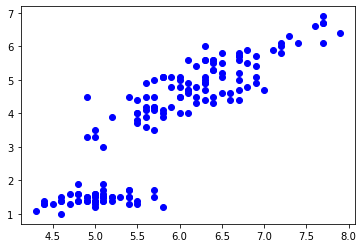

In [11]:
plt.scatter(Features[:,0],Features[:,1],color="b")

In [19]:
centroids,dis=K_means_clustrs (5,Features,15)

[[6.  4.8]
 [6.1 4.7]
 [5.9 4.2]
 [5.  1.6]
 [6.9 5.1]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 4 1 4 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 0 2 1 1
 1 1 4 4 1 2 2 2 2 0 2 1 4 1 2 2 2 1 2 2 2 2 2 2 3 2 4 0 4 4 4 4 2 4 4 4 4
 4 4 0 0 4 4 4 4 0 4 0 4 1 4 4 1 0 4 4 4 4 4 0 0 4 4 4 0 4 4 4 0 4 4 4 0 4
 0 0]
------------------
[[5.96666667 5.06666667]
 [6.3        4.58823529]
 [5.57142857 4.00714286]
 [5.00784314 1.49215686]
 [6.88461538 5.67692308]]
------------------
[[5.96666667 5.06666667]
 [6.3        4.58823529]
 [5.57142857 4.00714286]
 [5.00784314 1.49215686]
 [6.88461538 5.67692308]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 0 2 1 1
 1 1 1 1 1 2 2 2 2 0 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 4 0 4 4 4 4 2 4 4 4 0
 0 4 0 0 0 4 4 4 0 4 0 4 1 4 4 1 0 4 4 4 4 4 0 0 4 4 4 0 4 4 4 0 4 4 4 0 0
 0 0]
----

[1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 3 3 1 1 0 0 1 1 0 0 0 1 1 0
 1 1 1 1 1 1 1 3 1 1 1 0 1 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 4 2 4 4 4 4 2 4 4 4 2
 2 4 2 2 2 4 4 4 2 4 2 4 2 4 4 2 2 4 4 4 4 4 2 4 4 4 4 2 4 4 4 2 4 4 4 2 2
 2 2]
------------------
[[5.43571429 1.47857143]
 [4.82424242 1.42121212]
 [6.00757576 4.53030303]
 [5.         2.51666667]
 [6.92580645 5.87096774]]
------------------
[[5.43571429 1.47857143]
 [4.82424242 1.42121212]
 [6.00757576 4.53030303]
 [5.         2.51666667]
 [6.92580645 5.87096774]]
------------------
[1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 0 1 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 4 2 4 4 4 4 2 4 4 4 2
 4 4 2 2 4 4 4 4 2 4 2 4 2 4 4 2 2 4 4 4 4 4 2 4 4 4 4 2 4 4 4 2 4 4 4 2 4
 4 2]
------------------
[[5.41333333 1.50666667]
 [4.83142857 1.44285714]
 [6.      

[3 0 0 0 0 3 0 0 0 0 3 0 0 0 3 3 3 3 3 3 3 3 0 3 0 0 0 3 3 0 0 3 3 3 0 0 3
 0 0 3 0 0 0 0 3 0 3 0 3 0 1 2 1 2 2 4 4 2 2 2 2 2 2 4 2 2 4 2 2 2 4 2 4 4
 2 2 1 1 2 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 1 4 1 1 1 1 4 1 1 1 1
 1 1 4 4 1 1 1 1 4 1 4 1 4 1 1 4 4 1 1 1 1 1 4 1 1 1 1 4 1 1 1 4 1 1 1 4 1
 4 4]
------------------
[[4.76428571 1.425     ]
 [6.86923077 5.7       ]
 [5.85833333 4.11666667]
 [5.30434783 1.57391304]
 [5.92916667 4.87916667]]
------------------
[[4.76428571 1.425     ]
 [6.86923077 5.7       ]
 [5.85833333 4.11666667]
 [5.30434783 1.57391304]
 [5.92916667 4.87916667]]
------------------
[3 0 0 0 0 3 0 0 0 0 3 0 0 0 3 3 3 3 3 3 3 3 0 3 0 0 0 3 3 0 0 3 3 3 0 0 3
 0 0 3 0 0 0 0 3 0 3 0 3 0 1 4 1 2 4 2 4 2 4 2 2 2 2 4 2 2 2 2 4 2 4 2 4 4
 2 2 4 1 4 2 2 2 2 4 2 4 4 2 2 2 2 4 2 2 2 2 2 2 2 2 1 4 1 1 1 1 2 1 1 1 4
 1 1 4 4 1 1 1 1 4 1 4 1 4 1 1 4 4 1 1 1 1 1 4 4 1 1 1 4 1 1 1 4 1 1 1 4 1
 4 4]
------------------
[[4.76428571 1.425     ]
 [6.90277778 5.74444444]
 [5.669696

[2 2 1 1 2 4 1 2 1 2 4 2 2 1 4 4 4 2 4 2 4 2 1 2 2 2 2 4 4 2 2 4 4 4 2 2 4
 2 1 2 2 1 1 2 2 2 2 1 4 2 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 0 3 3 3 0 0 0 0 0 3 0 0 3 3 0 0 0 3 0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]
------------------
[[5.60909091 4.04242424]
 [4.51       1.3       ]
 [4.96538462 1.51538462]
 [6.58358209 5.33134328]
 [5.43571429 1.47857143]]
------------------
[[5.60909091 4.04242424]
 [4.51       1.3       ]
 [4.96538462 1.51538462]
 [6.58358209 5.33134328]
 [5.43571429 1.47857143]]
------------------
[2 2 1 1 2 4 1 2 1 2 4 2 2 1 4 4 4 2 4 2 4 2 1 2 2 2 2 2 4 2 2 4 2 4 2 2 4
 2 1 2 2 1 1 2 2 2 2 1 4 2 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 0 0 0 0 3 3
 0 3 3 3 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]
------------------
[[5.66486486 4.1       ]
 [4.51       1.3       ]
 [4.982142

C:\Users\Hadeer\AppData\Local\Temp/ipykernel_14596/2733579490.py:4: RuntimeWarning: Mean of empty slice.
  new_cetroids.append(Features[clusters==i].mean(axis=0))



------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[6.1 4.7]
 [4.9 1.5]
 [5.9 4.2]
 [6.4 5.6]
 [5.  1.5]]
------------------
[4 1 1 1 4 4 1 4 1 1 4 1 1 1 4 4 4 4 4 4 4 4 1 4 1 4 4 4 4 1 1 4 4 4 1 4 4
 1 1 4 4 1 1 4 4 1 4 1 4 4 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2

 0 4]
------------------
[[6.58857143 5.38285714]
 [7.54       6.39      ]
 [4.7        1.4       ]
 [5.24137931 1.56206897]
 [5.83518519 4.35740741]]
------------------
[[6.58857143 5.38285714]
 [7.54       6.39      ]
 [4.7        1.4       ]
 [5.24137931 1.56206897]
 [5.83518519 4.35740741]]
------------------
[3 2 2 2 3 3 2 3 2 2 3 2 2 2 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 2 2 3 3 3 2 2 3
 2 2 3 2 2 2 3 3 2 3 2 3 3 0 4 0 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4
 4 4 0 0 4 4 4 4 4 0 4 4 0 4 4 4 4 4 4 4 4 4 4 4 3 4 0 4 1 0 0 1 4 1 0 1 0
 0 0 4 4 0 0 1 1 4 0 4 1 0 0 1 4 4 0 1 1 1 0 0 0 1 0 0 4 0 0 0 4 0 0 0 0 0
 0 0]
------------------
[[6.52222222 5.31944444]
 [7.475      6.3       ]
 [4.7        1.4       ]
 [5.24137931 1.56206897]
 [5.81568627 4.32352941]]
------------------
[[6.52222222 5.31944444]
 [7.475      6.3       ]
 [4.7        1.4       ]
 [5.24137931 1.56206897]
 [5.81568627 4.32352941]]
------------------
[3 2 2 2 3 3 2 3 2 2 3 2 2 2 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 2 2 3 3 3 2

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 3 2 0 2 3 2 3 3 0 0 2 3 2 0 0 2 3 0 0 2 2
 2 2 2 2 0 3 3 3 3 0 0 0 2 2 3 3 0 2 3 3 0 0 0 2 3 0 1 0 1 1 1 1 0 1 1 1 2
 2 1 0 0 2 1 1 1 0 1 0 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 0 1 1 2 0 1 1 2 2 2
 2 0]
------------------
[[5.764      4.576     ]
 [6.93448276 5.92068966]
 [6.44193548 4.80645161]
 [5.42       3.7       ]
 [5.006      1.462     ]]
------------------
[[5.764      4.576     ]
 [6.93448276 5.92068966]
 [6.44193548 4.80645161]
 [5.42       3.7       ]
 [5.006      1.462     ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 3 2 0 2 3 2 3 3 0 0 2 3 2 0 0 2 3 0 0 2 2
 2 2 2 2 0 3 3 3 3 2 0 0 2 2 3 3 0 0 3 3 0 0 0 0 3 0 1 0 1 1 1 1 0 1 1 1 2
 2 1 0 0 2 1 1 1 2 1 0 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 0 1 1 2 0 1 1 2 2 2
 2 0]
------------------
[[5.776      4.528     ]
 [6.96428571 5.93214286]
 [6.421875

 4 4]
------------------
[[7.26470588 6.14117647]
 [6.55714286 5.1       ]
 [5.00784314 1.49215686]
 [5.72222222 4.10833333]
 [6.         5.13888889]]
------------------
[[7.26470588 6.14117647]
 [6.55714286 5.1       ]
 [5.00784314 1.49215686]
 [5.72222222 4.10833333]
 [6.         5.13888889]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 3 1 3 1 3 1 3 3 3 3 4 3 1 3 3 3 3 4 3 1 4
 3 1 1 1 3 3 3 3 3 4 3 3 1 3 3 3 3 4 3 3 3 3 3 3 3 3 4 4 0 4 1 0 3 0 0 0 1
 1 1 4 4 1 1 0 0 4 0 4 0 1 1 0 4 4 1 0 0 0 1 1 4 0 4 1 4 1 1 1 4 0 1 1 1 1
 4 4]
------------------
[[7.34       6.2       ]
 [6.57419355 5.10645161]
 [5.006      1.462     ]
 [5.64705882 4.04117647]
 [6.015      5.095     ]]
------------------
[[7.34       6.2       ]
 [6.57419355 5.10645161]
 [5.006      1.462     ]
 [5.64705882 4.04117647]
 [6.015      5.095     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

 3 3]
------------------
[[7.34       6.2       ]
 [6.38148148 4.66666667]
 [5.006      1.462     ]
 [6.29666667 5.35666667]
 [5.53214286 3.96071429]]
------------------
[[7.34       6.2       ]
 [6.38148148 4.66666667]
 [5.006      1.462     ]
 [6.29666667 5.35666667]
 [5.53214286 3.96071429]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 4 1 4 1 4 1 4 4 4 4 1 4 1 4 4 1 4 1 4 1 1
 1 1 1 1 1 4 4 4 4 3 4 1 1 1 4 4 4 1 4 4 4 4 4 1 4 4 3 3 0 3 3 0 4 0 3 0 3
 3 3 3 3 3 3 0 0 3 0 1 0 1 3 0 1 1 3 0 0 0 3 3 3 0 3 3 1 3 3 3 3 0 3 3 1 3
 3 3]
------------------
[[7.38571429 6.22857143]
 [6.33214286 4.67142857]
 [5.006      1.462     ]
 [6.35333333 5.39      ]
 [5.53214286 3.96071429]]
------------------
[[7.38571429 6.22857143]
 [6.33214286 4.67142857]
 [5.006      1.462     ]
 [6.35333333 5.39      ]
 [5.53214286 3.96071429]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[6.4 5.3]
 [5.  1.3]
 [5.7 4.2]
 [5.6 3.9]
 [5.6 3.6]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 3 0 2 0 4 0 3 4 2 2 2 4 0 2 2 2 3 2 2 0 2
 2 0 0 0 2 4 3 4 3 0 2 2 0 2 2 3 2 2 2 4 2 2 2 2 4 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.63333333 5.41666667]
 [5.006      1.462     ]
 [5.86296296 4.37777778]
 [5.51666667 3.91666667]
 [5.25714286 3.41428571]]
----

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[7.2 6.1]
 [6.4 5.3]
 [5.6 4.5]
 [6.7 5.8]
 [5.  3.5]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 2 1 2 1 4 1 4 4 2 2 2 4 1 2 2 2 2 2 2 1 2
 2 1 1 1 2 4 4 4 2 1 2 2 1 2 2 2 2 2 2 4 2 2 2 2 4 2 3 2 0 1 3 0 2 0 3 0 1
 1 3 2 2 1 1 0 0 1 3 2 0 1 3 0 1 1 1 0 0 0 1 1 1 0 1 1 2 3 3 1 2 3 3 1 1 1
 1 1]
------------------
[[7.475      6.3       ]
 [6.42941176 5.05      ]
 [5.81142857 4.41714286]
 [6.7        5.71      ]
 [5.04745763 1.77457627]]
----

 0 2]
------------------
[[6.58571429 5.43214286]
 [5.52307692 3.91923077]
 [6.13235294 4.73529412]
 [7.475      6.3       ]
 [5.006      1.462     ]]
------------------
[[4.4 1.3]
 [6.4 5.6]
 [5.7 5. ]
 [5.2 1.5]
 [5.8 5.1]]
------------------
[3 3 0 0 3 3 0 3 0 3 3 3 0 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 0 3 3 3 3 3 3 3
 3 0 3 3 0 0 3 3 0 3 0 3 3 1 4 1 2 4 2 4 3 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2
 2 4 1 1 2 2 2 2 2 4 2 2 1 2 2 2 2 2 2 3 2 2 2 2 3 2 1 4 1 1 1 1 2 1 1 1 1
 1 1 2 4 1 1 1 1 4 1 2 1 4 1 1 4 4 1 1 1 1 1 4 1 1 1 1 2 1 1 1 4 1 1 1 4 1
 1 4]
------------------
[[4.56923077 1.33846154]
 [6.84878049 5.66829268]
 [5.75       4.24473684]
 [5.1475     1.6325    ]
 [6.21666667 4.85      ]]
------------------
[[4.56923077 1.33846154]
 [6.84878049 5.66829268]
 [5.75       4.24473684]
 [5.1475     1.6325    ]
 [6.21666667 4.85      ]]
------------------
[3 0 0 0 3 3 0 3 0 3 3 0 0 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 0 0 3 3 3 3 0 3
 0 0 3 3 0 0 3 3 0 3 0 3 3 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 

 2 2]
------------------
[[7.38571429 6.22857143]
 [4.6        1.37333333]
 [6.35818182 5.07636364]
 [5.18       1.5       ]
 [5.58387097 4.00645161]]
------------------
[[7.38571429 6.22857143]
 [4.6        1.37333333]
 [6.35818182 5.07636364]
 [5.18       1.5       ]
 [5.58387097 4.00645161]]
------------------
[3 3 1 1 3 3 1 3 1 3 3 1 1 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 1 3 3 3 3 3 3
 3 1 3 3 1 1 3 3 1 3 1 3 3 2 2 2 4 2 4 2 4 2 4 4 4 4 2 4 2 4 4 2 4 2 4 2 2
 2 2 2 2 4 4 4 4 4 2 4 4 2 2 4 4 4 2 4 4 4 4 4 4 4 4 2 2 0 2 2 0 4 0 2 0 2
 2 2 2 2 2 2 0 0 2 0 2 0 2 2 0 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2]
------------------
[[7.38571429 6.22857143]
 [4.6        1.37333333]
 [6.35818182 5.07636364]
 [5.18       1.5       ]
 [5.58387097 4.00645161]]
------------------
[[6.9 5.4]
 [5.  1.6]
 [7.  4.7]
 [5.5 4. ]
 [6.6 4.6]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 3 4 3 4 3 4 3 3 3 3 4 3 4 3 3 4 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 4 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 4 4 0 4 4 0 3 0 4 0 4
 4 4 4 4 4 4 0 0 4 0 2 0 2 4 0 2 2 4 0 0 0 4 4 4 0 4 4 2 4 4 4 4 0 4 4 2 4
 4 4]
------------------
[[7.38571429 6.22857143]
 [5.006      1.462     ]
 [6.33214286 4.67142857]
 [5.53214286 3.96071429]
 [6.35333333 5.39      ]]
------------------
[[7.38571429 6.22857143]
 [5.006      1.462     ]
 [6.33214286 4.67142857]
 [5.53214286 3.96071429]
 [6.35333333 5.39      ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 4 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 4 4 0 4 4 0 3 0 4 0 4
 4 4 2 4 4 4 0 0 2 4 2 0 2 4 0 2 2 4 0 0 0 4 4 4 0 4 4 2 4 4 4 4 0 4 4 2 4
 4 4]
------------------
[[7.42307692 6.26923077]
 [5.006      1.462     ]
 [6.3     

 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[4.6 1.4]
 [5.7 1.7]
 [5.  1.6]
 [6.7 4.4]
 [5.8 5.1]]
------------------
[2 2 0 0 2 1 0 2 0 2 1 2 0 0 1 1 1 2 1 2 1 2 0 2 2 2 2 2 2 0 2 1 2 1 2 2 1
 2 0 2 2 0 0 2 2 0 2 0 2 2 3 3 3 4 3 4 3 2 3 4 4 3 3 4 3 3 4 3 3 

[4 4 0 0 4 1 0 4 0 4 1 4 4 0 1 1 1 4 1 4 1 4 0 4 4 4 4 4 4 4 4 1 4 1 4 4 1
 4 0 4 4 0 0 4 4 4 4 0 1 4 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2
 2 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
 3 3 2 2 3 3 3 3 2 3 2 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3
 3 2]
------------------
[[4.51       1.3       ]
 [5.5        1.48181818]
 [5.81851852 4.31851852]
 [6.7826087  5.59565217]
 [4.98965517 1.51034483]]
------------------
[[4.51       1.3       ]
 [5.5        1.48181818]
 [5.81851852 4.31851852]
 [6.7826087  5.59565217]
 [4.98965517 1.51034483]]
------------------
[4 4 0 0 4 1 0 4 0 4 1 4 4 0 1 1 1 4 1 4 1 4 0 4 4 4 4 4 4 4 4 1 4 1 4 4 1
 4 0 4 4 0 0 4 4 4 4 0 1 4 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 4 2 3 2 3 3 3 3 2 3 3 3 3
 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3
 3 2]
------------------
[[4.51       1.3       ]
 [5.5        1.48181818]
 [5.851785

[0 2 2 2 0 0 2 0 2 2 0 2 2 2 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 2 2 0 0 0 2 0 0
 2 2 0 0 2 2 0 0 2 0 2 0 0 3 3 3 4 3 3 3 4 3 4 4 3 4 3 4 3 3 4 3 4 3 3 3 3
 3 3 3 3 3 4 4 4 4 3 4 3 3 3 4 4 4 3 4 4 4 4 4 3 4 4 1 3 1 1 1 1 4 1 1 1 3
 1 1 3 3 1 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 3 1 1 1 1 3 1 1 1 3 1 1 1 3 1
 1 3]
------------------
[[5.23       1.49333333]
 [6.86285714 5.80571429]
 [4.67       1.415     ]
 [6.20487805 4.72439024]
 [5.48333333 3.90416667]]
------------------
[[5.23       1.49333333]
 [6.86285714 5.80571429]
 [4.67       1.415     ]
 [6.20487805 4.72439024]
 [5.48333333 3.90416667]]
------------------
[0 2 2 2 0 0 2 0 2 2 0 2 2 2 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 2 2 0 0 0 2 0 0
 2 2 0 0 2 2 0 0 2 0 2 0 0 3 3 3 4 3 3 3 4 3 4 4 4 4 3 4 3 4 4 3 4 3 4 3 3
 3 3 3 3 3 4 4 4 4 3 4 3 3 3 4 4 4 3 4 4 4 4 4 3 4 4 1 3 1 1 1 1 4 1 1 1 3
 3 1 3 3 3 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 3 1 1 1 1 3 1 1 1 3 1 1 1 3 3
 3 3]
------------------
[[5.23       1.49333333]
 [6.92580645 5.87096774]
 [4.67    

 1 1]
------------------
[[5.609375   4.015625  ]
 [6.3372549  5.05294118]
 [7.075      5.925     ]
 [7.72       6.66      ]
 [5.006      1.462     ]]
------------------
[[5.609375   4.015625  ]
 [6.3372549  5.05294118]
 [7.075      5.925     ]
 [7.72       6.66      ]
 [5.006      1.462     ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 2 1 2 1 2 3 0 2 2 2 1
 1 2 1 1 1 1 3 3 1 2 1 3 1 2 2 1 1 1 2 2 3 1 1 1 3 1 1 1 2 2 1 1 2 2 1 1 1
 1 1]
------------------
[[5.58387097 4.00645161]
 [6.30638298 4.97234043]
 [6.9        5.83125   ]
 [7.71666667 6.56666667]
 [5.006      1.462     ]]
------------------
[[5.58387097 4.00645161]
 [6.30638298 4.97234043]
 [6.9        5.83125   ]
 [7.71666667 6.56666667]
 [5.006      1.462     ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

 3 3]
------------------
[[5.26538462 1.51923077]
 [4.725      1.4       ]
 [6.98518519 5.94814815]
 [6.28222222 4.86888889]
 [5.53214286 3.96071429]]
------------------
[[5.26538462 1.51923077]
 [4.725      1.4       ]
 [6.98518519 5.94814815]
 [6.28222222 4.86888889]
 [5.53214286 3.96071429]]
------------------
[0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0
 1 1 0 1 1 1 0 0 1 0 1 0 1 3 3 3 4 3 4 3 4 3 4 4 4 4 3 4 3 4 4 3 4 3 4 3 3
 3 3 3 3 3 4 4 4 4 3 4 3 3 3 4 4 4 3 4 4 4 4 4 3 4 4 2 3 2 3 2 2 4 2 2 2 3
 3 2 3 3 3 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 3 3 3 2 2 3 3 2 2 3 3 3
 3 3]
------------------
[[5.26538462 1.51923077]
 [4.725      1.4       ]
 [7.04       5.976     ]
 [6.28297872 4.9       ]
 [5.53214286 3.96071429]]
------------------
[[5.26538462 1.51923077]
 [4.725      1.4       ]
 [7.04       5.976     ]
 [6.28297872 4.9       ]
 [5.53214286 3.96071429]]
------------------
[0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1

 2 2]
------------------
[[5.73913043 4.21304348]
 [5.27777778 3.51111111]
 [6.30434783 4.98695652]
 [5.006      1.462     ]
 [7.12272727 6.03181818]]
------------------
[[5.73913043 4.21304348]
 [5.27777778 3.51111111]
 [6.30434783 4.98695652]
 [5.006      1.462     ]
 [7.12272727 6.03181818]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 0 2 0 2 1 2 1 1 0 0 2 1 2 0 0 2 0 2 0 2 2
 0 2 2 2 0 1 1 1 0 2 0 0 2 2 0 0 0 2 0 1 0 0 0 0 1 0 4 2 4 2 4 4 0 4 4 4 2
 2 4 2 2 2 2 4 4 2 4 0 4 2 4 4 2 2 2 4 4 4 2 2 2 4 2 2 2 4 4 2 2 4 4 2 2 2
 2 2]
------------------
[[5.73333333 4.24166667]
 [5.27777778 3.51111111]
 [6.32       4.98888889]
 [5.006      1.462     ]
 [7.12272727 6.03181818]]
------------------
[[5.2 1.5]
 [4.9 1.5]
 [7.7 6.7]
 [6.  4.5]
 [7.9 6.4]]
------------------
[0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0
 1 1 0 1 1 1 1 0 1 0 1 0 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

[2 2 0 0 2 1 0 2 0 2 1 2 2 0 1 1 1 2 1 2 1 2 0 2 2 2 2 2 2 0 2 1 2 1 2 2 1
 2 0 2 2 0 0 2 2 2 2 0 2 2 4 4 4 3 4 3 4 3 4 3 3 3 3 4 3 4 3 3 4 3 4 3 4 4
 3 4 4 4 3 3 3 3 3 4 3 3 4 3 3 3 3 4 3 3 3 3 3 3 3 3 4 4 4 4 4 4 3 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4]
------------------
[[4.52727273 1.32727273]
 [5.52       1.48      ]
 [5.01034483 1.50689655]
 [5.63030303 4.02727273]
 [6.57313433 5.33880597]]
------------------
[[4.52727273 1.32727273]
 [5.52       1.48      ]
 [5.01034483 1.50689655]
 [5.63030303 4.02727273]
 [6.57313433 5.33880597]]
------------------
[2 2 0 0 2 1 0 2 0 2 1 2 2 0 1 1 1 2 1 2 1 2 0 2 2 2 2 2 2 0 2 1 2 1 2 2 1
 2 0 2 2 0 0 2 2 2 2 0 1 2 4 4 4 3 4 3 4 3 4 3 3 3 3 4 3 4 3 3 3 3 3 3 4 4
 3 4 4 4 3 3 3 3 3 4 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 3 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4]
------------------
[[4.52727273 1.32727273]
 [5.5        1.48181818]
 [5.      

[3 0 0 0 0 3 0 3 0 0 3 0 0 0 3 3 3 3 3 3 3 3 0 3 0 3 3 3 3 0 0 3 3 3 0 0 3
 0 0 3 0 0 0 3 3 0 3 0 3 0 1 1 1 4 1 4 1 4 1 4 4 4 4 1 4 1 4 4 1 4 1 4 1 1
 4 1 1 1 4 4 4 4 4 1 4 4 1 4 4 4 4 1 4 4 4 4 4 4 4 4 1 1 2 1 1 2 4 2 1 2 1
 1 1 1 1 1 1 2 2 1 1 1 2 1 1 2 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1]
------------------
[[4.725      1.4       ]
 [6.36851852 5.11481481]
 [7.42307692 6.26923077]
 [5.26538462 1.51923077]
 [5.63030303 4.02727273]]
------------------
[[4.725      1.4       ]
 [6.36851852 5.11481481]
 [7.42307692 6.26923077]
 [5.26538462 1.51923077]
 [5.63030303 4.02727273]]
------------------
[3 0 0 0 0 3 0 3 0 0 3 0 0 0 3 3 3 3 3 3 3 3 0 3 0 3 3 3 3 0 0 3 3 3 0 0 3
 0 0 3 0 0 0 3 3 0 3 0 3 0 1 1 1 4 1 4 1 4 1 4 4 4 4 1 4 1 4 4 1 4 1 4 1 1
 1 1 1 1 4 4 4 4 4 1 4 4 1 1 4 4 4 1 4 4 4 4 4 4 4 4 1 1 2 1 1 2 4 2 1 2 1
 1 1 1 1 1 1 2 2 1 2 1 2 1 1 2 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1]
------------------
[[4.725      1.4       ]
 [6.35818182 5.07636364]
 [7.385714

 2 2]
------------------
[[4.98333333 2.81666667]
 [6.94545455 5.78787879]
 [5.98412698 4.54761905]
 [4.77857143 1.43214286]
 [5.33       1.46      ]]
------------------
[[4.98333333 2.81666667]
 [6.94545455 5.78787879]
 [5.98412698 4.54761905]
 [4.77857143 1.43214286]
 [5.33       1.46      ]]
------------------
[4 3 3 3 3 4 3 3 3 3 4 3 3 3 4 4 4 4 4 4 4 4 3 4 3 3 3 4 4 3 3 4 4 4 3 3 4
 3 3 4 3 3 3 3 4 3 4 3 4 3 2 2 1 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 2
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[5.21666667 3.36666667]
 [6.85945946 5.75945946]
 [5.98421053 4.51403509]
 [4.76428571 1.425     ]
 [5.31363636 1.50909091]]
------------------
[[5.21666667 3.36666667]
 [6.85945946 5.75945946]
 [5.98421053 4.51403509]
 [4.76428571 1.425     ]
 [5.31363636 1.50909091]]
------------------
[4 3 3 3 3 4 3 3 3 3 4 3 3 3 4 4 4 4 4 4 4 4 3 4 3 3 3 4 4 3 3 4 4 4 3

 4 4]
------------------
[[5.74473684 4.13684211]
 [7.475      6.3       ]
 [5.00784314 1.49215686]
 [6.55294118 5.65294118]
 [6.303125   4.959375  ]]
------------------
[[5.74473684 4.13684211]
 [7.475      6.3       ]
 [5.00784314 1.49215686]
 [6.55294118 5.65294118]
 [6.303125   4.959375  ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 0 4 0 4 0 4 0 0 0 0 4 0 4 0 0 4 0 4 0 4 4
 4 4 4 4 0 0 0 0 0 4 0 0 4 4 0 0 0 4 0 0 0 0 0 0 0 0 3 4 1 3 3 1 0 1 3 1 4
 4 3 4 4 4 3 1 1 4 3 4 1 4 3 1 4 4 3 1 1 1 3 4 3 1 3 3 4 3 3 4 4 3 3 4 4 4
 3 4]
------------------
[[5.58387097 4.00645161]
 [7.475      6.3       ]
 [5.006      1.462     ]
 [6.53333333 5.63888889]
 [6.3025641  4.85384615]]
------------------
[[5.58387097 4.00645161]
 [7.475      6.3       ]
 [5.006      1.462     ]
 [6.53333333 5.63888889]
 [6.3025641  4.85384615]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

[1 4 4 4 1 1 4 1 4 4 1 4 4 4 1 1 1 1 1 1 1 1 4 1 4 1 1 1 1 4 4 1 1 1 4 4 1
 4 4 1 1 4 4 1 1 4 1 4 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 3 2 3 0 3 0
 0 0 2 2 0 0 3 3 2 0 2 3 2 0 3 2 2 0 0 3 3 0 0 0 3 0 0 2 0 0 0 2 0 0 0 0 0
 0 2]
------------------
[[6.60606061 5.41212121]
 [5.23333333 1.55333333]
 [5.85178571 4.37678571]
 [7.54       6.39      ]
 [4.68571429 1.4047619 ]]
------------------
[[6.60606061 5.41212121]
 [5.23333333 1.55333333]
 [5.85178571 4.37678571]
 [7.54       6.39      ]
 [4.68571429 1.4047619 ]]
------------------
[1 4 4 4 1 1 4 1 4 4 1 4 4 4 1 1 1 1 1 1 1 1 4 1 4 1 1 1 1 4 4 1 1 1 4 4 1
 4 4 1 4 4 4 1 1 4 1 4 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 3 0 0 3 2 3 0 3 0
 0 0 2 2 0 0 3 3 2 0 2 3 0 0 3 2 2 0 3 3 3 0 0 0 3 0 0 2 0 0 0 2 0 0 0 0 0
 0 2]
------------------
[[6.53823529 5.34705882]
 [5.24137931 1.56206897]
 [5.832075

 1 1]
------------------
[[5.23       1.49333333]
 [6.27954545 4.85454545]
 [6.96428571 5.93214286]
 [4.67       1.415     ]
 [5.53214286 3.96071429]]
------------------
[[5.23       1.49333333]
 [6.27954545 4.85454545]
 [6.96428571 5.93214286]
 [4.67       1.415     ]
 [5.53214286 3.96071429]]
------------------
[0 3 3 3 0 0 3 0 3 3 0 3 3 3 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 3 3 0 0 0 3 0 0
 3 3 0 0 3 3 0 0 3 0 3 0 0 1 1 1 4 1 4 1 4 1 4 4 4 4 1 4 1 4 4 1 4 1 4 1 1
 1 1 1 1 1 4 4 4 4 1 4 1 1 1 4 4 4 1 4 4 4 4 4 1 4 4 2 1 2 2 2 2 4 2 2 2 1
 1 2 1 1 1 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 1 1 2 2 1 1 2 2 1 1 1
 1 1]
------------------
[[5.23       1.49333333]
 [6.28222222 4.86888889]
 [6.98518519 5.94814815]
 [4.67       1.415     ]
 [5.53214286 3.96071429]]
------------------
[[5.  1.3]
 [6.9 5.7]
 [7.9 6.4]
 [5.4 1.7]
 [5.5 3.7]]
------------------
[0 0 0 0 0 3 0 0 0 0 3 0 0 0 3 3 3 0 3 0 3 0 0 3 0 0 0 0 0 0 0 3 0 3 0 0 3
 0 0 0 0 0 0 0 3 0 0 0 3 0 1 4 1 4 1 4 1 4 1 4 4 4 4 4 4 1 4 4 4 

 3 3]
------------------
[[7.475      6.3       ]
 [5.66486486 4.1       ]
 [4.7        1.4       ]
 [6.40980392 5.1627451 ]
 [5.24642857 1.51071429]]
------------------
[[7.475      6.3       ]
 [5.66486486 4.1       ]
 [4.7        1.4       ]
 [6.40980392 5.1627451 ]
 [5.24642857 1.51071429]]
------------------
[4 2 2 2 4 4 2 4 2 2 4 2 2 2 4 4 4 4 4 4 4 4 2 4 2 4 4 4 4 2 2 4 4 4 2 2 4
 2 2 4 2 2 2 4 4 2 4 2 4 4 3 3 3 1 3 1 3 1 3 1 1 1 1 3 1 3 1 1 1 1 3 1 3 3
 1 3 3 3 1 1 1 1 1 3 1 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 3 3 0 3 3 0 1 0 3 0 3
 3 3 3 3 3 3 0 0 3 3 1 0 3 3 0 3 3 3 0 0 0 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3
 3 3]
------------------
[[7.42307692 6.26923077]
 [5.64571429 4.06571429]
 [4.7        1.4       ]
 [6.38653846 5.13076923]
 [5.24642857 1.51071429]]
------------------
[[7.42307692 6.26923077]
 [5.64571429 4.06571429]
 [4.7        1.4       ]
 [6.38653846 5.13076923]
 [5.24642857 1.51071429]]
------------------
[4 2 2 2 4 4 2 4 2 2 4 2 2 2 4 4 4 4 4 4 4 4 2 4 2 4 4 4 4 2 2 4 4 4 2

 3 4]
------------------
[[4.475      1.275     ]
 [4.924      1.48      ]
 [5.36111111 1.60555556]
 [6.82325581 5.63953488]
 [5.85178571 4.37678571]]
------------------
[[4.475      1.275     ]
 [4.924      1.48      ]
 [5.36111111 1.60555556]
 [6.82325581 5.63953488]
 [5.85178571 4.37678571]]
------------------
[1 1 0 0 1 2 0 1 0 1 2 1 1 0 2 2 2 1 2 1 2 1 0 2 1 1 1 2 2 1 1 2 2 2 1 1 2
 1 0 1 1 0 0 1 2 1 1 0 2 1 3 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 3 4 3 3 3 3 4 3 3 3 3
 3 3 4 4 3 3 3 3 4 3 4 3 4 3 3 4 4 3 3 3 3 3 3 3 3 3 3 4 3 3 3 4 3 3 3 4 3
 3 4]
------------------
[[4.51       1.3       ]
 [4.95416667 1.49166667]
 [5.37647059 1.60588235]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[[4.51       1.3       ]
 [4.95416667 1.49166667]
 [5.37647059 1.60588235]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[1 1 0 0 1 2 0 1 0 1 2 1 1 0 2 2 2 1 2 1 2 1 0 1 1 1 1 2 1 1 1 2 2 2 1

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 3 4 3 4 3 4 3 3 3 3 4 3 4 3 3 4 3 4 3 4 4
 4 4 4 1 4 3 3 3 3 1 3 4 4 4 3 3 3 4 3 3 3 3 3 4 3 3 1 1 0 1 1 0 3 0 1 0 1
 1 1 1 1 1 1 0 0 1 1 4 0 4 1 0 4 4 1 0 0 0 1 1 1 0 1 1 4 1 1 1 1 0 1 1 1 1
 1 1]
------------------
[[7.42307692 6.26923077]
 [6.37878788 5.37575758]
 [5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.31923077 4.64615385]]
------------------
[[7.42307692 6.26923077]
 [6.37878788 5.37575758]
 [5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.31923077 4.64615385]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 3 4 3 4 3 4 3 3 3 3 4 3 4 3 3 4 3 4 3 4 4
 4 4 4 1 4 3 3 3 3 1 3 4 4 4 3 3 3 4 3 3 3 3 3 4 3 3 1 1 0 1 1 0 3 0 1 0 1
 1 1 4 1 1 1 0 0 4 1 4 0 4 1 0 4 4 1 0 0 0 1 1 1 0 1 1 4 1 1 1 1 1 1 1 4 1
 1 1]
------------------
[[7.475      6.3       ]
 [6.42903226 5.42903226]
 [5.006   

 2 2]
------------------
[[5.53214286 3.96071429]
 [5.006      1.462     ]
 [6.40689655 5.42758621]
 [7.42307692 6.26923077]
 [6.3        4.69333333]]
------------------
[[6.  5. ]
 [5.8 4. ]
 [4.6 1. ]
 [5.1 1.4]
 [5.1 1.7]]
------------------
[3 3 2 2 3 4 2 3 2 3 3 4 3 2 3 3 3 3 4 3 4 3 2 4 4 4 4 3 3 4 4 3 3 3 3 3 3
 3 2 3 3 2 2 4 4 3 4 2 3 3 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.55652174 5.31449275]
 [5.60645161 3.99677419]
 [4.51       1.3       ]
 [5.15925926 1.41851852]
 [5.06923077 1.67692308]]
------------------
[[6.55652174 5.31449275]
 [5.60645161 3.99677419]
 [4.51       1.3       ]
 [5.15925926 1.41851852]
 [5.06923077 1.67692308]]
------------------
[3 3 2 2 3 4 2 3 2 4 3 4 2 2 3 3 3 3 3 3 4 3 2 4 4 4 4 3 3 2 4 3 3 3 4 3 3
 3 2 3 3 2 2 4 4 2 4 2 3 3 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 

 4 0]
------------------
[[6.14883721 4.69069767]
 [5.46190476 3.84761905]
 [4.67       1.415     ]
 [5.23       1.49333333]
 [6.86388889 5.78055556]]
------------------
[[6.14883721 4.69069767]
 [5.46190476 3.84761905]
 [4.67       1.415     ]
 [5.23       1.49333333]
 [6.86388889 5.78055556]]
------------------
[3 2 2 2 3 3 2 3 2 2 3 2 2 2 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 2 2 3 3 3 2 3 3
 2 2 3 3 2 2 3 3 2 3 2 3 3 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 4 0 4 4 4 4 1 4 4 4 0
 0 4 0 0 0 4 4 4 0 4 0 4 0 4 4 0 0 4 4 4 4 4 0 4 4 4 4 0 4 4 4 0 4 4 4 0 0
 0 0]
------------------
[[6.22272727 4.79318182]
 [5.508      3.908     ]
 [4.67       1.415     ]
 [5.23       1.49333333]
 [6.92580645 5.87096774]]
------------------
[[6.22272727 4.79318182]
 [5.508      3.908     ]
 [4.67       1.415     ]
 [5.23       1.49333333]
 [6.92580645 5.87096774]]
------------------
[3 2 2 2 3 3 2 3 2 2 3 2 2 2 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 2 2 3 3 3 2

 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 1 3 1 3 1 3 1 1 1 1 3 1 3 1 1 3 1 3 1 3 3
 3 3 3 3 3 1 1 1 1 3 1 3 3 3 1 1 1 3 1 1 1 1 1 3 1 1 4 3 2 4 4 2 1 2 4 2 3
 4 4 3 3 4 4 2 2 3 4 3 2 3 4 2 3 3 4 2 2 2 4 3 4 2 4 4 3 4 4 4 3 4 4 4 3 4
 4 3]
------------------
[[5.006      1.462     ]
 [5.53214286 3.96071429]
 [7.475      6.3       ]
 [6.24594595 4.77027027]
 [6.54347826 5.54782609]]
------------------
[[6.1 4.6]
 [5.8 5.1]
 [5.  3.3]
 [4.7 1.3]
 [7.1 5.9]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 2 0 2 2 0 0 0 2 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 2 2 2 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 4 1 4 1 4 4 1 4 4 4 0
 1 4 1 1 1 4 4 4 1 4 1 4 0 4 4 0 0 4 4 4 4 4 1 1 4 1 1 0 4 4 4 1 4 4 4 0 1
 1 1]
------------------
[[6.11333333 4.48666667]
 [6.02222222 5.19444444]
 [5.31       3.55      ]
 [5.006      1.462     ]
 [7.02222222 5.91481481]]
----

[3 3 3 3 3 4 3 3 3 3 4 3 3 3 4 4 4 3 4 3 4 3 3 4 3 3 3 4 4 3 3 4 4 4 3 3 4
 3 3 3 3 3 3 3 4 3 3 3 4 3 0 0 0 2 0 0 0 2 0 2 2 0 0 0 2 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 2 0 1 0 1 1 1 1 2 1 1 1 0
 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0
 0 0]
------------------
[[6.13148148 4.67777778]
 [6.92580645 5.87096774]
 [5.36       3.73333333]
 [4.82352941 1.43529412]
 [5.39375    1.51875   ]]
------------------
[[6.13148148 4.67777778]
 [6.92580645 5.87096774]
 [5.36       3.73333333]
 [4.82352941 1.43529412]
 [5.39375    1.51875   ]]
------------------
[3 3 3 3 3 4 3 3 3 3 4 3 3 3 4 4 4 3 4 3 4 3 3 4 3 3 3 4 4 3 3 4 4 4 3 3 4
 3 3 3 3 3 3 3 4 3 4 3 4 3 0 0 0 2 0 0 0 2 0 2 2 0 0 0 2 0 0 2 0 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 0 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 1 0 1 1 1 1 2 1 1 1 0
 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0
 0 0]
------------------
[[6.19787234 4.75319149]
 [6.92580645 5.87096774]
 [5.463636

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 0 2 4 0 0 4 3 4 0 4 0
 0 0 2 2 0 0 4 4 2 0 2 4 2 0 4 2 2 0 4 4 4 0 0 0 4 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
------------------
[[6.532      5.512     ]
 [5.006      1.462     ]
 [6.23714286 4.75142857]
 [5.53214286 3.96071429]
 [7.475      6.3       ]]
------------------
[[6.532      5.512     ]
 [5.006      1.462     ]
 [6.23714286 4.75142857]
 [5.53214286 3.96071429]
 [7.475      6.3       ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 0 2 4 0 0 4 3 4 0 4 0
 0 0 2 2 0 0 4 4 2 0 2 4 2 0 4 2 2 0 4 4 4 0 2 0 4 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
------------------
[[6.54166667 5.52916667]
 [5.006      1.462     ]
 [6.238888

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 0 3 0 2 0 3 0 2 0 2 2 3 3 3 2 0 3 3 3 2 3 3 0 3
 3 0 0 0 3 2 2 2 2 0 3 3 0 3 3 2 3 3 3 2 3 3 3 3 2 3 1 0 1 0 1 1 2 1 1 1 0
 0 1 3 0 0 0 1 1 0 1 3 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 3 0 1 0 0 1 1 0 0 0
 0 0]
------------------
[[6.39189189 5.07837838]
 [7.13333333 6.06190476]
 [5.34285714 3.70714286]
 [5.89642857 4.41071429]
 [5.006      1.462     ]]
------------------
[[6.39189189 5.07837838]
 [7.13333333 6.06190476]
 [5.34285714 3.70714286]
 [5.89642857 4.41071429]
 [5.006      1.462     ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 0 3 0 2 0 3 0 2 0 2 2 3 3 3 2 0 3 3 3 2 3 3 0 3
 3 3 0 0 3 2 2 2 2 0 3 3 0 3 3 2 3 3 3 2 3 3 3 3 2 3 1 0 1 0 1 1 2 1 1 1 0
 0 0 3 0 0 0 1 1 0 1 3 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 3 0 0 0 0 1 1 0 0 0
 0 0]
------------------
[[6.40526316 5.12105263]
 [7.17368421 6.11578947]
 [5.342857

 0 3]
------------------
[[6.58571429 5.43214286]
 [5.52307692 3.91923077]
 [5.006      1.462     ]
 [6.13235294 4.73529412]
 [7.475      6.3       ]]
------------------
[[5.7 4.1]
 [6.4 5.3]
 [5.7 4.2]
 [6.  4. ]
 [5.  1.6]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 1 3 1 0 1 2 1 0 1 0 0 2 3 2 0 3 2 0 3 0 2 3 1 2
 3 3 1 1 2 3 0 0 0 1 2 2 1 3 0 0 2 2 0 0 2 2 2 3 0 0 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.44375    3.7625    ]
 [6.63275862 5.45172414]
 [5.7375     4.49375   ]
 [6.26       4.23      ]
 [5.006      1.462     ]]
------------------
[[5.44375    3.7625    ]
 [6.63275862 5.45172414]
 [5.7375     4.49375   ]
 [6.26       4.23      ]
 [5.006      1.462     ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 1 3 1 0 3 2 3 0 3 0 0 2 3 2 0 3 2 2 3 

 3 3]
------------------
[[5.51428571 3.99285714]
 [4.8        1.47666667]
 [5.315      1.44      ]
 [6.59818182 5.49636364]
 [6.40588235 4.5       ]]
------------------
[[5.51428571 3.99285714]
 [4.8        1.47666667]
 [5.315      1.44      ]
 [6.59818182 5.49636364]
 [6.40588235 4.5       ]]
------------------
[2 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 1 1 2 2 2 1 1 2
 1 1 2 1 1 1 1 2 1 2 1 2 1 4 4 4 0 4 0 4 0 4 0 0 0 0 4 0 4 0 0 4 0 4 0 4 4
 4 4 4 3 4 0 0 0 0 3 0 4 4 4 0 0 0 4 0 0 0 0 0 4 0 0 3 4 3 3 3 3 0 3 3 3 3
 3 3 4 4 3 3 3 3 4 3 4 3 4 3 3 4 4 3 3 3 3 3 3 3 3 3 3 4 3 3 3 4 3 3 3 4 3
 3 4]
------------------
[[5.53214286 3.96071429]
 [4.76428571 1.425     ]
 [5.31363636 1.50909091]
 [6.81282051 5.73076923]
 [6.23030303 4.73333333]]
------------------
[[5.53214286 3.96071429]
 [4.76428571 1.425     ]
 [5.31363636 1.50909091]
 [6.81282051 5.73076923]
 [6.23030303 4.73333333]]
------------------
[2 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 1 1 2 2 2 1

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 4 3 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4
 4 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 2 4 3 3 1 3 3 0 4 1 3 1 3
 3 3 4 3 3 3 0 0 3 1 4 0 3 3 1 4 3 3 1 1 0 3 3 3 1 3 3 4 3 3 3 3 1 3 3 3 3
 3 3]
------------------
[[7.72       6.66      ]
 [7.2        5.98888889]
 [5.00784314 1.49215686]
 [6.42564103 5.25897436]
 [5.80652174 4.24565217]]
------------------
[[7.72       6.66      ]
 [7.2        5.98888889]
 [5.00784314 1.49215686]
 [6.42564103 5.25897436]
 [5.80652174 4.24565217]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 4 3 4 3 4 3 4 3 4 4 4 4 4 4 3 4 4 4 4 4 4 3 4
 4 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 1 3 3 0 4 1 1 1 3
 3 3 4 3 3 3 0 0 3 1 4 0 3 3 1 3 3 3 1 1 0 3 3 3 1 3 3 4 3 3 3 3 1 3 3 3 3
 3 3]
------------------
[[7.72       6.66      ]
 [7.15       5.97      ]
 [5.006   

 1 0]
------------------
[[6.109375   4.725     ]
 [6.58       5.39666667]
 [7.475      6.3       ]
 [5.006      1.462     ]
 [5.52307692 3.91923077]]
------------------
[[6.109375   4.725     ]
 [6.58       5.39666667]
 [7.475      6.3       ]
 [5.006      1.462     ]
 [5.52307692 3.91923077]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 0 1 4 0 0 0 4 0 4 4 4 4 0 4 0 0 4 0 4 0 4 0 0
 0 0 1 1 0 4 4 4 4 0 4 0 0 0 4 4 4 0 4 4 4 4 4 0 4 4 1 0 2 1 1 2 4 2 1 2 1
 1 1 0 0 1 1 2 2 0 1 0 2 0 1 2 0 0 1 2 2 2 1 1 1 2 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
------------------
[[6.12727273 4.72424242]
 [6.57586207 5.42068966]
 [7.475      6.3       ]
 [5.006      1.462     ]
 [5.52307692 3.91923077]]
------------------
[[6.1 5.6]
 [6.3 5. ]
 [5.2 1.4]
 [6.9 5.7]
 [7.2 6. ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 2 1 1 1 1 3 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 3 3 0 3 3 0 1 0 3 0 3
 3 3 3 3 3 3 0 0 3 0 2 0 2 3 0 2 2 3 0 0 0 3 3 3 0 3 3 2 3 3 3 3 0 3 3 2 3
 3 3]
------------------
[[7.38571429 6.22857143]
 [5.53214286 3.96071429]
 [6.33214286 4.67142857]
 [6.35333333 5.39      ]
 [5.006      1.462     ]]
------------------
[[7.38571429 6.22857143]
 [5.53214286 3.96071429]
 [6.33214286 4.67142857]
 [6.35333333 5.39      ]
 [5.006      1.462     ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 2 1 1 1 1 3 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 3 3 0 3 3 0 1 0 3 0 3
 3 3 2 3 3 3 0 0 2 3 2 0 2 3 0 2 2 3 0 0 0 3 3 3 0 3 3 2 3 3 3 3 0 3 3 2 3
 3 3]
------------------
[[7.42307692 6.26923077]
 [5.53214286 3.96071429]
 [6.3     

[0 2 2 2 0 4 2 0 2 2 0 2 2 2 0 0 0 0 4 0 4 0 2 0 2 0 0 0 0 2 2 0 0 0 2 0 0
 2 2 0 0 2 2 0 4 2 0 2 0 0 1 3 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3
 3 3 1 1 3 3 3 3 3 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 4 3 1 3 1 1 1 1 3 1 1 1 1
 1 1 3 3 1 1 1 1 1 1 3 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1
 1 1]
------------------
[[5.20384615 1.45384615]
 [6.74489796 5.55306122]
 [4.67       1.415     ]
 [5.812      4.31      ]
 [5.34       2.        ]]
------------------
[[5.20384615 1.45384615]
 [6.74489796 5.55306122]
 [4.67       1.415     ]
 [5.812      4.31      ]
 [5.34       2.        ]]
------------------
[0 2 2 2 0 4 2 0 2 2 0 2 2 2 0 0 0 0 4 0 4 0 2 0 2 0 0 0 0 2 2 0 0 0 2 0 0
 2 2 0 0 2 2 0 4 2 0 2 0 0 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 1 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 4 3 1 3 1 1 1 1 3 1 1 1 1
 1 1 3 3 1 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1
 1 3]
------------------
[[5.20384615 1.45384615]
 [6.82325581 5.63953488]
 [4.67    

[1 1 1 3 1 1 2 1 3 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 2 1 1 1 1 2 1 1 0 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 0 0 4 4 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 0 0 0 0 4 0 0 0 0
 0 0 4 4 0 0 0 0 4 0 4 0 4 0 0 4 4 0 0 0 0 0 0 0 0 0 0 4 0 0 0 4 0 0 0 0 0
 0 4]
------------------
[[6.82325581 5.63953488]
 [5.1195122  1.49756098]
 [4.48571429 1.25714286]
 [4.5        1.45      ]
 [5.83859649 4.35263158]]
------------------
[[6.82325581 5.63953488]
 [5.1195122  1.49756098]
 [4.48571429 1.25714286]
 [4.5        1.45      ]
 [5.83859649 4.35263158]]
------------------
[1 1 2 3 1 1 3 1 3 1 1 3 3 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 3 3 1 1 1 1 1 1
 1 2 1 1 2 2 1 1 3 1 3 1 1 0 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 0 4 0 0 0 0 4 0 0 0 0
 0 0 4 4 0 0 0 0 4 0 4 0 4 0 0 4 4 0 0 0 0 0 0 0 0 0 0 4 0 0 0 4 0 0 0 4 0
 0 4]
------------------
[[6.83902439 5.67804878]
 [5.17777778 1.54166667]
 [4.483333

 1 1]
------------------
[[5.23       1.49333333]
 [6.38301887 5.11886792]
 [4.67       1.415     ]
 [5.62941176 4.05294118]
 [7.42307692 6.26923077]]
------------------
[[5.23       1.49333333]
 [6.38301887 5.11886792]
 [4.67       1.415     ]
 [5.62941176 4.05294118]
 [7.42307692 6.26923077]]
------------------
[0 2 2 2 0 0 2 0 2 2 0 2 2 2 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 2 2 0 0 0 2 0 0
 2 2 0 0 2 2 0 0 2 0 2 0 0 1 1 1 3 1 3 1 3 1 3 3 3 3 1 3 1 3 3 1 3 1 3 1 1
 3 1 1 1 3 3 3 3 3 1 3 3 1 1 3 3 3 1 3 3 3 3 3 3 3 3 1 1 4 1 1 4 3 4 1 4 1
 1 1 1 1 1 1 4 4 1 4 1 4 1 1 4 1 1 1 4 4 4 1 1 1 4 1 1 1 1 1 1 1 4 1 1 1 1
 1 1]
------------------
[[5.23       1.49333333]
 [6.35740741 5.09074074]
 [4.67       1.415     ]
 [5.609375   4.015625  ]
 [7.38571429 6.22857143]]
------------------
[[5.23       1.49333333]
 [6.35740741 5.09074074]
 [4.67       1.415     ]
 [5.609375   4.015625  ]
 [7.38571429 6.22857143]]
------------------
[0 2 2 2 0 0 2 0 2 2 0 2 2 2 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 2 2 0 0 0 2

 2 2]
------------------
[[6.96428571 5.93214286]
 [5.53214286 3.96071429]
 [6.27954545 4.85454545]
 [5.43571429 1.47857143]
 [4.83888889 1.45555556]]
------------------
[[6.96428571 5.93214286]
 [5.53214286 3.96071429]
 [6.27954545 4.85454545]
 [5.43571429 1.47857143]
 [4.83888889 1.45555556]]
------------------
[4 4 4 4 4 3 4 4 4 4 3 4 4 4 3 3 3 4 3 4 3 4 4 4 4 4 4 3 3 4 4 3 3 3 4 4 3
 4 4 4 4 4 4 4 4 4 4 4 3 4 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 2 1 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 0 2 0 0 0 0 1 0 0 0 2
 2 0 2 2 2 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 2 2 0 0 2 2 0 0 2 2 2
 2 2]
------------------
[[6.98518519 5.94814815]
 [5.53214286 3.96071429]
 [6.28222222 4.86888889]
 [5.43571429 1.47857143]
 [4.83888889 1.45555556]]
------------------


In [20]:
centroids,dis

(array([[6.98518519, 5.94814815],
        [5.53214286, 3.96071429],
        [6.28222222, 4.86888889],
        [5.43571429, 1.47857143],
        [4.83888889, 1.45555556]]),
 [0.20987813051146387])

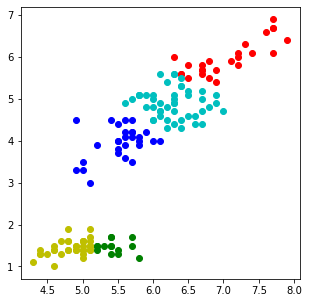

In [23]:
clusters=Clustring (Features,centroids)
plt.figure(figsize=(5,5))
plt.scatter(Features[clusters==0][:,0],Features[clusters==0][:,1],color="r")
plt.scatter(Features[clusters==1][:,0],Features[clusters==1][:,1],color="b")
plt.scatter(Features[clusters==2][:,0],Features[clusters==2][:,1],color="c")
plt.scatter(Features[clusters==3][:,0],Features[clusters==3][:,1],color="g")
plt.scatter(Features[clusters==4][:,0],Features[clusters==4][:,1],color="y")

In [15]:
def K_means_optimum (k,Features,iterations):
    Distorsion=[]
    for i in range(1,k,1):
        centroids,min_dist=K_means_clustrs (i,Features,iterations)
        Distorsion.append(min_dist)
    return Distorsion

In [16]:
Distorsion=K_means_optimum (8,Features,15)

[[6.3 5.1]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[6.7 5.2]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.7 1.5]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[4.9 1.5]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[6.3 4.9]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[6.1 4.9]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.  1.3]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[5.84333333 3.758     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]]
------------------
[[6.7 5. ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

 1 1]
------------------
[[5.00555556 1.5962963 ]
 [6.31458333 4.97395833]]
------------------
[[6.  4.8]
 [7.9 6.4]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0]
------------------
[[5.68455882 3.50367647]
 [7.38571429 6.22857143]]
------------------
[[5.68455882 3.50367647]
 [7.38571429 6.22857143]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
------------------
[[5.46880734 3.03577982]
 [6.83902439 5.67804878]]
------------------
[[5

 0 0]
------------------
[[6.30103093 4.95876289]
 [5.00566038 1.56037736]]
------------------
[[6.30103093 4.95876289]
 [5.00566038 1.56037736]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.59629

 0 0]
------------------
[[6.3287234  5.00425532]
 [5.02857143 1.66607143]]
------------------
[[6.3287234  5.00425532]
 [5.02857143 1.66607143]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.59629

C:\Users\Hadeer\AppData\Local\Temp/ipykernel_14596/2733579490.py:4: RuntimeWarning: Mean of empty slice.
  new_cetroids.append(Features[clusters==i].mean(axis=0))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.  4.5]
 [6.4 5.6]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 

 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.  4.8]
 [7.6 6.6]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0]
------------------
[[5.67703704 3.48666667]
 [7.34       6.2       ]]
------------------
[[5

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
------------------
[[5.50178571 3.08482143]
 [6.85       5.74210526]]
------------------
[[5.50178571 3.08482143]
 [6.85       5.74210526]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.22716049 2.43580247]
 [6.56666667 5.31014493]]
------------------
[[5.22716049 2.43580247]
 [6.56666667 5.31014493]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 1 1]
------------------
[[5.00555556 1.5962963 ]
 [6.31458333 4.97395833]]
------------------
[[5.7 3.5]
 [6.2 4.3]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.08769231 1.98615385]
 [6.42117647 5.11294118]]
------------------
[[5.08769231 1.98615385]
 [6.42117647 5.11294118]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.02857143 1.66607143]
 [6.3287234  5.00425532]]
------------------
[[5

 1 1]
------------------
[[5.00555556 1.5962963 ]
 [6.31458333 4.97395833]]
------------------
[[6.4 5.5]
 [6.3 5.1]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1
 0 1]
------------------
[[6.878125   5.865625  ]
 [5.56271186 3.18644068]]
------------------
[[6.878125   5.865625  ]
 [5.56271186 3.18644068]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0
 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.57878788 5.35151515]
 [5.26547619 2.50595238]]
------------------
[[6

 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[5.7 4.1]
 [6.9 4.9]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1]
------------------
[[5.33191489 2.75851064]
 [6.70178571 5.43571429]]
------------------
[[5.33191489 2.75851064]
 [6.70178571 5.43571429]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.16575342 2.21780822]
 [6.48571429 5.21818182]]
------------------
[[5

 1 1]
------------------
[[5.00555556 1.5962963 ]
 [6.31458333 4.97395833]]
------------------
[[6.5 5.5]
 [6.2 5.4]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0
 1 1]
------------------
[[6.91052632 5.64736842]
 [5.48125    3.11696429]]
------------------
[[6.91052632 5.64736842]
 [5.48125    3.11696429]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.55070423 5.28732394]
 [5.20759494 2.3835443 ]]
------------------
[[6

 0 0]
------------------
[[6.3875     5.08068182]
 [5.07096774 1.88064516]]
------------------
[[6.3875     5.08068182]
 [5.07096774 1.88064516]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.59629

[[6.878125   5.865625  ]
 [5.56271186 3.18644068]]
------------------
[[6.878125   5.865625  ]
 [5.56271186 3.18644068]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0
 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.57878788 5.35151515]
 [5.26547619 2.50595238]]
------------------
[[6.57878788 5.35151515]
 [5.26547619 2.50595238]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.39425287 5.09425287]
 [5.08253968 1.91269841]]
------------------


 1 1]
------------------
[[5.07096774 1.88064516]
 [6.3875     5.08068182]]
------------------
[[5.07096774 1.88064516]
 [6.3875     5.08068182]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.00555556 1.5962963 ]
 [6.31458333 4.97395833]]
------------------
[[5.00555556 1.5962963 ]
 [6.31458333 4.97395833]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.00555556 1.5962963 ]
 [6.31458333 4.97395

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[6.5 5.5]
 [5.9 4.8]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
------------------
[[6.83902439 5.67804878]
 [5.46880734 3.03577982]]
------------------
[[6.83902439 5.67804878]
 [5.46880734 3.03577982]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.42804878 5.15853659]
 [5.13823529 2.06911765]]
------------------
[[6.42804878 5.15853659]
 [5.13823529 2.06911765]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.33763441 5.01827957]
 [5.03684211 1.70175439]]
------------------
[[6.33763441 5.01827957]
 [5.03684211 1.70175439]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.08253968 1.91269841]
 [6.39425287 5.09425287]]
------------------
[[5.08253968 1.91269841]
 [6.39425287 5.09425287]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.01818182 1.63090909]
 [6.32105263 4.98947368]]
------------------
[[5.01818182 1.63090909]
 [6.32105263 4.98947368]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.31458333 4.97395833]
 [5.00555556 1.5962963 ]]
------------------
[[5.4 4.5]
 [6.1 4.7]
 [7.2 5.8]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 2 1 2 1 2 2 0 2 2 2 1
 1 2 1 1 1 2 2 2 1 2 0 2 1 2 2 1 1 2 2 2 2 2 1 1 2 1 2 1 2 2 2 1 2 2 2 1 1
 1 1]
------------------
[[5.16842105 2.325     ]
 [6.25434783 4.82173913]
 [7.         5.9       ]]
------------------
[[5.16842105 2.325     ]
 [6.25434783 4.82173913]
 [7.         5.9       ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

 2 2]
------------------
[[5.00566038 1.56037736]
 [7.34       6.2       ]
 [6.11097561 4.73170732]]
------------------
[[5.00566038 1.56037736]
 [7.34       6.2       ]
 [6.11097561 4.73170732]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 1 2 1 2 1 1 2 1 1 1 2
 2 1 2 2 2 2 1 1 2 1 2 1 2 1 1 2 2 2 1 1 1 2 2 2 1 2 2 2 1 1 2 2 1 1 2 2 2
 2 2]
------------------
[[5.00566038 1.56037736]
 [7.12272727 6.03181818]
 [6.06       4.644     ]]
------------------
[[5.00566038 1.56037736]
 [7.12272727 6.03181818]
 [6.06       4.644     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 2
 2 1 2 2 2 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 

 2 0]
------------------
[[5.87413793 4.39310345]
 [5.00784314 1.49215686]
 [6.83902439 5.67804878]]
------------------
[[5.87413793 4.39310345]
 [5.00784314 1.49215686]
 [6.83902439 5.67804878]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
------------------
[[5.87413793 4.39310345]
 [5.00784314 1.49215686]
 [6.83902439 5.67804878]]
------------------
[[5.2 1.5]
 [5.5 3.7]
 [6.4 5.6]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 2 2
 1 2 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
------

 1 1]
------------------
[[4.56923077 1.33846154]
 [6.31458333 4.97395833]
 [5.14390244 1.67804878]]
------------------
[[4.56923077 1.33846154]
 [6.31458333 4.97395833]
 [5.14390244 1.67804878]]
------------------
[2 0 0 0 2 2 0 2 0 2 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2
 0 0 2 2 0 0 2 2 0 2 0 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[4.65555556 1.36666667]
 [6.31458333 4.97395833]
 [5.18055556 1.71111111]]
------------------
[[4.65555556 1.36666667]
 [6.31458333 4.97395833]
 [5.18055556 1.71111111]]
------------------
[2 0 0 0 0 2 0 2 0 0 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 0 2
 0 0 2 0 0 0 2 2 0 2 0 2 0 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

 [5.006      1.462     ]]
------------------
[[5.83859649 4.35263158]
 [6.82325581 5.63953488]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
------------------
[[5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [5.00784314 1.49215686]]
------------------
[[5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [5.00784314 1.49215686]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
------------------
[[5.87413793 4.39310

 0 1]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [5.00784314 1.49215686]]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [5.00784314 1.49215686]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [5.00784314 1.49215686]]
------------------
[[5.2 1.5]
 [5.5 4.4]
 [6.4 5.3]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1
 1 2 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]
------

 0 1]
------------------
[[6.8525     5.6925    ]
 [5.88135593 4.40508475]
 [5.00784314 1.49215686]]
------------------
[[6.8525     5.6925    ]
 [5.88135593 4.40508475]
 [5.00784314 1.49215686]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [5.00784314 1.49215686]]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [5.00784314 1.49215686]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0]
------------------
[[6.72745098 5.52156863]
 [5.77755102 4.26530612]
 [5.006      1.462     ]]
------------------
[[6.72745098 5.52156863]
 [5.77755102 4.26530612]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1]
------------------
[[6.7826087  5.59565217]
 [5.81851852 4.31851852]
 [5.006      1.462     ]]
------------------
[[6.7826087  5.59565217]
 [5.81851852 4.31851852]
 [5.006      1.

 0 0]
------------------
[[6.66727273 5.48545455]
 [5.76666667 4.19777778]
 [5.006      1.462     ]]
------------------
[[6.66727273 5.48545455]
 [5.76666667 4.19777778]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0]
------------------
[[6.74489796 5.55306122]
 [5.79803922 4.28431373]
 [5.006      1.462     ]]
------------------
[[6.74489796 5.55306122]
 [5.79803922 4.28431373]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[7.625      6.475     ]
 [6.20813953 4.86744186]
 [5.02857143 1.66607143]]
------------------
[[7.625      6.475     ]
 [6.20813953 4.86744186]
 [5.02857143 1.66607143]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 0 1 1 0 1 0 1 0 1
 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1]
------------------
[[7.38571429 6.22857143]
 [6.11807229 4.74457831]
 [5.00566038 1.56037736]]
------------------
[[7.38571429 6.22857143]
 [6.11807229 4.74457831]
 [5.00566038 1.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan   

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
------------------
[[5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [5.00784314 1.49215686]]
------------------
[[7.9 6.4]
 [5.5 4. ]
 [6.2 4.5]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 2 1 2 1 1 2 1 2 1 2 1 1 2 1 2 2 2 2
 2 2 2 2 2 1 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 2 2 0 2 2 0 1 0 0 0 2
 2 2 2 2 2 2 0 0 2 0 2 0 2 2 0 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2]
------------------
[[7.34       6.2       ]
 [5.16666667 2.284     ]
 [6.315      4.99      ]]
------------------
[[7.34       6.2       ]
 [5.16666667 2.284     ]
 [6.315      4.99      ]]
------------------
[1 1 1 1 1 1

 1 2]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[[5.7 1.7]
 [5.4 1.3]
 [5.1 1.7]]
------------------
[2 2 2 2 2 0 2 2 2 2 1 2 2 2 1 0 1 2 0 2 0 2 1 2 2 2 2 2 1 2 2 1 2 1 2 1 1
 2 2 2 1 2 2 2 2 2 2 2 1 2 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------

 0 2]
------------------
[[6.82325581 5.63953488]
 [5.006      1.462     ]
 [5.83859649 4.35263158]]
------------------
[[6.82325581 5.63953488]
 [5.006      1.462     ]
 [5.83859649 4.35263158]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
------------------
[[6.83902439 5.67804878]
 [5.00784314 1.49215686]
 [5.87413793 4.39310345]]
------------------
[[6.83902439 5.67804878]
 [5.00784314 1.49215686]
 [5.87413793 4.39310345]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 

 1 1]
------------------
[[5.34285714 3.70714286]
 [6.41162791 5.10116279]
 [5.006      1.462     ]]
------------------
[[5.34285714 3.70714286]
 [6.41162791 5.10116279]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.53214286 3.96071429]
 [6.54583333 5.27361111]
 [5.006      1.462     ]]
------------------
[[5.53214286 3.96071429]
 [6.54583333 5.27361111]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 

 1 2]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[[5.4 1.7]
 [6.1 5.6]
 [4.3 1.1]]
------------------
[0 0 2 2 0 0 2 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 2 0 0 2 2 0 0 2 0 2 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.16744186 1.76511628]
 [6.3287234  5.00425532]
 [4.56923077 1.33846154]]
------------------
[[5.16744186 1.76511628]
 [6.3287234  5.00425532]
 [4.56923077 1.33846154]]
------------------
[0 2 2 2 0 0 2 0 2 2 0 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 2 0
 2 2 0 2 2 2 0 0 2 0 2 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------

 2 1]
------------------
[[5.006      1.462     ]
 [5.83859649 4.35263158]
 [6.82325581 5.63953488]]
------------------
[[4.7 1.6]
 [5.1 1.5]
 [5.  1.6]]
------------------
[1 1 0 0 1 1 0 1 0 2 1 0 0 0 1 1 1 1 1 1 1 1 0 2 0 2 2 1 1 0 0 1 1 1 2 1 1
 1 0 1 1 0 0 2 2 0 2 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
------------------
[[4.6125     1.40625   ]
 [5.24615385 1.44615385]
 [6.16944444 4.66296296]]
------------------
[[4.6125     1.40625   ]
 [5.24615385 1.44615385]
 [6.16944444 4.66296296]]
------------------
[1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 1 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
------

[[5.34666667 2.        ]
 [6.31458333 4.97395833]
 [4.87435897 1.44102564]]
------------------
[[5.34666667 2.        ]
 [6.31458333 4.97395833]
 [4.87435897 1.44102564]]
------------------
[2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 0 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.36428571 2.19285714]
 [6.32105263 4.98947368]
 [4.9        1.43902439]]
------------------
[[5.36428571 2.19285714]
 [6.32105263 4.98947368]
 [4.9        1.43902439]]
------------------
[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 2
 2 1 2 2 2 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 2
 2 2]
------------------
[[5.00784314 1.49215686]
 [6.92580645 5.87096774]
 [5.97647059 4.49411765]]
------------------
[[5.00784314 1.49215686]
 [6.92580645 5.87096774]
 [5.97647059 4.49411765]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 2
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[5.00784314 1.49215686]
 [6.86388889 5.78055556]
 [5.93650794 4.43650794]]
------------------
[[5.00784314 1.49215686]
 [6.86388889 5.78055556]
 [5.93650794 4.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 1 2 2 2 1 1 1 1 1 2 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
------------------
[[5.006      1.462     ]
 [5.60909091 4.04242424]
 [6.58358209 5.33134328]]
------------------
[[5.006      1.462     ]
 [5.60909091 4.04242424]
 [6.58358209 5.33134328]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 2 2
 1 2 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
------------------
[[5.006      1.462     ]
 [5.66486486 4.1       ]
 [6.61269841 5.37936508]]
------------------
[[5.006      1.462     ]
 [5.66486486 4.1       ]
 [6.61269841 5.

 1 0]
------------------
[[5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [5.00784314 1.49215686]]
------------------
[[5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [5.00784314 1.49215686]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
------------------
[[5.87413793 4.39310345]
 [6.83902439 5.67804878]
 [5.00784314 1.49215686]]
------------------
[[6.1 4.9]
 [7.2 6. ]
 [5.  1.3]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 0 1 1 0 1 1 1 0
 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0]
------

 1 1]
------------------
[[5.00566038 1.56037736]
 [6.70178571 5.43571429]
 [5.75365854 4.30731707]]
------------------
[[5.00566038 1.56037736]
 [6.70178571 5.43571429]
 [5.75365854 4.30731707]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1
 1 2]
------------------
[[5.00784314 1.49215686]
 [6.7787234  5.57446809]
 [5.81730769 4.33846154]]
------------------
[[5.00784314 1.49215686]
 [6.7787234  5.57446809]
 [5.81730769 4.33846154]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
------------------
[[5.00784314 1.49215686]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]]
------------------
[[5.00784314 1.49215686]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
------------------
[[5.00784314 1.49215686]
 [5.87413793 4.39310345]
 [6.83902439 5.67804878]]
------------------
[[6.4 5.6]
 [5.  1.2]
 [5.4 1.7]]
------------------
[1 1 1 1 1 2

 1 1]
------------------
[[5.465   3.82   ]
 [6.46125 5.1775 ]
 [5.006   1.462  ]]
------------------
[[5.465   3.82   ]
 [6.46125 5.1775 ]
 [5.006   1.462  ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.55517241 3.97241379]
 [6.55070423 5.28732394]
 [5.006      1.462     ]]
------------------
[[5.55517241 3.97241379]
 [6.55070423 5.28732394]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1
 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


 2 2]
------------------
[[5.78333333 4.19047619]
 [5.00784314 1.49215686]
 [6.63508772 5.46666667]]
------------------
[[5.78333333 4.19047619]
 [5.00784314 1.49215686]
 [6.63508772 5.46666667]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 0 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2
 2 2]
------------------
[[5.79803922 4.28431373]
 [5.006      1.462     ]
 [6.74489796 5.55306122]]
------------------
[[5.79803922 4.28431373]
 [5.006      1.462     ]
 [6.74489796 5.55306122]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 2 2 2 0 0 2 2 2 2 2 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [5.00784314 1.49215686]]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [5.00784314 1.49215686]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
------------------
[[6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [5.00784314 1.49215686]]
------------------
[[5.8 5.1]
 [6.1 4.6]
 [5.5 4. ]]
------------------
[2 2 2 2 2 2

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1
 1 1]
------------------
[[6.96428571 5.93214286]
 [6.0983871  4.66129032]
 [5.05666667 1.81      ]]
------------------
[[6.96428571 5.93214286]
 [6.0983871  4.66129032]
 [5.05666667 1.81      ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 1]
------------------
[[6.92580645 5.87096774]
 [6.00757576 4.53030303]
 [5.00566038 1.56037736]]
------------------
[[6.92580645 5.87096774]
 [6.00757576 4.53030303]
 [5.00566038 1.

 0 2]
------------------
[[6.85945946 5.75945946]
 [5.00784314 1.49215686]
 [5.92419355 4.42741935]]
------------------
[[6.85945946 5.75945946]
 [5.00784314 1.49215686]
 [5.92419355 4.42741935]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
------------------
[[6.85384615 5.71538462]
 [5.00784314 1.49215686]
 [5.89666667 4.41166667]]
------------------
[[6.85384615 5.71538462]
 [5.00784314 1.49215686]
 [5.89666667 4.41166667]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 

 2 2]
------------------
[[4.72173913 1.37826087]
 [5.21612903 1.75806452]
 [6.31458333 4.97395833]]
------------------
[[4.72173913 1.37826087]
 [5.21612903 1.75806452]
 [6.31458333 4.97395833]]
------------------
[1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1
 0 0 1 0 0 0 1 1 0 1 0 1 0 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
------------------
[[4.73333333 1.38333333]
 [5.22333333 1.76666667]
 [6.31458333 4.97395833]]
------------------
[[6.8 5.9]
 [5.1 1.5]
 [6.2 4.8]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 2
 2 0 2 2 2 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 2 2 0 0 2 2 2
 2 2]
------

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 2 2 2 2 2 0 2 2 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.56666667 5.31014493]
 [5.006      1.462     ]
 [5.58387097 4.00645161]]
------------------
[[6.56666667 5.31014493]
 [5.006      1.462     ]
 [5.58387097 4.00645161]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 2 2 0 2 0 0
 2 0 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.6015625  5.3703125 ]
 [5.006      1.462     ]
 [5.65833333 4.08055556]]
------------------
[[6.6015625  5.3703125 ]
 [5.006      1.462     ]
 [5.65833333 4.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
------------------
[[6.8525     5.6925    ]
 [5.00784314 1.49215686]
 [5.88135593 4.40508475]]
------------------
[[6.8525     5.6925    ]
 [5.00784314 1.49215686]
 [5.88135593 4.40508475]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
------------------
[[6.83902439 5.67804878]
 [5.00784314 1.49215686]
 [5.87413793 4.39310345]]
------------------
[[6.83902439 5.67804878]
 [5.00784314 1.49215686]
 [5.87413793 4.

 1 0]
------------------
[[5.81851852 4.31851852]
 [6.7826087  5.59565217]
 [5.006      1.462     ]]
------------------
[[5.81851852 4.31851852]
 [6.7826087  5.59565217]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 0]
------------------
[[5.83859649 4.35263158]
 [6.82325581 5.63953488]
 [5.006      1.462     ]]
------------------
[[5.83859649 4.35263158]
 [6.82325581 5.63953488]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 

 0 1]
------------------
[[6.82325581 5.63953488]
 [5.83859649 4.35263158]
 [5.006      1.462     ]]
------------------
[[4.9 4.5]
 [6.3 5.6]
 [5.  1.4]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.56451613 4.02580645]
 [6.57536232 5.30144928]
 [5.006      1.462     ]]
------------------
[[5.56451613 4.02580645]
 [6.57536232 5.30144928]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1
 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------

 0 0]
------------------
[[6.74489796 5.55306122]
 [5.79803922 4.28431373]
 [5.006      1.462     ]]
------------------
[[6.74489796 5.55306122]
 [5.79803922 4.28431373]
 [5.006      1.462     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1]
------------------
[[6.8        5.60666667]
 [5.82181818 4.33272727]
 [5.006      1.462     ]]
------------------
[[5.5 4. ]
 [4.6 1.5]
 [5.1 1.5]]
------------------
[2 2 1 1 2 2 1 2 1 2 2 1 1 1 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2
 2 1 2 2 1 1 2 2 1 2 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------

 0 0]
------------------
[[6.66727273 5.48545455]
 [5.006      1.462     ]
 [5.76666667 4.19777778]]
------------------
[[6.66727273 5.48545455]
 [5.006      1.462     ]
 [5.76666667 4.19777778]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0
 0 0]
------------------
[[6.74489796 5.55306122]
 [5.006      1.462     ]
 [5.79803922 4.28431373]]
------------------
[[6.74489796 5.55306122]
 [5.006      1.462     ]
 [5.79803922 4.28431373]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 2 2 0 0 0 0 0 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[5.00784314 1.49215686]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[[6.7 5.2]
 [5.4 1.3]
 [5.  1.6]]
------------------
[2 2 2 2 2 1

 2 1]
------------------
[[4.82647059 1.42941176]
 [5.91355932 4.43050847]
 [6.85384615 5.71538462]
 [5.34444444 1.71111111]]
------------------
[[4.82647059 1.42941176]
 [5.91355932 4.43050847]
 [6.85384615 5.71538462]
 [5.34444444 1.71111111]]
------------------
[0 0 0 0 0 3 0 0 0 0 3 0 0 0 3 3 3 0 3 0 3 0 0 3 0 0 0 3 3 0 0 3 3 3 0 0 3
 0 0 0 0 0 0 0 3 0 3 0 3 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
------------------
[[4.81515152 1.43030303]
 [5.88135593 4.40508475]
 [6.8525     5.6925    ]
 [5.36111111 1.60555556]]
------------------
[[4.81515152 1.43030303]
 [5.88135593 4.40508475]
 [6.8525     5.6925    ]
 [5.36111111 1.60555556]]
------------------
[0 0 0 0 0 3 0 0 0 0 3 0 0 0 3 3 3 0 3 3 3 3 0 3 0 0 0 3 3 0 0 3 3 3 0 0 3
 0 0 3 0 0 0 0 3 0 3 0 3 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 2 2 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 2 2 1 2 2 1 3 1 1 1 2
 2 2 2 2 2 2 1 1 2 1 3 1 2 2 1 3 2 2 1 1 1 2 2 2 1 2 2 3 2 2 2 2 1 2 2 2 2
 2 2]
------------------
[[5.00784314 1.49215686]
 [7.34       6.2       ]
 [6.38648649 5.27027027]
 [5.84468085 4.24680851]]
------------------
[[5.00784314 1.49215686]
 [7.34       6.2       ]
 [6.38648649 5.27027027]
 [5.84468085 4.24680851]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 3 2 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 2 2 1 3 1 2 1 2
 2 2 2 2 2 2 1 1 2 1 3 1 2 2 1 2 2 2 1 1 1 2 2 2 1 2 2 3 2 2 2 2 1 2 2 2 2
 2 2]
------------------
[[5.006      1.462     ]
 [7.38571429 6.22857143]
 [6.40232558 5.21395349]
 [5.75581395 4.16744186]]
---------

 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0

 1 1]
------------------
[[5.55652174 3.84782609]
 [5.9483871  4.8       ]
 [6.82608696 5.50652174]
 [5.006      1.462     ]]
------------------
[[5.55652174 3.84782609]
 [5.9483871  4.8       ]
 [6.82608696 5.50652174]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1
 1 1 2 2 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 2 1 2 2 2 2 0 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
------------------
[[5.528      3.896     ]
 [6.11142857 4.72857143]
 [6.8525     5.6925    ]
 [5.006      1.462     ]]
------------------
[[5.528      3.896     ]
 [6.11142857 4.72857143]
 [6.8525     5.6925    ]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 2 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 0 0 1

[3 3 2 2 3 3 2 3 2 3 3 3 2 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 2 3 3 2 2 3 3 2 3 2 3 3 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.55       3.95357143]
 [6.53888889 5.27638889]
 [4.59230769 1.30769231]
 [5.15135135 1.51621622]]
------------------
[[5.55       3.95357143]
 [6.53888889 5.27638889]
 [4.59230769 1.30769231]
 [5.15135135 1.51621622]]
------------------
[3 3 2 2 3 3 2 3 2 3 3 2 2 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 2 3 3 3 3 3 3
 3 2 3 3 2 2 3 3 2 3 2 3 3 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.62941176 4.05294118]
 [6.58787879 5.34545455]
 [4.6        1.37333333]
 [5.18       1.5       ]]
---------

 2 3]
------------------
[[6.8        5.45      ]
 [6.7        4.74666667]
 [6.75416667 5.8625    ]
 [5.34742268 2.84020619]]
------------------
[[6.8        5.45      ]
 [6.7        4.74666667]
 [6.75416667 5.8625    ]
 [5.34742268 2.84020619]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 1 1 1 3 1 3 3 1 1 1 3 1 1 1 1 3 1 1 1 1
 1 1 1 1 1 3 3 3 3 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 3 1 2 1 2 0 2 2 3 2 2 2 1
 0 0 1 1 0 0 2 2 1 2 1 2 1 2 2 1 1 0 2 2 2 0 1 2 2 0 0 1 0 0 0 1 2 2 0 1 0
 0 1]
------------------
[[6.52       5.42666667]
 [6.10196078 4.61764706]
 [7.12       6.09      ]
 [5.0796875  1.953125  ]]
------------------
[[6.52       5.42666667]
 [6.10196078 4.61764706]
 [7.12       6.09      ]
 [5.0796875  1.953125  ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 1 0 1 1 1 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 1 0 1 0 1 1 2 1 1 1 0
 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0]
------------------
[[6.292      4.94      ]
 [7.12272727 6.03181818]
 [5.53214286 3.96071429]
 [5.006      1.462     ]]
------------------
[[5.1 3. ]
 [5.  1.2]
 [4.9 1.5]
 [6.9 4.9]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 1 1
 2 2 2 1 2 2 2 2 2 2 2 2 2 3 3 3 0 3 3 3 0 3 0 0 3 3 3 0 3 3 0 3 0 3 3 3 3
 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 0 3 0 0 0 0 0 3 0 0 3 3 3 3 3 3 0 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]
------------------
[[5.46086957 3.9       ]
 [5.2        1.27      ]
 [4.9575     1.51      ]
 [6.5012987  5.20649351]]
------------------
[[5.46086957 3.9       ]
 [5.2        1.27    

 2 2]
------------------
[[5.66486486 4.1       ]
 [5.31363636 1.50909091]
 [6.61269841 5.37936508]
 [4.76428571 1.425     ]]
------------------
[[5.66486486 4.1       ]
 [5.31363636 1.50909091]
 [6.61269841 5.37936508]
 [4.76428571 1.425     ]]
------------------
[1 3 3 3 3 1 3 3 3 3 1 3 3 3 1 1 1 1 1 1 1 1 3 1 3 3 3 1 1 3 3 1 1 1 3 3 1
 3 3 1 3 3 3 3 1 3 1 3 1 3 2 0 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0
 0 2 2 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]
------------------
[[5.71190476 4.17619048]
 [5.31363636 1.50909091]
 [6.66034483 5.43448276]
 [4.76428571 1.425     ]]
------------------
[[5.71190476 4.17619048]
 [5.31363636 1.50909091]
 [6.66034483 5.43448276]
 [4.76428571 1.425     ]]
------------------
[1 3 3 3 3 1 3 3 3 3 1 3 3 3 1 1 1 1 1 1 1 1 3 1 3 3 3 1 1 3 3 1 1 1 3 3 1
 3 3 1 3 3 3 3 1 3 1 3 1 3 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 2 2 0 0 0 0 0 2

 2 2]
------------------
[[7.38571429 6.22857143]
 [5.609375   4.015625  ]
 [6.35740741 5.09074074]
 [5.006      1.462     ]]
------------------
[[7.38571429 6.22857143]
 [5.609375   4.015625  ]
 [6.35740741 5.09074074]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 1 1 1 1 1 2 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 2 0 2 2 0 1 0 2 0 2
 2 2 2 2 2 2 0 0 2 0 2 0 2 2 0 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2]
------------------
[[7.38571429 6.22857143]
 [5.58387097 4.00645161]
 [6.35818182 5.07636364]
 [5.006      1.462     ]]
------------------
[[7.38571429 6.22857143]
 [5.58387097 4.00645161]
 [6.35818182 5.07636364]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 1 1 1 1 1 2

[3 2 2 2 3 3 2 3 2 2 3 2 2 2 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 2 2 3 3 3 2 3 3
 2 2 3 3 2 2 3 3 2 3 2 3 3 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0]
------------------
[[6.72745098 5.52156863]
 [5.77755102 4.26530612]
 [4.67       1.415     ]
 [5.23       1.49333333]]
------------------
[[6.72745098 5.52156863]
 [5.77755102 4.26530612]
 [4.67       1.415     ]
 [5.23       1.49333333]]
------------------
[3 2 2 2 3 3 2 3 2 2 3 2 2 2 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 2 2 3 3 3 2 3 3
 2 2 3 3 2 2 3 3 2 3 2 3 3 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1]
------------------
[[6.7826087  5.59565217]
 [5.81851852 4.31851852]
 [4.67       1.415     ]
 [5.23       1.49333333]]
---------

[3 1 1 1 3 3 1 3 1 3 3 1 1 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 1 3 3 3 3 3 3
 1 1 3 3 1 1 3 3 1 3 1 3 3 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
------------------
[[6.83902439 5.67804878]
 [4.63529412 1.37647059]
 [5.87413793 4.39310345]
 [5.19411765 1.55      ]]
------------------
[[6.83902439 5.67804878]
 [4.63529412 1.37647059]
 [5.87413793 4.39310345]
 [5.19411765 1.55      ]]
------------------
[3 1 1 1 3 3 1 3 1 1 3 1 1 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 1 3 3 3 1 3 3
 1 1 3 3 1 1 3 3 1 3 1 3 3 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
------------------
[[6.83902439 5.67804878]
 [4.66315789 1.38947368]
 [5.87413793 4.39310345]
 [5.2125     1.553125  ]]
---------

 0 0]
------------------
[[6.292      4.94      ]
 [5.006      1.462     ]
 [7.12272727 6.03181818]
 [5.53214286 3.96071429]]
------------------
[[5.2 3.9]
 [6.  4.8]
 [5.4 4.5]
 [5.6 4.1]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 2 1 0 1 0 0 3 3 1 0 1 2 3 1 3 1 3 1 1
 1 1 1 1 1 3 3 0 3 1 2 1 1 1 3 3 2 1 3 0 3 3 3 1 0 3 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.02807018 1.70877193]
 [6.54583333 5.27361111]
 [5.42       4.48      ]
 [5.71875    4.0125    ]]
------------------
[[5.02807018 1.70877193]
 [6.54583333 5.27361111]
 [5.42       4.48      ]
 [5.71875    4.0125    ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 2 1 3 1 3 3 3 3 2 3 1 2 3 3 3 2 3 1 2
 3 1 1 1 3 3 3 3 3 1 2 3 1 3 3 3 2 2 3 3 3 3 3 3 3 3 1 2 1 1 1 1 2 1 1 1 1
 

 1 1]
------------------
[[6.73148148 5.32592593]
 [5.86521739 4.97826087]
 [5.006      1.462     ]
 [5.55652174 3.84782609]]
------------------
[[6.73148148 5.32592593]
 [5.86521739 4.97826087]
 [5.006      1.462     ]
 [5.55652174 3.84782609]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 3 1 1 1 3 0 3 3 3 3 1 3 0 1 3 1 3 1 3 1 1
 1 1 0 0 1 3 3 3 3 1 1 1 0 1 3 3 3 1 3 3 3 3 3 1 3 3 0 1 0 0 0 0 3 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
------------------
[[6.85714286 5.61428571]
 [6.06060606 4.76969697]
 [5.006      1.462     ]
 [5.528      3.896     ]]
------------------
[[6.85714286 5.61428571]
 [6.06060606 4.76969697]
 [5.006      1.462     ]
 [5.528      3.896     ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 3 1 1 1 3 1 3 3 3 3 1 3 1 1 3 1 3 1 3 1 1
 1 1 1 0 1 3 3 3 3 1

 1 2]
------------------
[[4.6        1.37333333]
 [6.82325581 5.63953488]
 [5.83859649 4.35263158]
 [5.18       1.5       ]]
------------------
[[4.6        1.37333333]
 [6.82325581 5.63953488]
 [5.83859649 4.35263158]
 [5.18       1.5       ]]
------------------
[3 3 0 0 3 3 0 3 0 3 3 0 0 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 0 0 3 3 3 3 3 3
 3 0 3 3 0 0 3 3 0 3 0 3 3 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[4.6        1.37333333]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [5.17777778 1.54166667]]
------------------
[[4.6        1.37333333]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [5.17777778 1.54166667]]
------------------
[3 0 0 0 3 3 0 3 0 3 3 0 0 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 0 0 3 3 3 3 3 3
 0 0 3 3 0 0 3 3 0 3 0 3 3 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 3 0 3 0 3 0 3 3 3 3 0 3 0 3 3 0 3 0 3 0 0
 0 0 1 1 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 1 0 1 1 1 1 3 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
------------------
[[6.15806452 4.73870968]
 [6.83902439 5.67804878]
 [5.006      1.462     ]
 [5.53214286 3.96071429]]
------------------
[[6.15806452 4.73870968]
 [6.83902439 5.67804878]
 [5.006      1.462     ]
 [5.53214286 3.96071429]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 3 0 0 0 3 0 3 3 3 3 0 3 0 3 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 1 0 1 1 1 1 3 1 1 1 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0
 0 0]
------------------
[[6.2375     4.79      ]
 [6.89393939 5.83636364]
 [5.006      1.462     ]
 [5.52592593 3.94074074]]
---------

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 0 0 0 0 0 3 0 0 3 3 0 0 0 3 0 0 0 0 0 0 0 0 3 3 1 3 3 1 0 1 3 1 3
 3 3 3 3 3 3 1 1 3 1 3 1 3 3 1 3 3 3 1 1 1 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3
 3 3]
------------------
[[5.58387097 4.00645161]
 [7.38571429 6.22857143]
 [5.006      1.462     ]
 [6.35818182 5.07636364]]
------------------
[[5.5 4. ]
 [6.8 4.8]
 [5.6 4.9]
 [5.8 4.1]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 3 1 0 1 0 0 3 3 2 0 1 2 3 3 0 2 3 1 2
 3 1 1 1 3 0 0 0 3 2 2 3 1 3 0 0 0 3 3 0 0 3 3 3 0 3 1 2 1 1 1 1 0 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1
 2 2]
------------------
[[5.09090909 2.02727273]
 [6.78       5.466     ]
 [5.88823529 4.95882353]
 [5.96470588 4.25294118]]
------------------
[[5.09090909 2.02727273]
 [6.78       5.466   

[3 2 2 2 2 3 2 2 2 2 3 2 2 2 3 3 3 3 3 3 3 3 2 3 2 2 2 3 3 2 2 3 3 3 2 2 3
 2 2 3 2 2 2 2 3 2 3 2 3 2 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.66727273 5.48545455]
 [5.76666667 4.19777778]
 [4.76428571 1.425     ]
 [5.31363636 1.50909091]]
------------------
[[6.66727273 5.48545455]
 [5.76666667 4.19777778]
 [4.76428571 1.425     ]
 [5.31363636 1.50909091]]
------------------
[3 2 2 2 2 3 2 2 2 2 3 2 2 2 3 3 3 3 3 3 3 3 2 3 2 2 2 3 3 2 2 3 3 3 2 2 3
 2 2 3 2 2 2 2 3 2 3 2 3 2 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0]
------------------
[[6.74489796 5.55306122]
 [5.79803922 4.28431373]
 [4.76428571 1.425     ]
 [5.31363636 1.50909091]]
---------

 1 3]
------------------
[[5.00555556 1.5962963 ]
 [6.8525     5.6925    ]
 [5.80909091 4.16969697]
 [6.10434783 4.87826087]]
------------------
[[5.00555556 1.5962963 ]
 [6.8525     5.6925    ]
 [5.80909091 4.16969697]
 [6.10434783 4.87826087]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 1 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 2 3 3 3 2 2 2 2 2 3 2 2 3 3 2 2 2 3 2 2 2 2 2 2 2 2 1 3 1 1 1 1 2 1 1 1 3
 3 1 3 3 3 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 3 3 1 1 1 3 1 1 1 3 1 1 1 3 3
 3 3]
------------------
[[5.006      1.462     ]
 [6.9516129  5.8483871 ]
 [5.609375   4.015625  ]
 [6.24864865 4.88648649]]
------------------
[[5.006      1.462     ]
 [6.9516129  5.8483871 ]
 [5.609375   4.015625  ]
 [6.24864865 4.88648649]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3

 2 1]
------------------
[[7.54       6.39      ]
 [5.87413793 4.39310345]
 [6.61290323 5.4483871 ]
 [5.00784314 1.49215686]]
------------------
[[7.54       6.39      ]
 [5.87413793 4.39310345]
 [6.61290323 5.4483871 ]
 [5.00784314 1.49215686]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 3 1 2 1 0 2 2 0 1 0 2 0 2
 2 2 1 1 2 2 0 0 1 2 1 0 2 2 0 1 1 2 0 0 0 2 2 2 0 2 2 1 2 2 2 1 2 2 2 2 2
 2 1]
------------------
[[7.475      6.3       ]
 [5.83207547 4.34339623]
 [6.53823529 5.34705882]
 [5.00784314 1.49215686]]
------------------
[[7.475      6.3       ]
 [5.83207547 4.34339623]
 [6.53823529 5.34705882]
 [5.00784314 1.49215686]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 2 2 1 1 1 1 1 2

 3 2]
------------------
[[5.00784314 1.49215686]
 [7.475      6.3       ]
 [5.85178571 4.37678571]
 [6.57096774 5.38387097]]
------------------
[[5.00784314 1.49215686]
 [7.475      6.3       ]
 [5.85178571 4.37678571]
 [6.57096774 5.38387097]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2
 2 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 0 2 3 2 1 3 3 1 2 1 3 1 3
 3 3 2 2 3 3 1 1 2 3 2 1 3 3 1 2 2 3 1 1 1 3 3 3 1 3 3 2 3 3 3 2 3 3 3 3 3
 3 2]
------------------
[[5.00784314 1.49215686]
 [7.475      6.3       ]
 [5.83207547 4.34339623]
 [6.53823529 5.34705882]]
------------------
[[5.00784314 1.49215686]
 [7.475      6.3       ]
 [5.83207547 4.34339623]
 [6.53823529 5.34705882]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2
 2 2 3 3 2 2 2 2 2 3

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 1 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 3 3 0 1 0 3 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0]
------------------
[[6.11097561 4.73170732]
 [7.25       6.05833333]
 [5.00566038 1.56037736]
 [7.7        6.76666667]]
------------------
[[6.11097561 4.73170732]
 [7.25       6.05833333]
 [5.00566038 1.56037736]
 [7.7        6.76666667]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 1 0 1 0 1 3 0 1 1 1 0
 0 1 0 0 0 0 3 3 0 1 0 3 0 1 1 0 0 0 1 1 3 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0]
------------------
[[6.06       4.644     ]
 [6.94705882 5.84705882]
 [5.00566038 1.56037736]
 [7.72       6.66      ]]
---------

 3 3]
------------------
[[6.92580645 5.87096774]
 [5.26153846 1.46538462]
 [4.75       1.58846154]
 [5.99253731 4.5119403 ]]
------------------
[[6.92580645 5.87096774]
 [5.26153846 1.46538462]
 [4.75       1.58846154]
 [5.99253731 4.5119403 ]]
------------------
[1 2 2 2 1 1 2 1 2 2 1 2 2 2 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 2 2 1 1 1 2 1 1
 2 2 1 1 2 2 2 1 2 1 2 1 1 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 0 3 0 0 0 0 3 0 0 0 3
 0 0 3 3 0 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 3 0 0 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]
------------------
[[6.86388889 5.78055556]
 [5.25555556 1.48148148]
 [4.72916667 1.50416667]
 [5.93650794 4.43650794]]
------------------
[[6.86388889 5.78055556]
 [5.25555556 1.48148148]
 [4.72916667 1.50416667]
 [5.93650794 4.43650794]]
------------------
[1 2 2 2 1 1 2 1 2 2 1 2 2 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 2 1 1
 2 2 1 1 2 2 1 1 2 1 2 1 1 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 0 3 3 3 3 3 3

 0 3]
------------------
[[6.82325581 5.63953488]
 [4.76428571 1.425     ]
 [5.31363636 1.50909091]
 [5.83859649 4.35263158]]
------------------
[[6.82325581 5.63953488]
 [4.76428571 1.425     ]
 [5.31363636 1.50909091]
 [5.83859649 4.35263158]]
------------------
[2 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 1 1 2 2 2 1 1 2
 1 1 2 1 1 1 1 2 1 2 1 2 1 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 0 3 0 0 0 0 3 0 0 0 0
 0 0 3 3 0 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]
------------------
[[6.83902439 5.67804878]
 [4.76428571 1.425     ]
 [5.30434783 1.57391304]
 [5.87413793 4.39310345]]
------------------
[[6.83902439 5.67804878]
 [4.76428571 1.425     ]
 [5.30434783 1.57391304]
 [5.87413793 4.39310345]]
------------------
[2 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 1 1 2 2 2 1 1 2
 1 1 2 1 1 1 1 2 1 2 1 2 1 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 0 0 3 3 3 3 3 3

 1 2]
------------------
[[5.17777778 1.54166667]
 [6.82325581 5.63953488]
 [5.85178571 4.37678571]
 [4.6        1.37333333]]
------------------
[[5.17777778 1.54166667]
 [6.82325581 5.63953488]
 [5.85178571 4.37678571]
 [4.6        1.37333333]]
------------------
[0 3 3 3 0 0 3 0 3 0 0 3 3 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 3 0 0 0 0 0 0
 3 3 0 0 3 3 0 0 3 0 3 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[5.19411765 1.55      ]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [4.63529412 1.37647059]]
------------------
[[5.19411765 1.55      ]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]
 [4.63529412 1.37647059]]
------------------
[0 3 3 3 0 0 3 0 3 3 0 3 3 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 3 0 0 0 3 0 0
 3 3 0 0 3 3 0 0 3 0 3 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2

 0 3]
------------------
[[6.82325581 5.63953488]
 [5.43571429 1.47857143]
 [4.83888889 1.45555556]
 [5.83859649 4.35263158]]
------------------
[[6.82325581 5.63953488]
 [5.43571429 1.47857143]
 [4.83888889 1.45555556]
 [5.83859649 4.35263158]]
------------------
[2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1 1 2 1 2 1 2 2 2 2 2 2 1 1 2 2 1 1 1 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 1 2 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 0 0 0 0 3 0 0 0 0
 0 0 3 3 0 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]
------------------
[[6.83902439 5.67804878]
 [5.43571429 1.47857143]
 [4.83888889 1.45555556]
 [5.86101695 4.36949153]]
------------------
[[6.83902439 5.67804878]
 [5.43571429 1.47857143]
 [4.83888889 1.45555556]
 [5.86101695 4.36949153]]
------------------
[2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 1 1 2 1 2 1 2 2 2 2 2 2 1 1 2 2 1 1 1 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 1 2 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 0 0 3 3 3 3 3 3

 2 2]
------------------
[[5.00784314 1.49215686]
 [5.54814815 3.9962963 ]
 [6.22702703 4.78378378]
 [6.88285714 5.79142857]]
------------------
[[5.00784314 1.49215686]
 [5.54814815 3.9962963 ]
 [6.22702703 4.78378378]
 [6.88285714 5.79142857]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 2 1 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 3 2 3 3 3 3 1 3 3 3 2
 2 3 2 2 2 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 2
 2 2]
------------------
[[5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.25853659 4.82195122]
 [6.92580645 5.87096774]]
------------------
[[5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.25853659 4.82195122]
 [6.92580645 5.87096774]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 2 1 1 1 1 2

 0 0]
------------------
[[6.27954545 4.85454545]
 [5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.96428571 5.93214286]]
------------------
[[6.27954545 4.85454545]
 [5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.96428571 5.93214286]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 3 0 3 3 3 3 2 3 3 3 0
 0 3 0 0 0 3 3 3 0 3 0 3 0 3 3 0 0 3 3 3 3 3 0 0 3 3 0 0 3 3 0 0 3 3 0 0 0
 0 0]
------------------
[[6.28222222 4.86888889]
 [5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.98518519 5.94814815]]
------------------
[[6.28222222 4.86888889]
 [5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.98518519 5.94814815]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0

[2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 3 3 2 3 2 3 2 2 2 2 2 2 3 3 2 2 3 3 3 2 2 3
 2 2 2 2 2 2 2 2 2 2 2 3 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 1]
------------------
[[6.92580645 5.87096774]
 [5.97647059 4.49411765]
 [4.84594595 1.4972973 ]
 [5.43571429 1.47857143]]
------------------
[[6.92580645 5.87096774]
 [5.97647059 4.49411765]
 [4.84594595 1.4972973 ]
 [5.43571429 1.47857143]]
------------------
[2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 3 3 2 3 2 3 2 2 2 2 2 2 3 3 2 2 3 3 3 2 2 3
 2 2 2 2 2 2 2 2 2 2 2 3 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 0 0 0 0 1 0 0 0 1
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
------------------
[[6.86388889 5.78055556]
 [5.93650794 4.43650794]
 [4.84594595 1.4972973 ]
 [5.43571429 1.47857143]]
---------

[1 2 2 2 1 1 2 1 2 2 1 2 2 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 2 2 1
 2 2 1 2 2 2 1 1 2 1 2 1 1 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 0 3 3 3 3 0 3 3 3 3
 3 3 0 0 3 3 3 3 0 3 0 3 0 3 3 0 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 3 3 3 0 3
 3 0]
------------------
[[5.87413793 4.39310345]
 [5.24137931 1.56206897]
 [4.7        1.4       ]
 [6.83902439 5.67804878]]
------------------
[[5.  1.6]
 [5.4 4.5]
 [6.8 5.5]
 [6.4 4.3]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 2 1 3 1 3 1 3 1 1 3 3 3 1 3 1 1 3 1 1 3 3 3
 3 3 3 2 3 1 1 1 1 1 1 3 3 3 1 1 1 3 1 1 1 1 1 3 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 1 2 2 2 2 2
 2 1]
------------------
[[5.00784314 1.49215686]
 [5.58484848 4.26969697]
 [6.8225     5.7075    ]
 [6.30384615 4.55384615]]
------------------
[[5.00784314 1.49215686]
 [5.58484848 4.269696

[2 2 3 3 2 2 3 2 3 2 2 3 3 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 3 3 2 2 2 2 2 2
 2 3 2 2 3 3 2 2 3 2 3 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
------------------
[[5.89666667 4.41166667]
 [6.85384615 5.71538462]
 [5.17777778 1.54166667]
 [4.6        1.37333333]]
------------------
[[5.89666667 4.41166667]
 [6.85384615 5.71538462]
 [5.17777778 1.54166667]
 [4.6        1.37333333]]
------------------
[2 3 3 3 2 2 3 2 3 2 2 3 3 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 3 3 2 2 2 2 2 2
 3 3 2 2 3 3 2 2 3 2 3 2 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
------------------
[[5.88135593 4.40508475]
 [6.8525     5.6925    ]
 [5.19411765 1.55      ]
 [4.63529412 1.37647059]]
---------

 2 2]
------------------
[[5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.26904762 4.83095238]
 [6.93333333 5.89333333]]
------------------
[[5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.26904762 4.83095238]
 [6.93333333 5.89333333]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 2 1 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 3 2 3 3 3 3 1 3 3 3 2
 2 3 2 2 2 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 2 3 3 3 2 3 3 2 2 3 3 2 2 2
 2 2]
------------------
[[5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.27954545 4.85454545]
 [6.96428571 5.93214286]]
------------------
[[5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.27954545 4.85454545]
 [6.96428571 5.93214286]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 2 1 1 1 1 2

 3 3]
------------------
[[5.006      1.462     ]
 [7.38571429 6.22857143]
 [5.609375   4.015625  ]
 [6.35740741 5.09074074]]
------------------
[[5.006      1.462     ]
 [7.38571429 6.22857143]
 [5.609375   4.015625  ]
 [6.35740741 5.09074074]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 2 2 2 2 2 3 2 2 3 3 2 2 2 3 2 2 2 2 2 2 2 2 3 3 1 3 3 1 2 1 3 1 3
 3 3 3 3 3 3 1 1 3 1 3 1 3 3 1 3 3 3 1 1 1 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3
 3 3]
------------------
[[5.006      1.462     ]
 [7.38571429 6.22857143]
 [5.58387097 4.00645161]
 [6.35818182 5.07636364]]
------------------
[[5.006      1.462     ]
 [7.38571429 6.22857143]
 [5.58387097 4.00645161]
 [6.35818182 5.07636364]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 2 2 2 2 2 3

 1 1]
------------------
[[7.12272727 6.03181818]
 [6.30638298 4.97234043]
 [5.58387097 4.00645161]
 [5.006      1.462     ]]
------------------
[[7.12272727 6.03181818]
 [6.30638298 4.97234043]
 [5.58387097 4.00645161]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 0 1 0 1 0 0 2 0 0 0 1
 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1
 1 1]
------------------
[[7.12272727 6.03181818]
 [6.292      4.94      ]
 [5.53214286 3.96071429]
 [5.006      1.462     ]]
------------------
[[7.12272727 6.03181818]
 [6.292      4.94      ]
 [5.53214286 3.96071429]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1

 0 3]
------------------
[[6.83902439 5.67804878]
 [4.83888889 1.45555556]
 [5.41333333 1.58      ]
 [5.87413793 4.39310345]]
------------------
[[6.83902439 5.67804878]
 [4.83888889 1.45555556]
 [5.41333333 1.58      ]
 [5.87413793 4.39310345]]
------------------
[1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 1 2 1 2 1 1 2 1 1 1 2 2 1 1 2 2 2 1 1 2
 1 1 1 1 1 1 1 2 1 1 1 2 1 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 0 3 0 0 0 0 3 0 0 0 0
 0 0 3 3 0 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]
------------------
[[6.83902439 5.67804878]
 [4.82352941 1.43529412]
 [5.37647059 1.60588235]
 [5.87413793 4.39310345]]
------------------
[[6.83902439 5.67804878]
 [4.82352941 1.43529412]
 [5.37647059 1.60588235]
 [5.87413793 4.39310345]]
------------------
[1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 1 2 1 2 1 1 2 1 1 1 2 2 1 1 2 2 2 1 1 2
 1 1 1 1 1 1 1 2 1 2 1 2 1 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 0 0 3 3 3 3 3 3

 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1

 0 0]
------------------
[[6.74489796 5.55306122]
 [5.79803922 4.28431373]
 [4.6        1.37333333]
 [5.18       1.5       ]]
------------------
[[6.74489796 5.55306122]
 [5.79803922 4.28431373]
 [4.6        1.37333333]
 [5.18       1.5       ]]
------------------
[3 3 2 2 3 3 2 3 2 3 3 2 2 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 2 3 3 3 3 3 3
 3 2 3 3 2 2 3 3 2 3 2 3 3 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1]
------------------
[[6.8        5.60666667]
 [5.82181818 4.33272727]
 [4.6        1.37333333]
 [5.18       1.5       ]]
------------------
[[6.8        5.60666667]
 [5.82181818 4.33272727]
 [4.6        1.37333333]
 [5.18       1.5       ]]
------------------
[3 3 2 2 3 3 2 3 2 3 3 2 2 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 2 3 3 3 3 3 3
 3 2 3 3 2 2 3 3 2 3 2 3 3 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1

 2 0]
------------------
[[5.87413793 4.39310345]
 [4.76428571 1.425     ]
 [6.83902439 5.67804878]
 [5.30434783 1.57391304]]
------------------
[[5.  1.6]
 [7.2 6.1]
 [5.5 1.4]
 [5.  1.4]]
------------------
[3 3 3 0 3 2 3 0 3 0 2 0 3 3 2 2 2 3 2 0 2 0 3 0 0 0 0 0 3 0 0 2 0 2 0 3 2
 3 3 0 3 3 3 0 0 3 0 3 2 3 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[5.1375     2.425     ]
 [6.39425287 5.09425287]
 [5.5        1.48181818]
 [4.765      1.33      ]]
------------------
[[5.1375     2.425     ]
 [6.39425287 5.09425287]
 [5.5        1.48181818]
 [4.765      1.33      ]]
------------------
[3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 2 2 3 2 3 2 3 3 2 3 3 3 2 2 3 3 2 2 2 3 3 2
 3 3 3 3 3 3 3 0 3 2 3 2 3 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 

[1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 0 0 1 1 0 0 1 1 0 1 0 1 1 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 2 3 2 2 2 2 3 2 2 2 2
 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]
------------------
[[4.63529412 1.37647059]
 [5.19411765 1.55      ]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[[4.63529412 1.37647059]
 [5.19411765 1.55      ]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
------------------
[1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 1 0 1 1 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 2 3 2 2 2 2 3 2 2 2 2
 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]
------------------
[[4.66315789 1.38947368]
 [5.2125     1.553125  ]
 [6.83902439 5.67804878]
 [5.87413793 4.39310345]]
---------

 2 2]
------------------
[[5.53214286 3.96071429]
 [6.96428571 5.93214286]
 [6.27954545 4.85454545]
 [5.006      1.462     ]]
------------------
[[5.53214286 3.96071429]
 [6.96428571 5.93214286]
 [6.27954545 4.85454545]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 0 2 0 2 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 2 2
 2 2 2 2 2 0 0 0 0 2 0 2 2 2 0 0 0 2 0 0 0 0 0 2 0 0 1 2 1 1 1 1 0 1 1 1 2
 2 1 2 2 2 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 2 2 1 1 2 2 1 1 2 2 2
 2 2]
------------------
[[5.53214286 3.96071429]
 [6.98518519 5.94814815]
 [6.28222222 4.86888889]
 [5.006      1.462     ]]
------------------
[[5.53214286 3.96071429]
 [6.98518519 5.94814815]
 [6.28222222 4.86888889]
 [5.006      1.462     ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 0 2 0 2 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 2 2
 2 2 2 2 2 0 0 0 0 2

 0 2]
------------------
[[6.83902439 5.67804878]
 [4.76428571 1.425     ]
 [5.87413793 4.39310345]
 [5.30434783 1.57391304]]
------------------
[[7.7 6.1]
 [5.5 3.7]
 [5.5 1.3]
 [5.7 5. ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 1 3 3 3 1 3 1 1 1 1 3 1 3 3 1 3 1 3 1 3 3
 3 3 3 3 3 1 1 1 1 3 3 3 3 3 1 1 3 3 1 1 1 1 1 3 1 1 3 3 0 3 3 0 3 0 0 0 3
 3 0 3 3 3 3 0 0 3 0 3 0 3 0 0 3 3 3 0 0 0 3 3 3 0 3 3 3 0 0 3 3 0 0 3 3 3
 3 3]
------------------
[[7.195      6.045     ]
 [5.55652174 3.84782609]
 [5.006      1.462     ]
 [6.21929825 4.93333333]]
------------------
[[7.195      6.045     ]
 [5.55652174 3.84782609]
 [5.006      1.462     ]
 [6.21929825 4.93333333]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 1 3 1 3 1 3 1 1 1 1 3 1 3 1 1 3 1 3 1 3 3
 3 3 3 3 3 1 1 1 1 3 1 3 3 3 1 1 1 3 1 1 1 1 1 3 1 1 0 3 0 3 0 0 1 0 0 0 3
 

 4 4]
------------------
[[5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.38148148 4.66666667]
 [7.34       6.2       ]
 [6.29666667 5.35666667]]
------------------
[[5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.38148148 4.66666667]
 [7.34       6.2       ]
 [6.29666667 5.35666667]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 1 2 1 2 2
 2 2 2 2 2 1 1 1 1 4 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 4 4 3 4 4 3 1 3 4 3 4
 4 4 4 4 4 4 3 3 4 3 2 3 2 4 3 2 2 4 3 3 3 4 4 4 3 4 4 2 4 4 4 4 3 4 4 2 4
 4 4]
------------------
[[5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.33214286 4.67142857]
 [7.38571429 6.22857143]
 [6.35333333 5.39      ]]
------------------
[[5.006      1.462     ]
 [5.53214286 3.96071429]
 [6.33214286 4.67142857]
 [7.38571429 6.22857143]
 [6.35333333 5.39      ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 4 2 4 4 4 0 3 0 4 0 2
 4 4 2 2 4 4 0 0 2 4 2 0 2 4 4 2 2 4 4 0 0 4 2 4 0 4 4 2 4 4 4 2 4 4 4 2 2
 4 2]
------------------
[[7.57777778 6.43333333]
 [5.006      1.462     ]
 [6.25263158 4.78157895]
 [5.53214286 3.96071429]
 [6.62       5.604     ]]
------------------
[[7.57777778 6.43333333]
 [5.006      1.462     ]
 [6.25263158 4.78157895]
 [5.53214286 3.96071429]
 [6.62       5.604     ]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 4 2 4 4 4 0 3 0 4 0 2
 4 4 2 2 4 4 0 0 2 4 2 0 2 4 0 2 2 4 4 0 0 4 2 4 0 4 4 2 4 4 4 2 4 4 4 2 4
 4 2]
------------------
[[7.54       6.39      ]
 [5.006      1.462     ]
 [6.245945

 0 0]
------------------
[[6.29387755 4.95306122]
 [4.83888889 1.45555556]
 [5.43571429 1.47857143]
 [7.12272727 6.03181818]
 [5.55517241 3.97241379]]
------------------
[[6.29387755 4.95306122]
 [4.83888889 1.45555556]
 [5.43571429 1.47857143]
 [7.12272727 6.03181818]
 [5.55517241 3.97241379]]
------------------
[1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 1 2 1 2 1 1 1 1 1 1 2 2 1 1 2 2 2 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 2 1 0 0 0 4 0 4 0 4 0 4 4 4 4 0 4 0 4 4 0 4 0 4 0 0
 0 0 0 0 0 4 4 4 4 0 4 0 0 0 4 4 4 0 4 4 4 4 4 0 4 4 3 0 3 0 3 3 4 3 3 3 0
 0 3 0 0 0 0 3 3 0 3 0 3 0 3 3 0 0 0 3 3 3 0 0 0 3 0 0 0 3 3 0 0 3 3 0 0 0
 0 0]
------------------
[[6.292      4.94      ]
 [4.83888889 1.45555556]
 [5.43571429 1.47857143]
 [7.12272727 6.03181818]
 [5.53214286 3.96071429]]
------------------
[[5.4 1.5]
 [5.6 4.1]
 [6.4 5.3]
 [7.1 5.9]
 [6.9 4.9]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 1 4 1 2 1 4 1 1 1 1 2 1 4 1 1 1 

 3 3]
------------------
[[4.9        1.43902439]
 [7.475      6.3       ]
 [5.4        1.85454545]
 [6.50810811 5.31081081]
 [5.83061224 4.33061224]]
------------------
[[4.9        1.43902439]
 [7.475      6.3       ]
 [5.4        1.85454545]
 [6.50810811 5.31081081]
 [5.83061224 4.33061224]]
------------------
[0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 2 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2
 0 0 0 0 0 0 0 2 0 0 0 2 0 3 4 3 4 3 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4
 4 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 2 4 3 3 1 3 3 1 4 1 3 1 3
 3 3 4 3 3 3 1 1 3 3 4 1 3 3 1 3 3 3 1 1 1 3 3 3 1 3 3 4 3 3 3 3 3 3 3 3 3
 3 3]
------------------
[[4.87435897 1.44102564]
 [7.475      6.3       ]
 [5.44166667 1.65833333]
 [6.44186047 5.25813953]
 [5.78181818 4.225     ]]
------------------
[[4.87435897 1.44102564]
 [7.475      6.3       ]
 [5.44166667 1.65833333]
 [6.44186047 5.25813953]
 [5.78181818 4.225     ]]
------------------
[0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 2 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 2 2 2 0

 2 2]
------------------
[[       nan        nan]
 [       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

[1 3 3 3 3 1 3 1 3 3 1 3 3 3 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 3 3 1 1 1 3 3 1
 3 3 1 3 3 3 1 1 3 1 3 1 3 4 2 4 0 2 2 2 0 4 0 0 2 2 2 0 2 2 2 2 0 2 2 4 2
 2 2 4 4 2 0 0 0 2 4 2 2 4 2 2 0 2 2 2 0 2 2 2 2 0 2 4 4 4 4 4 4 0 4 4 4 4
 4 4 2 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4
 4 4]
------------------
[[5.30769231 3.69230769]
 [5.26538462 1.51923077]
 [5.96969697 4.40909091]
 [4.725      1.4       ]
 [6.67037037 5.50185185]]
------------------
[[5.30769231 3.69230769]
 [5.26538462 1.51923077]
 [5.96969697 4.40909091]
 [4.725      1.4       ]
 [6.67037037 5.50185185]]
------------------
[1 3 3 3 3 1 3 1 3 3 1 3 3 3 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 3 3 1 1 1 3 3 1
 3 3 1 3 3 3 1 1 3 1 3 1 3 4 2 4 0 2 2 2 0 2 0 0 2 2 2 0 2 2 2 2 0 2 2 2 2
 2 2 4 4 2 0 0 0 0 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 0 2 4 2 4 4 4 4 0 4 4 4 4
 4 4 2 2 4 4 4 4 2 4 2 4 2 4 4 2 2 4 4 4 4 4 4 4 4 4 4 2 4 4 4 2 4 4 4 4 4
 4 2]
------------------
[[5.34285714 3.70714286]
 [5.26538462 1.51923077]
 [6.015909

[3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 1 1 3 1 3 1 3 3 3 3 3 3 1 1 3 3 1 1 1 3 3 1
 3 3 3 3 3 3 3 3 3 3 3 1 3 4 4 0 2 4 4 4 2 4 2 2 4 4 4 2 4 4 4 4 2 4 4 4 4
 4 4 4 0 4 2 2 2 2 4 4 4 4 4 2 2 4 4 2 2 2 4 4 4 2 2 0 4 0 0 0 0 2 0 0 0 4
 0 0 4 4 0 0 0 0 4 0 4 0 4 0 0 4 4 0 0 0 0 0 4 0 0 0 0 4 0 0 0 4 0 0 0 4 0
 0 4]
------------------
[[6.85945946 5.75945946]
 [5.43571429 1.47857143]
 [5.41666667 3.79444444]
 [4.83888889 1.45555556]
 [6.10888889 4.64888889]]
------------------
[[6.85945946 5.75945946]
 [5.43571429 1.47857143]
 [5.41666667 3.79444444]
 [4.83888889 1.45555556]
 [6.10888889 4.64888889]]
------------------
[3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 1 1 3 1 3 1 3 3 3 3 3 3 1 1 3 3 1 1 1 3 3 1
 3 3 3 3 3 3 3 3 3 3 3 1 3 4 4 4 2 4 4 4 2 4 2 2 4 2 4 2 4 4 2 4 2 4 4 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 0 4 0 0 0 0 2 0 0 0 4
 0 0 4 4 0 0 0 0 4 0 4 0 4 0 0 4 4 0 0 0 0 0 4 0 0 0 0 4 0 0 0 4 0 0 0 4 0
 0 4]
------------------
[[6.86285714 5.80571429]
 [5.43571429 1.47857143]
 [5.483333

[0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 2 1 1 0 0 1 1 0 0 0 1 1 0
 1 1 0 1 1 1 1 2 1 0 1 0 1 3 4 3 4 4 4 4 2 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 2 4 3 4 3 3 3 3 4 3 3 3 3
 3 3 4 4 3 3 3 3 4 3 4 3 4 3 3 4 4 3 3 3 3 3 4 3 3 3 3 4 3 3 3 4 3 3 3 4 3
 3 4]
------------------
[[5.32380952 1.49047619]
 [4.76296296 1.40740741]
 [4.98333333 2.81666667]
 [6.8525     5.6925    ]
 [5.93035714 4.46071429]]
------------------
[[5.32380952 1.49047619]
 [4.76296296 1.40740741]
 [4.98333333 2.81666667]
 [6.8525     5.6925    ]
 [5.93035714 4.46071429]]
------------------
[0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0
 1 1 0 1 1 1 1 0 1 0 1 0 1 3 4 3 4 4 4 4 2 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 2 4 3 4 3 3 3 3 4 3 3 3 3
 3 3 4 4 3 3 3 3 4 3 4 3 4 3 3 4 4 3 3 3 3 3 4 3 3 3 3 4 3 3 3 4 3 3 3 4 3
 3 4]
------------------
[[5.31363636 1.50909091]
 [4.76428571 1.425     ]
 [5.      

 0 2]
------------------
[[6.54210526 5.21052632]
 [7.42307692 6.26923077]
 [5.75       4.33541667]
 [4.76428571 1.425     ]
 [5.30434783 1.57391304]]
------------------
[[6.54210526 5.21052632]
 [7.42307692 6.26923077]
 [5.75       4.33541667]
 [4.76428571 1.425     ]
 [5.30434783 1.57391304]]
------------------
[4 3 3 3 3 4 3 3 3 3 4 3 3 3 4 4 4 4 4 4 4 4 3 4 3 3 3 4 4 3 3 4 4 4 3 3 4
 3 3 4 3 3 3 3 4 3 4 3 4 3 0 2 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2
 2 0 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 4 2 0 0 1 0 0 1 2 1 0 1 0
 0 0 2 0 0 0 1 1 0 0 2 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 2 0 0 0 0 1 0 0 0 0
 0 0]
------------------
[[6.44       5.19333333]
 [7.42307692 6.26923077]
 [5.72682927 4.20487805]
 [4.76428571 1.425     ]
 [5.30434783 1.57391304]]
------------------
[[6.44       5.19333333]
 [7.42307692 6.26923077]
 [5.72682927 4.20487805]
 [4.76428571 1.425     ]
 [5.30434783 1.57391304]]
------------------
[4 3 3 3 3 4 3 3 3 3 4 3 3 3 4 4 4 4 4 4 4 4 3 4 3 3 3 4 4 3 3 4 4 4 3

 2 2]
------------------
[[6.92580645 5.87096774]
 [4.82352941 1.43529412]
 [6.25853659 4.82195122]
 [5.39375    1.51875   ]
 [5.53214286 3.96071429]]
------------------
[[6.92580645 5.87096774]
 [4.82352941 1.43529412]
 [6.25853659 4.82195122]
 [5.39375    1.51875   ]
 [5.53214286 3.96071429]]
------------------
[1 1 1 1 1 3 1 1 1 1 3 1 1 1 3 3 3 1 3 1 3 1 1 3 1 1 1 3 3 1 1 3 3 3 1 1 3
 1 1 1 1 1 1 1 3 1 3 1 3 1 2 2 2 4 2 4 2 4 2 4 4 4 4 2 4 2 4 4 2 4 2 4 2 2
 2 2 2 2 2 4 4 4 4 2 4 2 2 2 4 4 4 2 4 4 4 4 4 2 4 4 0 2 0 0 0 0 4 0 0 0 2
 2 0 2 2 2 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 2 2 0 0 2 2 2
 2 2]
------------------
[[6.96428571 5.93214286]
 [4.81515152 1.43030303]
 [6.27954545 4.85454545]
 [5.37647059 1.52352941]
 [5.53214286 3.96071429]]
------------------
[[6.96428571 5.93214286]
 [4.81515152 1.43030303]
 [6.27954545 4.85454545]
 [5.37647059 1.52352941]
 [5.53214286 3.96071429]]
------------------
[1 1 1 1 1 3 1 1 1 1 3 1 1 1 3 3 3 1 3 3 3 3 1 3 1 1 1 3 3 1 1 3 3 3 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 4 3 1 4 4 4 1 3 1 1 1 1 4 1 3 1 1 4 1 4 1 4 4
 4 4 3 3 4 1 1 1 1 4 1 4 3 4 1 1 1 4 1 1 1 1 1 4 1 1 2 4 2 3 2 2 1 2 2 2 3
 3 3 4 4 3 3 2 2 4 2 4 2 4 2 2 4 4 3 2 2 2 3 3 3 2 3 3 4 3 3 3 4 2 2 3 4 3
 3 4]
------------------
[[5.006      1.462     ]
 [5.52592593 3.94074074]
 [7.17368421 6.11578947]
 [6.564      5.212     ]
 [6.08965517 4.74827586]]
------------------
[[5.006      1.462     ]
 [5.52592593 3.94074074]
 [7.17368421 6.11578947]
 [6.564      5.212     ]
 [6.08965517 4.74827586]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 4 3 1 4 4 4 1 4 1 1 1 1 4 1 4 4 1 4 1 4 1 4 4
 4 4 3 3 4 1 1 1 1 4 1 4 3 4 1 1 1 4 1 1 1 1 1 4 1 1 3 4 2 3 3 2 1 2 2 2 3
 3 3 4 4 3 3 2 2 4 2 4 2 4 3 2 4 4 3 2 2 2 3 3 3 2 3 3 4 3 3 3 4 2 3 3 4 3
 3 4]
------------------
[[5.006      1.462     ]
 [5.52307692 3.91923077]
 [7.34    

[[5.18       1.5       ]
 [6.98518519 5.94814815]
 [4.6        1.37333333]
 [5.53214286 3.96071429]
 [6.28222222 4.86888889]]
------------------
[[7.3 6.3]
 [5.7 1.5]
 [6.2 5.4]
 [6.3 5.6]
 [6.6 4.6]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4
 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 1 4 4 4 4 1 4 3 2 0 3 3 0 2 0 3 0 2
 2 3 2 2 2 3 0 0 2 3 2 0 4 3 0 4 2 3 0 0 0 3 2 3 0 3 3 4 3 3 4 2 3 3 2 2 2
 2 2]
------------------
[[7.475      6.3       ]
 [5.00566038 1.56037736]
 [6.04210526 5.06315789]
 [6.55294118 5.65294118]
 [6.02653061 4.34897959]]
------------------
[[7.475      6.3       ]
 [5.00566038 1.56037736]
 [6.04210526 5.06315789]
 [6.55294118 5.65294118]
 [6.02653061 4.34897959]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 2 4
 4 4 2 2 4 4 4 

[0 2 2 2 2 0 2 0 2 2 0 2 2 2 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 2 2 0 0 0 2 2 0
 2 2 0 2 2 2 0 0 2 0 2 0 2 3 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4
 4 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 0 4 3 4 1 3 3 1 4 1 3 1 3
 3 3 4 4 3 3 1 1 4 3 4 1 3 3 1 4 4 3 1 1 1 3 3 3 1 3 3 4 3 3 3 4 3 3 3 3 3
 3 4]
------------------
[[5.25925926 1.57407407]
 [7.475      6.3       ]
 [4.725      1.4       ]
 [6.53823529 5.34705882]
 [5.83207547 4.34339623]]
------------------
[[5.25925926 1.57407407]
 [7.475      6.3       ]
 [4.725      1.4       ]
 [6.53823529 5.34705882]
 [5.83207547 4.34339623]]
------------------
[0 2 2 2 2 0 2 0 2 2 0 2 2 2 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 2 2 0 0 0 2 2 0
 2 2 0 2 2 2 0 0 2 0 2 0 2 3 4 3 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4
 4 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 0 4 3 4 1 3 3 1 4 1 3 1 3
 3 3 4 4 3 3 1 1 3 3 4 1 3 3 1 4 4 3 1 1 1 3 3 3 1 3 3 4 3 3 3 4 3 3 3 3 3
 3 3]
------------------
[[5.25925926 1.57407407]
 [7.475      6.3       ]
 [4.725   

 2 2]
------------------
[[6.39230769 4.65769231]
 [5.53214286 3.96071429]
 [6.23928571 5.31428571]
 [7.24444444 6.1       ]
 [5.006      1.462     ]]
------------------
[[6.39230769 4.65769231]
 [5.53214286 3.96071429]
 [6.23928571 5.31428571]
 [7.24444444 6.1       ]
 [5.006      1.462     ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 2 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 2 2 3 2 2 3 1 3 3 3 2
 2 2 2 2 2 2 3 3 2 3 2 3 0 2 3 0 0 2 3 3 3 2 2 2 3 2 2 0 2 2 0 2 3 2 2 2 2
 2 2]
------------------
[[6.38148148 4.66666667]
 [5.53214286 3.96071429]
 [6.29666667 5.35666667]
 [7.34       6.2       ]
 [5.006      1.462     ]]
------------------
[[6.38148148 4.66666667]
 [5.53214286 3.96071429]
 [6.29666667 5.35666667]
 [7.34       6.2       ]
 [5.006      1.462     ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

 1 4]
------------------
[[5.43571429 1.47857143]
 [6.8525     5.6925    ]
 [4.83888889 1.45555556]
 [5.41666667 3.79444444]
 [6.06190476 4.63333333]]
------------------
[[5.43571429 1.47857143]
 [6.8525     5.6925    ]
 [4.83888889 1.45555556]
 [5.41666667 3.79444444]
 [6.06190476 4.63333333]]
------------------
[2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 0 0 2 0 2 0 2 2 2 2 2 2 0 0 2 2 0 0 0 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 0 2 4 4 1 3 4 4 4 3 4 3 3 4 3 4 3 4 4 3 4 3 4 4 4 4
 4 4 4 1 4 3 3 3 3 4 4 4 4 4 3 3 4 4 3 3 3 3 3 4 3 3 1 4 1 1 1 1 3 1 1 1 4
 1 1 4 4 1 1 1 1 4 1 4 1 4 1 1 4 4 1 1 1 1 1 4 1 1 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]
------------------
[[5.43571429 1.47857143]
 [6.85945946 5.75945946]
 [4.83888889 1.45555556]
 [5.48636364 3.85454545]
 [6.13902439 4.7       ]]
------------------
[[5.43571429 1.47857143]
 [6.85945946 5.75945946]
 [4.83888889 1.45555556]
 [5.48636364 3.85454545]
 [6.13902439 4.7       ]]
------------------
[2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 0 0 2 0 2 0 2 2 2 2 2 2 0 0 2 2 0 0 0 2

 4 4]
------------------
[[5.812      4.31      ]
 [4.81515152 1.43030303]
 [5.36111111 1.60555556]
 [7.475      6.3       ]
 [6.50810811 5.31081081]]
------------------
[[5.812      4.31      ]
 [4.81515152 1.43030303]
 [5.36111111 1.60555556]
 [7.475      6.3       ]
 [6.50810811 5.31081081]]
------------------
[1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 1 2 2 2 2 1 2 1 1 1 2 2 1 1 2 2 2 1 1 2
 1 1 2 1 1 1 1 2 1 2 1 2 1 4 0 4 0 4 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 4 4 0 0 0 0 0 4 0 0 4 0 0 0 0 0 0 0 0 0 0 0 2 0 4 4 3 4 4 3 0 3 4 3 4
 4 4 0 4 4 4 3 3 4 4 0 3 4 4 3 4 4 4 3 3 3 4 4 4 3 4 4 0 4 4 4 4 4 4 4 4 4
 4 4]
------------------
[[5.78181818 4.225     ]
 [4.78666667 1.42333333]
 [5.32380952 1.59047619]
 [7.475      6.3       ]
 [6.44186047 5.25813953]]
------------------
[[5.78181818 4.225     ]
 [4.78666667 1.42333333]
 [5.32380952 1.59047619]
 [7.475      6.3       ]
 [6.44186047 5.25813953]]
------------------
[2 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 1 1 2 2 2 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 2 3 4 1 4 3 4 3 3 4 4 1 3 4 1 4 4 3 1 4 1 1
 4 4 4 2 4 3 3 3 3 1 1 4 4 4 3 3 1 4 4 3 3 4 4 4 3 3 2 1 2 2 2 2 3 2 2 2 1
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 1 1]
------------------
[[5.006      1.462     ]
 [5.968      4.92      ]
 [6.9        5.77428571]
 [5.39411765 3.78235294]
 [6.25217391 4.4       ]]
------------------
[[5.006      1.462     ]
 [5.968      4.92      ]
 [6.9        5.77428571]
 [5.39411765 3.78235294]
 [6.25217391 4.4       ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 3 4 1 4 3 4 3 3 4 4 1 3 4 1 3 4 3 1 4 1 1
 4 4 4 1 4 3 3 3 3 1 1 4 4 4 3 3 3 4 3 3 3 3 3 4 3 3 2 1 2 2 2 2 3 2 2 2 1
 1 2 1 1 1 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 1
 1 1]
------------------
[[5.006      1.462     ]
 [6.06071429 4.97857143]
 [6.953333

 1 1]
------------------
[[4.725      1.4       ]
 [6.2452381  4.81428571]
 [5.52592593 3.94074074]
 [5.26538462 1.51923077]
 [6.92580645 5.87096774]]
------------------
[[4.725      1.4       ]
 [6.2452381  4.81428571]
 [5.52592593 3.94074074]
 [5.26538462 1.51923077]
 [6.92580645 5.87096774]]
------------------
[3 0 0 0 0 3 0 3 0 0 3 0 0 0 3 3 3 3 3 3 3 3 0 3 0 3 3 3 3 0 0 3 3 3 0 0 3
 0 0 3 0 0 0 3 3 0 3 0 3 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 4 1 4 4 4 4 2 4 4 4 1
 1 4 1 1 1 4 4 4 1 4 1 4 1 4 4 1 1 4 4 4 4 4 1 1 4 4 4 1 4 4 1 1 4 4 1 1 1
 1 1]
------------------
[[4.725      1.4       ]
 [6.27954545 4.85454545]
 [5.53214286 3.96071429]
 [5.26538462 1.51923077]
 [6.96428571 5.93214286]]
------------------
[[4.725      1.4       ]
 [6.27954545 4.85454545]
 [5.53214286 3.96071429]
 [5.26538462 1.51923077]
 [6.96428571 5.93214286]]
------------------
[3 0 0 0 0 3 0 3 0 0 3 0 0 0 3 3 3 3 3 3 3 3 0 3 0 3 3 3 3 0 0 3 3 3 0

 4 4]
------------------
[[5.23       1.49333333]
 [4.67       1.415     ]
 [5.53214286 3.96071429]
 [6.98518519 5.94814815]
 [6.28222222 4.86888889]]
------------------
[[6.6 4.6]
 [5.  1.6]
 [5.6 4.5]
 [6.8 4.8]
 [5.  1.6]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 2 2 0 0
 0 0 3 3 2 2 2 2 2 2 2 2 3 0 2 2 2 0 2 2 2 2 2 0 1 2 3 2 3 3 3 3 2 3 3 3 3
 3 3 2 2 3 3 3 3 2 3 2 3 0 3 3 0 0 3 3 3 3 3 0 3 3 3 3 2 3 3 3 2 3 3 3 0 3
 3 2]
------------------
[[6.31578947 4.64736842]
 [5.00784314 1.49215686]
 [5.64871795 4.27948718]
 [6.84878049 5.66829268]
 [       nan        nan]]
------------------
[[6.31578947 4.64736842]
 [5.00784314 1.49215686]
 [5.64871795 4.27948718]
 [6.84878049 5.66829268]
 [       nan        nan]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[4.9 4.5]
 [6.8 5.5]
 [6.5 4.6]
 [5.8 4. ]
 [5.  1.5]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 0 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 1 2 1 1 1 1 0 1 1 1 2
 1 1 2 2 1 1 1 1 2 1 0 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[5.3        4.63333333]
 [6.86285714 5.80571429]
 [6.26388889 4.76666667]
 [5.56153846 3.91923077]
 [5.006      1.462     ]]
----

[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0

 2 2]
------------------
[[5.006      1.462     ]
 [6.96428571 5.93214286]
 [6.04285714 4.94285714]
 [5.52307692 3.91923077]
 [6.57777778 4.67777778]]
------------------
[[5.006      1.462     ]
 [6.96428571 5.93214286]
 [6.04285714 4.94285714]
 [5.52307692 3.91923077]
 [6.57777778 4.67777778]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 3 4 2 4 3 4 3 3 3 3 2 3 4 3 3 4 3 2 3 2 2
 4 4 4 4 2 3 3 3 3 2 3 2 4 4 3 3 3 2 3 3 3 3 3 4 3 3 1 2 1 2 1 1 3 1 1 1 4
 2 1 2 2 2 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 2 2 2 1 1 4 2 1 1 4 2 2
 2 2]
------------------
[[5.006      1.462     ]
 [7.04       5.976     ]
 [6.08666667 5.02      ]
 [5.52592593 3.94074074]
 [6.57777778 4.67777778]]
------------------
[[5.006      1.462     ]
 [7.04       5.976     ]
 [6.08666667 5.02      ]
 [5.52592593 3.94074074]
 [6.57777778 4.67777778]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 1 1 0 0 1 1 0 0 1 0 1 0 0 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 3 3 2 3 2 2
 3 2 2 2 3 3 3 3 3 2 3 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 4 2 4 4 4 4 3 4 4 4 2
 2 2 2 2 2 2 4 4 2 2 3 4 2 2 4 2 2 2 2 4 4 2 2 4 4 4 2 2 2 2 2 2 4 2 2 2 2
 2 2]
------------------
[[5.23       1.49333333]
 [4.67       1.415     ]
 [6.40638298 5.06808511]
 [5.64571429 4.06571429]
 [7.08333333 6.11666667]]
------------------
[[5.23       1.49333333]
 [4.67       1.415     ]
 [6.40638298 5.06808511]
 [5.64571429 4.06571429]
 [7.08333333 6.11666667]]
------------------
[0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 1 1 0 0 1 1 0 0 1 0 1 0 0 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 3 3 3 3 3 2 3 3 2 2 3 3 3 2 3 3 3 3 3 3 3 3 4 2 4 2 4 4 3 4 4 4 2
 2 2 2 2 2 2 4 4 2 4 2 4 2 4 4 2 2 2 4 4 4 2 2 2 4 2 2 2 2 2 2 2 4 4 2 2 2
 2 2]
------------------
[[5.23       1.49333333]
 [4.67       1.415     ]
 [6.336   

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       n

[3 4 4 4 4 3 4 4 4 4 3 4 4 4 3 3 3 3 3 3 3 3 4 3 4 4 4 3 3 4 4 3 3 3 4 4 3
 4 4 3 4 4 4 4 3 4 3 4 3 4 2 2 2 0 2 0 2 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 2 2
 2 2 2 2 2 0 0 0 0 2 0 2 2 2 0 0 0 2 0 0 0 0 0 2 0 0 1 2 1 2 1 1 0 1 1 1 2
 2 1 2 2 2 2 1 1 2 1 2 1 2 1 1 2 2 2 1 1 1 2 2 2 1 2 2 2 1 1 2 2 1 1 2 2 2
 2 2]
------------------
[[5.53214286 3.96071429]
 [7.12272727 6.03181818]
 [6.292      4.94      ]
 [5.31363636 1.50909091]
 [4.76428571 1.425     ]]
------------------
[[4.9 4.5]
 [7.9 6.4]
 [5.4 4.5]
 [5.5 1.4]
 [4.7 1.6]]
------------------
[3 4 4 4 4 3 4 4 4 4 3 4 4 4 3 3 3 3 3 4 3 4 4 4 4 4 4 3 3 4 4 3 3 3 4 4 3
 4 4 4 4 4 4 4 4 4 4 4 3 4 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 4 2 1 2 1 2 1 1 0 1 1 1 2
 2 1 2 2 2 2 1 1 2 1 2 1 2 1 1 2 2 2 1 1 1 2 2 2 1 2 2 2 1 1 2 2 1 1 2 2 2
 2 2]
------------------
[[4.95       3.65      ]
 [7.12272727 6.03181818]
 [6.09041096 4.66164384]
 [5.39375    1.46875   ]
 [4.83142857 1.50285714]]
----

[0 0 0 0 0 4 0 0 0 0 4 0 0 0 4 4 4 0 4 0 4 0 0 4 1 0 0 4 4 0 0 4 4 4 0 0 4
 0 0 0 0 0 0 0 1 0 4 0 4 0 3 2 3 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 3 2 3 3 3 3 2 3 3 3 3
 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 2 3
 3 2]
------------------
[[4.815625   1.415625  ]
 [4.98       2.68      ]
 [5.90714286 4.43214286]
 [6.83902439 5.67804878]
 [5.39375    1.5       ]]
------------------
[[4.815625   1.415625  ]
 [4.98       2.68      ]
 [5.90714286 4.43214286]
 [6.83902439 5.67804878]
 [5.39375    1.5       ]]
------------------
[0 0 0 0 0 4 0 0 0 0 4 0 0 0 4 4 4 0 4 4 4 4 0 4 0 0 0 4 4 0 0 4 4 4 0 0 4
 0 0 4 0 0 0 0 4 0 4 0 4 0 3 2 3 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 3 2 3 3 3 3 2 3 3 3 3
 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
 3 2]
------------------
[[4.78666667 1.42333333]
 [5.         3.275     ]
 [5.930357

 3 3]
------------------
[[5.5        1.48181818]
 [4.98965517 1.51034483]
 [4.51       1.3       ]
 [6.66727273 5.48545455]
 [5.76666667 4.19777778]]
------------------
[[5.5        1.48181818]
 [4.98965517 1.51034483]
 [4.51       1.3       ]
 [6.66727273 5.48545455]
 [5.76666667 4.19777778]]
------------------
[1 1 2 2 1 0 2 1 2 1 0 1 1 2 0 0 0 1 0 1 0 1 2 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 1 2 1 1 2 2 1 1 1 1 2 0 1 3 4 3 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4
 4 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 3 3 3 3 4 3 3 3 3
 3 3 4 4 3 3 3 3 3 3 4 3 3 3 3 4 4 3 3 3 3 3 3 3 3 3 3 4 3 3 3 4 3 3 3 3 3
 3 3]
------------------
[[5.5        1.48181818]
 [4.98965517 1.51034483]
 [4.51       1.3       ]
 [6.74489796 5.55306122]
 [5.79803922 4.28431373]]
------------------
[[5.5        1.48181818]
 [4.98965517 1.51034483]
 [4.51       1.3       ]
 [6.74489796 5.55306122]
 [5.79803922 4.28431373]]
------------------
[1 1 2 2 1 0 2 1 2 1 0 1 1 2 0 0 0 1 0 1 0 1 2 1 1 1 1 1 1 1 1 0 1 0 1

[1 1 3 3 1 4 3 1 3 1 4 1 1 3 4 4 4 1 4 1 4 1 3 1 1 1 1 1 1 1 1 4 1 4 1 1 4
 1 3 1 1 3 3 1 1 1 1 3 4 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.54583333 5.27361111]
 [4.98965517 1.51034483]
 [5.53214286 3.96071429]
 [4.51       1.3       ]
 [5.5        1.48181818]]
------------------
[[6.54583333 5.27361111]
 [4.98965517 1.51034483]
 [5.53214286 3.96071429]
 [4.51       1.3       ]
 [5.5        1.48181818]]
------------------
[1 1 3 3 1 4 3 1 3 1 4 1 1 3 4 4 4 1 4 1 4 1 3 1 1 1 1 1 1 1 1 4 1 4 1 1 4
 1 3 1 1 3 3 1 1 1 1 3 4 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 2 0 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.58787879 5.34545455]
 [4.98965517 1.51034483]
 [5.629411

 2 2]
------------------
[[6.64375    4.925     ]
 [5.72903226 4.16774194]
 [6.07727273 4.95      ]
 [6.98518519 5.94814815]
 [5.00555556 1.5962963 ]]
------------------
[[6.64375    4.925     ]
 [5.72903226 4.16774194]
 [6.07727273 4.95      ]
 [6.98518519 5.94814815]
 [5.00555556 1.5962963 ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 1 0 1 2 1 0 1 1 1 1 2 1 0 1 1 2 1 2 1 2 2
 0 0 0 0 1 1 1 1 1 2 1 1 0 2 1 1 1 2 1 1 1 1 1 1 1 1 3 2 3 2 3 3 1 3 3 3 0
 0 3 2 2 0 0 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 2 3 2 0 2 0 3 0 2 3 3 0 2 0
 2 2]
------------------
[[6.625      4.925     ]
 [5.58387097 4.00645161]
 [6.07692308 4.97692308]
 [7.06956522 6.02173913]
 [5.006      1.462     ]]
------------------
[[6.625      4.925     ]
 [5.58387097 4.00645161]
 [6.07692308 4.97692308]
 [7.06956522 6.02173913]
 [5.006      1.462     ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

 4 4]
------------------
[[5.68181818 4.66363636]
 [5.10714286 1.49761905]
 [5.83611111 4.07777778]
 [4.475      1.275     ]
 [6.67169811 5.51886792]]
------------------
[[5.68181818 4.66363636]
 [5.10714286 1.49761905]
 [5.83611111 4.07777778]
 [4.475      1.275     ]
 [6.67169811 5.51886792]]
------------------
[1 1 3 3 1 1 3 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1
 1 3 1 1 3 3 1 1 1 1 3 1 1 4 2 4 2 0 0 0 2 0 2 2 2 2 0 2 2 0 2 0 2 0 2 0 0
 2 2 4 4 0 2 2 2 2 0 0 0 4 2 2 2 0 0 2 2 2 2 2 2 2 2 4 0 4 4 4 4 0 4 4 4 4
 4 4 0 0 4 4 4 4 0 4 0 4 0 4 4 0 0 4 4 4 4 4 4 4 4 4 4 0 4 4 4 0 4 4 4 4 4
 4 0]
------------------
[[5.94285714 4.76071429]
 [5.14102564 1.5       ]
 [5.73793103 3.95862069]
 [4.52727273 1.32727273]
 [6.82325581 5.63953488]]
------------------
[[5.94285714 4.76071429]
 [5.14102564 1.5       ]
 [5.73793103 3.95862069]
 [4.52727273 1.32727273]
 [6.82325581 5.63953488]]
------------------
[1 1 3 3 1 1 3 1 3 1 1 1 3 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1 1 1

[0 0 0 0 0 4 0 0 0 0 4 0 0 0 4 4 4 0 4 0 4 0 0 0 0 0 0 4 4 0 0 4 4 4 0 0 4
 0 0 0 0 0 0 0 0 0 0 0 4 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 3 2 2 3 1 3 2 3 2
 2 2 1 1 2 2 3 3 1 2 1 3 2 2 3 1 1 2 3 3 3 2 2 2 3 2 2 1 2 2 2 1 2 2 2 2 2
 2 1]
------------------
[[4.84594595 1.4972973 ]
 [5.83207547 4.34339623]
 [6.53823529 5.34705882]
 [7.475      6.3       ]
 [5.43571429 1.47857143]]
------------------
[[4.84594595 1.4972973 ]
 [5.83207547 4.34339623]
 [6.53823529 5.34705882]
 [7.475      6.3       ]
 [5.43571429 1.47857143]]
------------------
[0 0 0 0 0 4 0 0 0 0 4 0 0 0 4 4 4 0 4 0 4 0 0 0 0 0 0 4 4 0 0 4 4 4 0 0 4
 0 0 0 0 0 0 0 0 0 0 0 4 0 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 3 2 2 3 1 3 2 3 2
 2 2 1 1 2 2 3 3 2 2 1 3 2 2 3 1 1 2 3 3 3 2 2 2 3 2 2 1 2 2 2 1 2 2 2 2 2
 2 2]
------------------
[[4.84594595 1.4972973 ]
 [5.812      4.31      ]
 [6.508108

 1 4]
------------------
[[5.52592593 3.94074074]
 [6.592      5.572     ]
 [7.54       6.39      ]
 [5.006      1.462     ]
 [6.23157895 4.76315789]]
------------------
[[5.52592593 3.94074074]
 [6.592      5.572     ]
 [7.54       6.39      ]
 [5.006      1.462     ]
 [6.23157895 4.76315789]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 0 4 0 4 0 4 0 0 0 0 4 0 4 0 0 4 0 4 0 4 4
 4 4 4 4 4 0 0 0 0 4 0 4 4 4 0 0 0 4 0 0 0 0 0 4 0 0 1 4 1 1 1 2 0 2 1 2 4
 1 1 4 4 1 1 2 2 4 1 4 2 4 1 2 4 4 1 1 2 2 1 4 1 2 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]
------------------
[[5.53214286 3.96071429]
 [6.592      5.572     ]
 [7.54       6.39      ]
 [5.006      1.462     ]
 [6.24594595 4.77027027]]
------------------
[[5.7 1.5]
 [4.4 1.3]
 [6.  4.5]
 [6.1 4.6]
 [5.8 1.2]]
------------------
[0 1 1 1 1 0 1 1 1 1 0 1 1 1 4 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0
 1 1 0 1 1 1 1 0 1 0 1 0 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 

 4 1]
------------------
[[7.475      6.3       ]
 [6.0225     4.6       ]
 [5.40588235 3.77058824]
 [5.006      1.462     ]
 [6.57096774 5.38387097]]
------------------
[[7.475      6.3       ]
 [6.0225     4.6       ]
 [5.40588235 3.77058824]
 [5.006      1.462     ]
 [6.57096774 5.38387097]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 4 1 4 2 1 1 1 2 1 2 2 1 1 1 2 1 1 2 1 2 1 1 1 1
 1 1 4 4 1 2 2 2 2 1 1 1 1 1 2 2 1 1 2 2 2 1 1 1 2 2 4 1 0 4 4 0 2 0 4 0 4
 4 4 1 1 4 4 0 0 1 4 1 0 1 4 0 1 1 4 0 0 0 4 4 4 0 4 4 1 4 4 4 1 4 4 4 4 4
 4 1]
------------------
[[7.475      6.3       ]
 [6.05641026 4.62564103]
 [5.43684211 3.81052632]
 [5.006      1.462     ]
 [6.56666667 5.40666667]]
------------------
[[7.475      6.3       ]
 [6.05641026 4.62564103]
 [5.43684211 3.81052632]
 [5.006      1.462     ]
 [6.56666667 5.40666667]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

 2 0]
------------------
[[5.82181818 4.33272727]
 [4.725      1.4       ]
 [6.8        5.60666667]
 [5.17619048 1.54285714]
 [5.64       1.42      ]]
------------------
[[5.82181818 4.33272727]
 [4.725      1.4       ]
 [6.8        5.60666667]
 [5.17619048 1.54285714]
 [5.64       1.42      ]]
------------------
[3 1 1 1 3 3 1 3 1 1 3 1 1 1 4 4 4 3 4 3 3 3 1 3 1 3 3 3 3 1 1 3 3 4 1 1 4
 1 1 3 1 1 1 3 3 1 3 1 3 3 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 3 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2
 2 0]
------------------
[[5.85178571 4.37678571]
 [4.7        1.4       ]
 [6.82325581 5.63953488]
 [5.14782609 1.60434783]
 [5.6        1.4       ]]
------------------
[[5.85178571 4.37678571]
 [4.7        1.4       ]
 [6.82325581 5.63953488]
 [5.14782609 1.60434783]
 [5.6        1.4       ]]
------------------
[3 1 1 1 3 3 1 3 1 1 4 1 1 1 4 4 4 3 4 3 3 3 1 3 3 3 3 3 3 1 1 4 3 4 1

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 4 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 4 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 4 1 4 4 4 3 0 3 4 3 4
 4 4 1 1 4 4 3 3 1 4 1 3 1 4 3 1 1 4 4 3 3 4 1 4 3 4 4 1 4 4 4 1 4 4 4 1 4
 4 1]
------------------
[[5.53214286 3.96071429]
 [6.20588235 4.75      ]
 [5.006      1.462     ]
 [7.54       6.39      ]
 [6.60357143 5.51071429]]
------------------
[[5.1 1.7]
 [5.5 3.7]
 [5.  1.4]
 [6.8 4.8]
 [6.3 5.6]]
------------------
[2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 0 2 2 0 0 0 0 0 2 2 2 0 0 2 2 2 2
 2 2 2 2 2 2 0 0 2 0 2 0 2 3 3 3 1 3 1 3 1 3 1 1 1 1 3 1 3 1 1 3 1 4 1 3 3
 3 3 3 3 3 1 1 1 1 4 1 3 3 3 1 1 1 3 1 1 1 1 1 3 1 1 4 4 4 4 4 4 1 4 4 4 3
 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 3 3 4 4 4 4 4 4 4 4 4 4 3 3 4 3 4 4 4 3 3 4
 4 4]
------------------
[[5.2375     1.625     ]
 [5.53214286 3.96071429]
 [4.89705882 1.38529412]
 [6.42666667 4.73      ]
 [6.63095238 5.66190476]]
----

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 4 0 2 0 4 0 4 4 0 0 0 4 0 2 0 0 4 2 0 0 0
 0 0 0 3 0 4 4 4 4 2 2 0 0 0 4 4 2 0 4 4 2 2 2 0 4 4 3 2 3 3 3 3 4 3 3 3 3
 3 3 2 2 3 3 3 3 2 3 2 3 0 3 3 0 0 3 3 3 3 3 3 2 3 3 3 0 3 3 3 2 3 3 3 3 3
 3 2]
------------------
[[6.30714286 4.55      ]
 [5.006      1.462     ]
 [5.75294118 4.78235294]
 [6.83947368 5.73157895]
 [5.40588235 3.77058824]]
------------------
[[6.30714286 4.55      ]
 [5.006      1.462     ]
 [5.75294118 4.78235294]
 [6.83947368 5.73157895]
 [5.40588235 3.77058824]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 4 0 2 0 4 0 4 4 0 0 0 4 0 2 4 0 4 2 0 0 0
 0 0 0 0 0 4 4 4 4 2 2 0 0 0 4 4 2 0 4 4 4 4 4 0 4 4 3 2 3 3 3 3 4 3 3 3 0
 3 3 2 2 3 3 3 3 2 3 2 3 0 3 3 0 2 3 3 3 3 3 0 3 3 3 3 2 3 3 3 2 3 3 3 0 3
 3 2]
------------------
[[6.36206897 4.6137931 ]
 [5.006      1.462     ]
 [5.786666

 3 0]
------------------
[[6.24594595 4.77027027]
 [7.475      6.3       ]
 [5.006      1.462     ]
 [6.54347826 5.54782609]
 [5.53214286 3.96071429]]
------------------
[[4.8 1.4]
 [6.3 5.6]
 [6.3 4.9]
 [6.2 4.3]
 [5.7 3.5]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 4 2 3 2 4 2 4 4 3 3 2 4 3 3 3 3 4 2 3 2 2
 3 3 2 2 3 4 4 4 4 2 3 3 2 3 4 4 3 3 3 4 3 3 3 3 4 3 1 2 1 1 1 1 4 1 1 1 2
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 2 2 1 1 2 2 2
 1 2]
------------------
[[5.006      1.462     ]
 [6.878125   5.865625  ]
 [6.27666667 4.92      ]
 [5.97391304 4.3173913 ]
 [5.36       3.73333333]]
------------------
[[5.006      1.462     ]
 [6.878125   5.865625  ]
 [6.27666667 4.92      ]
 [5.97391304 4.3173913 ]
 [5.36       3.73333333]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 4 2 3 2 4 2 4 4 3 3 2 4 2 3 3 3 

 2 4]
------------------
[[5.34166667 3.625     ]
 [7.475      6.3       ]
 [6.57096774 5.38387097]
 [5.006      1.462     ]
 [5.97111111 4.54666667]]
------------------
[[5.34166667 3.625     ]
 [7.475      6.3       ]
 [6.57096774 5.38387097]
 [5.006      1.462     ]
 [5.97111111 4.54666667]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 4 2 0 4 4 4 0 4 0 0 4 4 4 0 4 4 4 4 0 4 4 4 4
 4 4 2 2 4 0 0 0 0 4 4 4 2 4 0 0 4 4 4 0 4 4 4 4 0 4 2 4 1 2 2 1 0 1 2 1 2
 2 2 4 4 2 2 1 1 4 2 4 1 4 2 1 4 4 2 1 1 1 2 2 2 1 2 2 4 2 2 2 4 2 2 2 2 2
 2 4]
------------------
[[5.36       3.73333333]
 [7.475      6.3       ]
 [6.57096774 5.38387097]
 [5.006      1.462     ]
 [6.00952381 4.57380952]]
------------------
[[5.36       3.73333333]
 [7.475      6.3       ]
 [6.57096774 5.38387097]
 [5.006      1.462     ]
 [6.00952381 4.57380952]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 3 1 1 3 2 1 3 1 3 2 3 3 1 2 2 2 3 2 3 2 3 1 3 3 3 3 3 3 3 3 2 3 2 3 3 2
 3 1 3 3 1 1 3 3 3 3 1 2 3 0 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 0 4 0 0 0 0 4 0 0 0 0
 0 0 4 4 0 0 0 0 4 0 4 0 4 0 0 4 4 0 0 0 0 0 0 0 0 0 0 4 0 0 0 4 0 0 0 4 0
 0 4]
------------------
[[6.83902439 5.67804878]
 [4.51       1.3       ]
 [5.5        1.48181818]
 [4.99333333 1.56      ]
 [5.87413793 4.39310345]]
------------------
[[6.83902439 5.67804878]
 [4.51       1.3       ]
 [5.5        1.48181818]
 [4.99333333 1.56      ]
 [5.87413793 4.39310345]]
------------------
[3 3 1 1 3 2 1 3 1 3 2 3 3 1 2 2 2 3 2 3 2 3 1 3 3 3 3 3 3 3 3 2 3 2 3 3 2
 3 1 3 3 1 1 3 3 3 3 1 2 3 0 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 0 4 0 0 0 0 4 0 0 0 0
 0 0 4 4 0 0 0 0 4 0 4 0 4 0 0 4 4 0 0 0 0 0 0 0 0 0 0 4 0 0 0 4 0 0 0 4 0
 0 4]
------------------
[[6.83902439 5.67804878]
 [4.51       1.3       ]
 [5.5     

 0 0]
------------------
[[6.76041667 5.56458333]
 [4.95454545 1.77272727]
 [5.81568627 4.32352941]
 [5.24074074 1.45185185]
 [4.56923077 1.33846154]]
------------------
[[6.76041667 5.56458333]
 [4.95454545 1.77272727]
 [5.81568627 4.32352941]
 [5.24074074 1.45185185]
 [4.56923077 1.33846154]]
------------------
[3 4 4 4 3 3 4 3 4 1 3 1 4 4 3 3 3 3 3 3 3 3 4 1 1 1 1 3 3 4 1 3 3 3 1 3 3
 4 4 3 3 4 4 1 1 4 3 4 3 3 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0
 0 2]
------------------
[[6.82325581 5.63953488]
 [4.95454545 1.77272727]
 [5.85178571 4.37678571]
 [5.268      1.456     ]
 [4.61333333 1.34666667]]
------------------
[[6.82325581 5.63953488]
 [4.95454545 1.77272727]
 [5.85178571 4.37678571]
 [5.268      1.456     ]
 [4.61333333 1.34666667]]
------------------
[3 4 4 4 3 3 4 3 4 1 3 1 4 4 3 3 3 3 3 3 3 3 4 1 1 1 1 3 3 4 1 3 3 3 1

 1 3]
------------------
[[7.475      6.3       ]
 [6.54347826 5.54782609]
 [5.53214286 3.96071429]
 [6.24594595 4.77027027]
 [5.006      1.462     ]]
------------------
[[7.475      6.3       ]
 [6.54347826 5.54782609]
 [5.53214286 3.96071429]
 [6.24594595 4.77027027]
 [5.006      1.462     ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 1 3 0 1 1 0 2 0 1 0 3
 1 1 3 3 1 1 0 0 3 1 3 0 3 1 0 3 3 1 0 0 0 1 3 1 0 1 1 3 1 1 1 3 1 1 1 3 1
 1 3]
------------------
[[7.475      6.3       ]
 [6.54347826 5.54782609]
 [5.53214286 3.96071429]
 [6.24594595 4.77027027]
 [5.006      1.462     ]]
------------------
[[5.8 5.1]
 [4.8 1.6]
 [6.8 4.8]
 [5.8 5.1]
 [7.7 6.7]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 1 2 0 0 0 0 0 0 2 0 0 2 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 0 4 0 4 0 4 0 0 0 0 4 0 4 0 0 4 0 1 0 1 4
 4 4 4 4 4 0 0 0 0 1 0 4 4 4 0 0 0 4 0 0 0 0 0 4 0 0 3 1 3 1 3 3 0 3 3 3 1
 1 3 1 1 1 1 3 3 1 3 1 3 1 3 3 1 1 1 3 3 3 1 1 1 3 1 1 1 3 3 4 1 3 3 1 1 1
 1 1]
------------------
[[5.53214286 3.96071429]
 [6.17586207 5.17586207]
 [5.006      1.462     ]
 [7.12272727 6.03181818]
 [6.45238095 4.61428571]]
------------------
[[5.53214286 3.96071429]
 [6.17586207 5.17586207]
 [5.006      1.462     ]
 [7.12272727 6.03181818]
 [6.45238095 4.61428571]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 0 4 0 4 0 4 0 0 0 0 4 0 4 0 0 4 0 1 0 1 4
 4 4 4 4 4 0 0 0 0 1 0 4 4 4 0 0 0 4 0 0 0 0 0 4 0 0 3 1 3 1 3 3 0 3 3 3 1
 1 3 1 1 1 1 3 3 1 3 1 3 1 3 3 4 1 1 3 3 3 1 1 1 3 1 1 1 3 3 4 1 3 3 1 1 1
 1 1]
------------------
[[5.53214286 3.96071429]
 [6.175      5.18928571]
 [5.006   

 3 3]
------------------
[[5.77307692 4.25769231]
 [5.27777778 3.51111111]
 [5.006      1.462     ]
 [6.32325581 5.01395349]
 [7.12272727 6.03181818]]
------------------
[[5.1 3. ]
 [5.7 4.5]
 [6.3 6. ]
 [7.9 6.4]
 [6.4 4.3]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 1 4 1 4 0 4 1 0 1 4 1 0 4 1 1 4 1 1 4 4 1
 4 4 4 4 1 0 1 0 1 1 1 1 4 4 1 1 1 1 1 0 1 1 1 4 0 1 2 1 2 2 2 3 1 3 2 3 4
 2 2 1 1 2 2 3 3 1 2 1 3 4 2 3 4 1 2 2 3 3 2 4 2 3 2 2 1 2 2 4 1 2 2 2 4 2
 2 1]
------------------
[[5.03684211 1.70175439]
 [5.74       4.48285714]
 [6.57916667 5.59166667]
 [7.54       6.39      ]
 [6.46666667 4.65416667]]
------------------
[[5.03684211 1.70175439]
 [5.74       4.48285714]
 [6.57916667 5.59166667]
 [7.54       6.39      ]
 [6.46666667 4.65416667]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 1 4 1 4 1 4 1 1 1 1 4 1 4 1 1 4 

 2 2]
------------------
[[4.51       1.3       ]
 [4.98965517 1.51034483]
 [6.61269841 5.37936508]
 [5.66486486 4.1       ]
 [5.5        1.48181818]]
------------------
[[4.51       1.3       ]
 [4.98965517 1.51034483]
 [6.61269841 5.37936508]
 [5.66486486 4.1       ]
 [5.5        1.48181818]]
------------------
[1 1 0 0 1 4 0 1 0 1 4 1 1 0 4 4 4 1 4 1 4 1 0 1 1 1 1 1 1 1 1 4 1 4 1 1 4
 1 0 1 1 0 0 1 1 1 1 0 4 1 2 3 2 3 2 3 2 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3
 3 2 2 2 3 3 3 3 3 2 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 3 2 2 2 2
 2 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2
 2 2]
------------------
[[4.51       1.3       ]
 [4.98965517 1.51034483]
 [6.66034483 5.43448276]
 [5.71190476 4.17619048]
 [5.5        1.48181818]]
------------------
[[4.51       1.3       ]
 [4.98965517 1.51034483]
 [6.66034483 5.43448276]
 [5.71190476 4.17619048]
 [5.5        1.48181818]]
------------------
[1 1 0 0 1 4 0 1 0 1 4 1 1 0 4 4 4 1 4 1 4 1 0 1 1 1 1 1 1 1 1 4 1 4 1

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 4 1 4 1 4 1 4 4 4 4 1 4 1 4 4 1 4 1 4 1 1
 1 1 1 1 1 4 4 4 4 1 4 1 1 1 4 4 4 1 4 4 4 4 4 1 4 4 2 1 2 2 2 0 4 0 2 0 1
 2 2 1 1 2 2 0 0 1 2 1 0 1 2 0 1 1 2 2 0 0 2 1 2 0 2 2 1 2 2 2 1 2 2 2 1 1
 2 1]
------------------
[[7.54       6.39      ]
 [6.25263158 4.78157895]
 [6.59583333 5.5875    ]
 [5.006      1.462     ]
 [5.53214286 3.96071429]]
------------------
[[7.54       6.39      ]
 [6.25263158 4.78157895]
 [6.59583333 5.5875    ]
 [5.006      1.462     ]
 [5.53214286 3.96071429]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 4 1 4 1 4 1 4 4 4 4 1 4 1 4 4 1 4 1 4 1 1
 1 1 1 1 1 4 4 4 4 1 4 1 1 1 4 4 4 1 4 4 4 4 4 1 4 4 2 1 2 2 2 0 4 0 2 0 1
 2 2 1 1 2 2 0 0 1 2 1 0 1 2 0 1 1 2 2 0 0 2 1 2 0 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
------------------
[[7.54       6.39      ]
 [6.24594595 4.77027027]
 [6.592   

 1 1]
------------------
[[5.006      1.462     ]
 [6.0625     4.92916667]
 [7.54       6.39      ]
 [6.6        5.61818182]
 [6.575      4.61875   ]
 [5.53214286 3.96071429]]
------------------
[[5.006      1.462     ]
 [6.0625     4.92916667]
 [7.54       6.39      ]
 [6.6        5.61818182]
 [6.575      4.61875   ]
 [5.53214286 3.96071429]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 5 4 1 4 5 4 5 5 5 5 1 5 4 5 5 4 5 1 5 1 1
 4 4 4 4 1 5 5 5 5 1 5 1 4 4 5 5 5 1 5 5 5 5 5 4 5 5 3 1 3 3 3 2 5 2 3 2 1
 3 3 1 1 3 3 2 2 1 3 1 2 1 3 2 1 1 3 3 2 2 3 1 3 2 3 3 1 3 3 4 1 3 3 3 1 3
 3 1]
------------------
[[5.006      1.462     ]
 [6.02173913 4.87826087]
 [7.54       6.39      ]
 [6.57916667 5.59166667]
 [6.575      4.61875   ]
 [5.52592593 3.94074074]]
------------------
[[5.006      1.462     ]
 [6.02173913 4.87826087]
 [7.54       6.39      ]
 [6.57916667 5.59166667]
 [6.575      4.61875   ]
 [5.52592593 3.

[2 2 0 0 2 2 0 2 0 2 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 0 0 2 2 0 2 0 2 2 1 1 1 3 1 4 1 3 1 3 3 3 3 1 3 1 4 3 1 3 4 3 1 1
 1 1 1 1 1 3 3 3 3 4 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 5 4 5 4 5 5 3 5 5 5 1
 1 5 4 4 1 5 5 5 4 5 4 5 1 5 5 1 4 5 5 5 5 5 1 4 5 4 5 4 5 5 1 4 5 5 1 1 1
 4 4]
------------------
[[4.6        1.37333333]
 [6.43225806 4.76451613]
 [5.18       1.5       ]
 [5.52307692 3.91923077]
 [5.92941176 5.06470588]
 [7.01538462 5.95769231]]
------------------
[[4.6        1.37333333]
 [6.43225806 4.76451613]
 [5.18       1.5       ]
 [5.52307692 3.91923077]
 [5.92941176 5.06470588]
 [7.01538462 5.95769231]]
------------------
[2 2 0 0 2 2 0 2 0 2 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 0 0 2 2 0 2 0 2 2 1 1 1 3 1 3 1 3 1 3 3 3 3 1 3 1 3 3 1 3 4 3 1 1
 1 1 1 1 1 3 3 3 3 4 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 5 4 5 4 5 5 3 5 5 5 1
 4 5 4 4 4 5 5 5 4 5 4 5 1 5 5 1 4 5 5 5 5 5 1 4 5 4 4 4 5 5 1 4 5 5 1 1 1
 4 4]
------------------
[[4.6     

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 4 0 4 0 1 0 1 1 4 4 0 1 0 4 4 0 4 4 4 0 0
 0 0 0 0 4 1 1 1 4 5 4 4 0 0 4 4 4 0 4 1 4 4 4 0 1 4 5 5 3 5 5 3 4 3 5 3 5
 5 5 4 5 5 5 3 3 0 5 4 3 0 5 3 0 0 5 3 3 3 5 5 5 3 5 5 0 5 5 5 5 5 5 5 0 5
 5 5]
------------------
[[6.392      4.684     ]
 [5.27777778 3.51111111]
 [5.006      1.462     ]
 [7.475      6.3       ]
 [5.69166667 4.29166667]
 [6.42       5.44333333]]
------------------
[[6.392      4.684     ]
 [5.27777778 3.51111111]
 [5.006      1.462     ]
 [7.475      6.3       ]
 [5.69166667 4.29166667]
 [6.42       5.44333333]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 4 0 4 0 1 0 1 1 4 4 0 1 0 4 4 0 4 0 4 0 0
 0 0 0 0 4 1 1 1 4 5 4 4 0 0 4 4 4 0 4 1 4 4 4 0 1 4 5 5 3 5 5 3 4 3 5 3 5
 5 5 4 5 5 5 3 3 0 5 4 3 0 5 3 0 0 5 3 3 3 5 5 5 3 5 5 0 5 5 5 5 5 5 5 0 5
 5 5]
------------------
[[6.373076

[3 3 4 4 3 3 4 3 4 3 3 4 4 4 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 4 4 3 3 3 3 3 3
 3 4 3 3 4 4 3 3 4 3 4 3 3 2 5 2 0 2 5 5 0 2 0 0 5 5 5 0 5 5 5 5 0 5 5 2 5
 5 5 2 2 5 0 0 0 5 2 5 5 2 5 5 0 5 5 5 0 5 5 5 5 0 5 2 2 1 2 2 1 0 1 2 1 2
 2 2 5 2 2 2 1 1 2 2 5 1 2 2 1 2 2 2 1 1 1 2 2 2 1 2 2 5 2 2 2 2 1 2 2 2 2
 2 2]
------------------
[[5.30769231 3.69230769]
 [7.42307692 6.26923077]
 [6.43333333 5.24285714]
 [5.18       1.5       ]
 [4.6        1.37333333]
 [5.953125   4.403125  ]]
------------------
[[5.30769231 3.69230769]
 [7.42307692 6.26923077]
 [6.43333333 5.24285714]
 [5.18       1.5       ]
 [4.6        1.37333333]
 [5.953125   4.403125  ]]
------------------
[3 3 4 4 3 3 4 3 4 3 3 4 4 4 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 4 4 3 3 3 3 3 3
 3 4 3 3 4 4 3 3 4 3 4 3 3 2 5 2 0 5 5 5 0 2 0 0 5 5 5 0 5 5 5 5 0 5 5 2 5
 5 5 2 2 5 0 0 0 5 2 5 5 2 5 5 0 5 5 5 0 5 5 5 5 0 5 2 2 1 2 2 1 0 1 2 1 2
 2 2 5 2 2 2 1 1 2 2 5 1 2 2 1 5 2 2 1 1 1 2 2 2 1 2 2 5 2 2 2 2 1 2 2 2 2
 2 2]
------------------
[[5.307692

[[5.006      1.462     ]
 [6.57777778 4.67777778]
 [5.62083333 4.075     ]
 [7.12272727 6.03181818]
 [6.13125    5.0875    ]
 [5.         3.275     ]]
------------------
[[5.006      1.462     ]
 [6.57777778 4.67777778]
 [5.62083333 4.075     ]
 [7.12272727 6.03181818]
 [6.13125    5.0875    ]
 [5.         3.275     ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 5 1 2 5 2 2 4 2 1 2 2 1 2 4 2 4 4
 1 1 1 1 2 2 2 2 2 4 2 2 1 1 2 2 2 1 2 5 2 2 2 1 5 2 3 4 3 4 3 3 2 3 3 3 4
 4 3 4 4 4 4 3 3 4 3 4 3 4 3 3 4 4 4 3 3 3 4 4 4 3 4 4 4 3 3 1 4 3 3 1 4 4
 4 4]
------------------
[[5.006      1.462     ]
 [6.55555556 4.65      ]
 [5.65       4.10769231]
 [7.12272727 6.03181818]
 [6.15333333 5.14333333]
 [5.         3.275     ]]
------------------
[[5.006      1.462     ]
 [6.55555556 4.65      ]
 [5.65       4.10769231]
 [7.12272727 6.03181818]
 [6.15333333 5.14333333]
 [5.         3.275     ]]
--------------

 3 3]
------------------
[[7.01818182 5.90909091]
 [5.705      4.14      ]
 [7.71666667 6.56666667]
 [6.38372093 5.13023256]
 [4.7        1.4       ]
 [5.24642857 1.51071429]]
------------------
[[7.01818182 5.90909091]
 [5.705      4.14      ]
 [7.71666667 6.56666667]
 [6.38372093 5.13023256]
 [4.7        1.4       ]
 [5.24642857 1.51071429]]
------------------
[5 4 4 4 5 5 4 5 4 4 5 4 4 4 5 5 5 5 5 5 5 5 4 5 4 5 5 5 5 4 4 5 5 5 4 4 5
 4 4 5 4 4 4 5 5 4 5 4 5 5 3 3 3 1 3 1 3 1 3 1 1 1 1 3 1 3 1 1 1 1 3 1 3 3
 1 3 3 3 1 1 1 1 1 3 1 1 3 1 1 1 1 3 1 1 1 1 1 1 1 1 0 3 0 3 0 2 1 0 0 0 3
 3 0 3 3 3 3 2 2 3 0 1 2 3 0 0 3 3 3 0 0 2 3 3 3 2 3 3 3 0 0 3 3 0 0 3 3 3
 3 3]
------------------
[[6.9        5.83125   ]
 [5.64571429 4.06571429]
 [7.71666667 6.56666667]
 [6.32325581 5.01395349]
 [4.7        1.4       ]
 [5.24642857 1.51071429]]
------------------
[[6.9        5.83125   ]
 [5.64571429 4.06571429]
 [7.71666667 6.56666667]
 [6.32325581 5.01395349]
 [4.7        1.4       ]
 [5.24642857 1.

 4 4]
------------------
[[5.31       3.55      ]
 [5.70909091 4.25454545]
 [5.31363636 1.50909091]
 [4.76428571 1.425     ]
 [6.31463415 4.9       ]
 [6.98518519 5.94814815]]
------------------
[[5.31       3.55      ]
 [5.70909091 4.25454545]
 [5.31363636 1.50909091]
 [4.76428571 1.425     ]
 [6.31463415 4.9       ]
 [6.98518519 5.94814815]]
------------------
[2 3 3 3 3 2 3 3 3 3 2 3 3 3 2 2 2 2 2 2 2 2 3 2 3 3 3 2 2 3 3 2 2 2 3 3 2
 3 3 2 3 3 3 3 2 3 2 3 2 3 4 4 4 1 4 1 4 0 4 0 0 1 1 4 0 4 1 1 4 1 4 1 4 4
 4 4 4 4 1 0 0 0 1 4 1 1 4 4 1 1 1 4 1 0 1 1 1 1 0 1 5 4 5 4 5 5 1 5 5 5 4
 4 5 4 4 4 4 5 5 4 5 1 5 4 5 5 4 4 5 5 5 5 5 4 4 5 4 4 4 5 5 4 4 5 5 4 4 4
 4 4]
------------------
[[5.27777778 3.51111111]
 [5.70434783 4.23913043]
 [5.31363636 1.50909091]
 [4.76428571 1.425     ]
 [6.31818182 4.94545455]
 [7.0625     5.99583333]]
------------------
[[5.27777778 3.51111111]
 [5.70434783 4.23913043]
 [5.31363636 1.50909091]
 [4.76428571 1.425     ]
 [6.31818182 4.94545455]
 [7.0625     5.

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4]
------------------
[[       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]]
------------------
[[       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.843333

 4 0]
------------------
[[5.88301887 4.40377358]
 [6.77857143 5.22142857]
 [5.00566038 1.56037736]
 [7.17142857 6.01428571]
 [6.35294118 5.47058824]
 [7.71666667 6.56666667]]
------------------
[[5.88301887 4.40377358]
 [6.77857143 5.22142857]
 [5.00566038 1.56037736]
 [7.17142857 6.01428571]
 [6.35294118 5.47058824]
 [7.71666667 6.56666667]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 1 1 0 0 0 0 0 4 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 4 4 3 4 4 5 0 3 4 3 1
 4 1 0 4 4 4 5 5 4 3 0 5 4 4 3 0 0 4 3 3 5 4 4 4 5 4 4 0 1 4 1 4 3 4 1 4 1
 4 4]
------------------
[[5.81276596 4.25957447]
 [6.75       5.01666667]
 [5.00784314 1.49215686]
 [7.1375     5.975     ]
 [6.28846154 5.38461538]
 [7.71666667 6.56666667]]
------------------
[[5.81276596 4.25957447]
 [6.75       5.01666667]
 [5.00784314 1.49215686]
 [7.1375     5.975     ]
 [6.28846154 5.38461538]
 [7.71666667 6.

 1 1]
------------------
[[7.12272727 6.03181818]
 [6.13125    5.0875    ]
 [6.57777778 4.67777778]
 [4.83888889 1.45555556]
 [5.43571429 1.47857143]
 [5.53214286 3.96071429]]
------------------
[[7.12272727 6.03181818]
 [6.13125    5.0875    ]
 [6.57777778 4.67777778]
 [4.83888889 1.45555556]
 [5.43571429 1.47857143]
 [5.53214286 3.96071429]]
------------------
[3 3 3 3 3 4 3 3 3 3 4 3 3 3 4 4 4 3 4 3 4 3 3 3 3 3 3 4 4 3 3 4 4 4 3 3 4
 3 3 3 3 3 3 3 3 3 3 3 4 3 2 2 2 5 2 5 2 5 2 5 5 5 5 1 5 2 5 5 2 5 1 5 1 1
 2 2 2 2 1 5 5 5 5 1 5 1 2 2 5 5 5 2 5 5 5 5 5 2 5 5 0 1 0 1 0 0 5 0 0 0 1
 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 2 1 0 0 2 1 1
 1 1]
------------------
[[7.12272727 6.03181818]
 [6.14375    5.103125  ]
 [6.55555556 4.65      ]
 [4.83888889 1.45555556]
 [5.43571429 1.47857143]
 [5.53214286 3.96071429]]
------------------
[[6.3 5.1]
 [5.  1.2]
 [7.7 6.1]
 [5.7 1.5]
 [5.  1.5]
 [5.6 3.9]]
------------------
[4 4 1 4 4 3 4 4 4 4 3 4 4 1 3 3 3 4 3 4 3 4 1 4 4 4 4

[1 1 1 1 1 2 1 1 1 1 1 4 1 1 2 2 1 1 2 1 2 1 1 4 4 4 4 1 1 4 4 1 1 2 1 1 2
 1 1 1 1 1 1 4 4 1 4 1 1 1 3 0 3 0 3 0 3 0 3 0 0 0 0 3 0 0 5 0 0 0 5 0 3 3
 0 0 3 3 0 0 0 0 0 5 5 0 3 0 0 0 0 0 0 0 0 0 0 0 4 0 5 5 3 3 3 3 5 3 3 3 3
 3 3 5 5 3 3 3 3 5 3 5 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 5 3 3 3 3 3
 5 5]
------------------
[[5.78823529 4.08235294]
 [4.90606061 1.39090909]
 [5.57142857 1.5       ]
 [6.746      5.462     ]
 [4.95454545 1.79090909]
 [5.8        5.04666667]]
------------------
[[5.78823529 4.08235294]
 [4.90606061 1.39090909]
 [5.57142857 1.5       ]
 [6.746      5.462     ]
 [4.95454545 1.79090909]
 [5.8        5.04666667]]
------------------
[1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 1 2 1 2 1 1 4 4 4 4 1 1 1 1 2 1 2 1 1 2
 1 1 1 1 1 1 4 4 1 4 1 2 1 3 0 3 0 5 0 5 0 3 0 0 0 0 5 0 0 0 0 0 0 5 0 5 5
 0 0 3 3 0 0 0 0 0 5 0 0 3 0 0 0 0 5 0 0 0 0 0 0 4 0 3 5 3 3 3 3 0 3 3 3 3
 3 3 5 5 3 3 3 3 5 3 5 3 5 3 3 5 5 3 3 3 3 3 5 5 3 3 3 5 3 3 3 5 3 3 3 5 3
 5 5]
------------------
[[5.738888

[[6.  5.1]
 [6.7 5.7]
 [5.4 1.7]
 [4.5 1.3]
 [6.1 4.7]
 [6.7 5.2]]
------------------
[2 3 3 3 2 2 3 2 3 3 2 3 3 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 3 3 2 2 2 3 3 2
 3 3 2 3 3 3 2 2 3 2 3 2 2 5 4 5 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 5 5 4 4 4 4 4 0 4 4 5 4 4 4 4 4 4 2 4 4 4 4 2 4 1 0 1 1 1 1 4 1 1 1 5
 5 1 0 0 5 1 1 1 0 1 0 1 4 1 1 4 4 1 1 1 1 1 0 0 1 1 1 4 5 1 5 0 1 1 5 0 5
 0 0]
------------------
[[5.95833333 5.125     ]
 [6.96666667 5.95185185]
 [5.209375   1.68125   ]
 [4.6952381  1.37619048]
 [5.89565217 4.30652174]
 [6.7        5.05833333]]
------------------
[[5.95833333 5.125     ]
 [6.96666667 5.95185185]
 [5.209375   1.68125   ]
 [4.6952381  1.37619048]
 [5.89565217 4.30652174]
 [6.7        5.05833333]]
------------------
[2 3 3 3 3 2 3 2 3 3 2 3 3 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 3 3 2 2 2 3 3 2
 3 3 2 3 3 3 2 2 3 2 3 2 3 5 4 5 4 5 4 5 4 5 4 4 4 4 4 4 5 4 4 4 4 0 4 0 4
 4 5 5 5 4 4 4 4 4 0 4 4 5 4 4 4 4 4 4 4 4 4 4 4 2 4 1 0 1 0 1 1 4 1 1 1 5
 5 5 0 0 5 5 1 1 0 1 0 1

 5 0]
------------------
[[6.03571429 4.77857143]
 [6.67857143 4.8       ]
 [5.52307692 3.91923077]
 [7.54       6.39      ]
 [5.006      1.462     ]
 [6.57727273 5.62727273]]
------------------
[[6.1 4.7]
 [5.8 3.9]
 [4.4 1.3]
 [6.2 4.5]
 [5.  3.5]
 [5.2 3.9]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 1 3 0 0 4 3 5 4 1 1 0 1 3 0 1 3 1 0 1 0 0
 3 3 3 0 3 1 1 1 1 0 5 3 3 3 1 1 1 0 1 4 1 1 1 3 4 1 0 0 0 0 0 0 5 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.53050847 5.43389831]
 [5.68947368 3.99473684]
 [5.006      1.462     ]
 [6.48666667 4.54      ]
 [5.         3.275     ]
 [5.16666667 4.3       ]]
------------------
[[6.53050847 5.43389831]
 [5.68947368 3.99473684]
 [5.006      1.462     ]
 [6.48666667 4.54      ]
 [5.         3.275     ]
 [5.16666667 4.3       ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

[1 1 0 0 1 2 0 1 0 1 2 1 1 0 2 2 2 1 2 1 2 1 0 1 1 1 1 1 2 1 1 2 1 2 1 1 2
 1 0 1 1 0 0 1 1 1 1 0 2 1 5 5 5 3 5 3 5 3 5 3 3 3 3 5 3 5 3 3 5 3 5 3 5 5
 5 5 5 5 3 3 3 3 3 5 3 3 5 5 3 3 3 5 3 3 3 3 3 3 3 3 4 5 4 5 4 4 3 4 4 4 5
 5 4 5 5 5 5 4 4 5 4 5 4 5 4 4 5 5 5 4 4 4 5 5 5 4 5 5 5 4 4 5 5 4 4 5 5 5
 5 5]
------------------
[[4.51       1.3       ]
 [4.98214286 1.51428571]
 [5.475      1.475     ]
 [5.58387097 4.00645161]
 [7.12272727 6.03181818]
 [6.30638298 4.97234043]]
------------------
[[4.51       1.3       ]
 [4.98214286 1.51428571]
 [5.475      1.475     ]
 [5.58387097 4.00645161]
 [7.12272727 6.03181818]
 [6.30638298 4.97234043]]
------------------
[1 1 0 0 1 2 0 1 0 1 2 1 1 0 2 2 2 1 2 1 2 1 0 1 1 1 1 1 1 1 1 2 1 2 1 1 2
 1 0 1 1 0 0 1 1 1 1 0 2 1 5 5 5 3 5 3 5 3 5 3 3 3 3 5 3 5 3 3 5 3 5 3 5 5
 5 5 5 5 5 3 3 3 3 5 3 5 5 5 3 3 3 5 3 3 3 3 3 5 3 3 4 5 4 5 4 4 3 4 4 4 5
 5 4 5 5 5 5 4 4 5 4 5 4 5 4 4 5 5 5 4 4 4 5 5 5 4 5 5 5 4 4 5 5 4 4 5 5 5
 5 5]
------------------
[[4.51    

 3 5]
------------------
[[5.006      1.462     ]
 [6.58333333 5.66666667]
 [5.508      3.908     ]
 [6.52352941 5.04117647]
 [7.50909091 6.33636364]
 [6.0862069  4.67241379]]
------------------
[[5.006      1.462     ]
 [6.58333333 5.66666667]
 [5.508      3.908     ]
 [6.52352941 5.04117647]
 [7.50909091 6.33636364]
 [6.0862069  4.67241379]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 5 3 2 5 5 5 2 3 2 2 2 2 5 2 3 5 2 5 2 5 2 3 5
 5 5 3 3 5 2 2 2 2 5 2 5 3 5 2 2 2 5 2 2 2 2 2 5 2 2 1 5 1 1 1 4 2 4 1 4 3
 3 1 5 5 3 1 4 4 5 1 5 4 3 1 4 5 5 1 4 4 4 1 3 1 4 1 1 5 1 1 3 5 1 1 3 3 3
 1 5]
------------------
[[5.006      1.462     ]
 [6.56315789 5.65263158]
 [5.52307692 3.91923077]
 [6.58823529 4.95294118]
 [7.50909091 6.33636364]
 [6.04814815 4.71851852]]
------------------
[[5.006      1.462     ]
 [6.56315789 5.65263158]
 [5.52307692 3.91923077]
 [6.58823529 4.95294118]
 [7.50909091 6.33636364]
 [6.04814815 4.

[3 3 3 3 3 0 3 3 3 3 0 3 3 3 0 0 0 3 0 3 0 3 3 3 3 3 3 3 3 3 3 0 3 0 3 3 0
 3 3 3 3 3 3 3 3 3 3 3 0 3 4 1 4 5 4 1 1 5 4 5 5 1 1 1 5 4 1 1 1 5 1 1 4 1
 1 4 4 4 1 5 5 5 1 1 1 1 4 1 1 5 1 1 1 5 1 1 1 1 5 1 2 1 2 2 2 2 5 2 2 2 4
 4 2 1 1 4 4 2 2 1 2 1 2 4 2 2 1 1 2 2 2 2 2 4 4 2 2 4 1 2 2 4 1 2 2 4 4 4
 4 1]
------------------
[[5.5        1.48181818]
 [5.91578947 4.53421053]
 [7.00384615 5.96538462]
 [4.86666667 1.45641026]
 [6.53478261 5.00869565]
 [5.30769231 3.69230769]]
------------------
[[5.5        1.48181818]
 [5.91578947 4.53421053]
 [7.00384615 5.96538462]
 [4.86666667 1.45641026]
 [6.53478261 5.00869565]
 [5.30769231 3.69230769]]
------------------
[3 3 3 3 3 0 3 3 3 3 0 3 3 3 0 0 0 3 0 3 0 3 3 3 3 3 3 0 0 3 3 0 0 0 3 3 0
 3 3 3 3 3 3 3 3 3 3 3 0 3 4 1 4 5 4 1 4 5 4 5 5 1 1 1 5 4 1 1 1 5 1 1 4 1
 1 4 4 4 1 5 5 5 5 4 1 1 4 1 5 5 1 1 1 5 1 1 1 1 5 1 2 1 2 4 2 2 5 2 2 2 4
 4 2 1 1 4 4 2 2 1 2 1 2 4 2 2 1 1 4 2 2 2 4 4 4 2 4 4 1 4 2 4 1 2 2 4 4 4
 4 1]
------------------
[[5.435714

 2 2]
------------------
[[5.18       1.5       ]
 [5.53214286 3.96071429]
 [6.14375    5.103125  ]
 [6.55555556 4.65      ]
 [4.6        1.37333333]
 [7.12272727 6.03181818]]
------------------
[[5.7 5. ]
 [4.4 1.4]
 [4.8 1.6]
 [6.7 4.7]
 [4.7 1.6]
 [6.7 4.4]]
------------------
[2 2 4 4 2 2 1 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 4 2 2 2 2 2 2 2
 2 1 2 2 1 1 2 2 2 2 1 2 2 3 5 3 0 3 0 3 2 3 0 0 0 5 0 5 5 0 0 5 0 0 5 3 0
 5 5 3 3 0 5 0 0 5 0 0 0 3 5 0 0 0 0 5 2 0 0 0 5 2 0 0 0 3 0 3 3 0 3 3 3 3
 3 3 0 0 3 3 3 3 0 3 0 3 3 3 3 3 0 0 3 3 3 0 3 0 3 0 3 0 3 3 3 0 3 3 3 3 3
 0 0]
------------------
[[5.8047619  4.65714286]
 [4.475      1.275     ]
 [5.13095238 1.62142857]
 [6.84761905 5.51428571]
 [4.66666667 1.46666667]
 [6.13846154 4.13846154]]
------------------
[[5.8047619  4.65714286]
 [4.475      1.275     ]
 [5.13095238 1.62142857]
 [6.84761905 5.51428571]
 [4.66666667 1.46666667]
 [6.13846154 4.13846154]]
------------------
[2 4 4 4 2 2 4 2 1 4 2 4 4 1 2 2 2 2 2 2 2 2 1 2 2 2 2

 5 5]
------------------
[[5.70909091 4.20909091]
 [5.27777778 3.51111111]
 [7.12272727 6.03181818]
 [5.006      1.462     ]
 [6.53461538 4.93076923]
 [6.02380952 5.02380952]]
------------------
[[5.70909091 4.20909091]
 [5.27777778 3.51111111]
 [7.12272727 6.03181818]
 [5.006      1.462     ]
 [6.53461538 4.93076923]
 [6.02380952 5.02380952]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 0 4 0 4 1 4 1 1 0 0 5 1 4 0 0 4 0 5 0 4 5
 4 4 4 4 0 1 1 1 0 5 0 0 4 4 0 0 0 5 0 1 0 0 0 0 1 0 2 5 2 5 2 2 0 2 2 2 4
 4 2 5 5 4 4 2 2 5 2 5 2 4 2 2 5 5 4 2 2 2 4 5 5 2 5 4 5 4 2 4 5 2 2 4 4 4
 5 5]
------------------
[[5.70909091 4.20909091]
 [5.27777778 3.51111111]
 [7.13333333 6.06190476]
 [5.006      1.462     ]
 [6.53571429 4.93214286]
 [6.015      5.05      ]]
------------------
[[5.70909091 4.20909091]
 [5.27777778 3.51111111]
 [7.13333333 6.06190476]
 [5.006      1.462     ]
 [6.53571429 4.93214286]
 [6.015      5.

[4 0 0 0 0 4 0 0 0 0 4 0 0 0 4 4 4 4 4 4 4 4 0 4 0 0 0 4 4 0 0 4 4 4 0 0 4
 0 0 4 0 0 0 0 4 0 4 0 4 0 1 2 1 3 2 2 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 1 1 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 1 2 5 1 1 5 3 5 1 5 1
 1 1 2 2 1 1 5 5 2 1 2 5 2 1 5 2 2 1 5 5 5 1 1 1 5 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[4.76428571 1.425     ]
 [6.57586207 5.42068966]
 [6.14375    4.73125   ]
 [5.52592593 3.94074074]
 [5.31363636 1.50909091]
 [7.475      6.3       ]]
------------------
[[4.76428571 1.425     ]
 [6.57586207 5.42068966]
 [6.14375    4.73125   ]
 [5.52592593 3.94074074]
 [5.31363636 1.50909091]
 [7.475      6.3       ]]
------------------
[4 0 0 0 0 4 0 0 0 0 4 0 0 0 4 4 4 4 4 4 4 4 0 4 0 0 0 4 4 0 0 4 4 4 0 0 4
 0 0 4 0 0 0 0 4 0 4 0 4 0 1 2 1 3 2 2 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 1 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 1 2 5 1 1 5 3 5 1 5 1
 1 1 2 2 1 1 5 5 2 1 2 5 2 1 5 2 2 1 5 5 5 1 2 1 5 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
------------------
[[4.764285

[1 4 4 4 1 1 4 1 4 4 1 4 4 4 1 1 1 1 1 1 1 1 4 3 3 4 4 1 1 4 4 1 1 1 4 1 1
 4 4 1 1 4 4 4 3 4 1 4 1 1 5 5 5 5 5 5 5 3 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 3 5 2 5 2 2 2 0 5 0 2 2 5
 2 2 5 5 2 2 0 0 5 2 5 0 5 2 2 5 5 2 2 0 0 2 5 2 0 2 2 5 2 2 2 5 2 2 2 5 5
 5 5]
------------------
[[7.625      6.475     ]
 [5.268      1.456     ]
 [6.66       5.632     ]
 [5.         2.65714286]
 [4.70909091 1.41818182]
 [6.01111111 4.52222222]]
------------------
[[7.625      6.475     ]
 [5.268      1.456     ]
 [6.66       5.632     ]
 [5.         2.65714286]
 [4.70909091 1.41818182]
 [6.01111111 4.52222222]]
------------------
[1 4 4 4 1 1 4 1 4 4 1 4 4 4 1 1 1 1 1 1 1 1 4 1 4 1 1 1 1 4 4 1 1 1 4 4 1
 4 4 1 1 4 4 1 1 4 1 4 1 1 2 5 2 5 5 5 5 3 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 3 5 2 5 2 2 2 0 5 0 2 0 2
 2 2 5 5 2 2 0 0 5 2 5 0 5 2 0 5 5 2 2 0 0 2 2 2 0 2 2 5 2 2 2 5 2 2 2 5 2
 2 5]
------------------
[[7.54    

 2 2]
------------------
[[7.08461538 5.86923077]
 [6.00344828 4.34137931]
 [6.215625   5.128125  ]
 [4.6        1.37333333]
 [5.18       1.5       ]
 [5.30769231 3.69230769]]
------------------
[[7.08461538 5.86923077]
 [6.00344828 4.34137931]
 [6.215625   5.128125  ]
 [4.6        1.37333333]
 [5.18       1.5       ]
 [5.30769231 3.69230769]]
------------------
[4 4 3 3 4 4 3 4 3 4 4 3 3 3 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 3 3 4 4 4 4 4 4
 4 3 4 4 3 3 4 4 3 4 3 4 4 2 1 2 5 1 1 2 5 1 5 5 1 1 1 5 1 1 1 1 5 2 1 2 1
 1 1 2 2 1 5 5 5 1 2 1 1 2 1 1 5 1 1 1 5 1 1 1 1 5 1 0 2 0 2 0 0 5 0 0 0 2
 2 0 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 0 0 2 2 0 0 2 2 2
 2 2]
------------------
[[7.12272727 6.03181818]
 [6.00344828 4.34137931]
 [6.28888889 5.11111111]
 [4.6        1.37333333]
 [5.18       1.5       ]
 [5.30769231 3.69230769]]
------------------
[[7.12272727 6.03181818]
 [6.00344828 4.34137931]
 [6.28888889 5.11111111]
 [4.6        1.37333333]
 [5.18       1.5       ]
 [5.30769231 3.

 1 2]
------------------
[[5.34166667 3.625     ]
 [6.55454545 5.35454545]
 [5.95581395 4.53023256]
 [4.6        1.37333333]
 [7.475      6.3       ]
 [5.18       1.5       ]]
------------------
[[5.34166667 3.625     ]
 [6.55454545 5.35454545]
 [5.95581395 4.53023256]
 [4.6        1.37333333]
 [7.475      6.3       ]
 [5.18       1.5       ]]
------------------
[5 5 3 3 5 5 3 5 3 5 5 3 3 3 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 3 3 5 5 5 5 5 5
 5 3 5 5 3 3 5 5 3 5 3 5 5 1 2 1 0 2 2 2 0 2 0 0 2 2 2 0 2 2 2 2 0 2 2 2 2
 2 2 1 1 2 0 0 0 0 2 2 2 1 2 0 0 2 2 2 0 2 2 2 2 0 2 1 2 4 1 1 4 0 4 1 4 1
 1 1 2 2 1 1 4 4 2 1 2 4 2 1 4 2 2 1 4 4 4 1 1 1 4 1 1 2 1 1 1 2 1 1 1 1 1
 1 2]
------------------
[[5.36       3.73333333]
 [6.57096774 5.38387097]
 [6.00952381 4.57380952]
 [4.6        1.37333333]
 [7.475      6.3       ]
 [5.18       1.5       ]]
------------------
[[5.36       3.73333333]
 [6.57096774 5.38387097]
 [6.00952381 4.57380952]
 [4.6        1.37333333]
 [7.475      6.3       ]
 [5.18       1.

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 4 3 1 3 4 3 4 4 1 1 3 4 3 1 1 3 4 1 1 3 3
 3 3 3 3 1 4 4 4 4 2 1 1 3 3 1 4 1 3 1 4 1 1 1 3 4 1 2 2 0 2 2 0 1 0 2 0 2
 2 2 1 2 2 2 0 0 2 2 1 0 3 2 0 3 3 2 0 0 0 2 2 2 0 2 2 3 2 2 3 2 2 2 2 3 2
 2 2]
------------------
[[7.475      6.3       ]
 [5.71       4.36      ]
 [6.39       5.44      ]
 [6.428      4.688     ]
 [5.37692308 3.64615385]
 [5.006      1.462     ]]
------------------
[[7.475      6.3       ]
 [5.71       4.36      ]
 [6.39       5.44      ]
 [6.428      4.688     ]
 [5.37692308 3.64615385]
 [5.006      1.462     ]]
------------------
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 4 3 1 3 4 3 4 4 1 1 3 4 3 1 1 3 4 1 1 3 3
 3 3 3 3 1 4 4 4 1 2 1 1 3 3 1 4 1 3 1 4 1 1 1 3 4 1 2 2 0 2 2 0 1 0 2 0 2
 2 2 1 2 2 2 0 0 3 2 1 0 3 2 0 3 3 2 0 0 0 2 2 2 0 2 2 3 2 2 2 2 2 2 2 3 2
 2 2]
------------------
[[7.475   

[3 1 1 1 3 3 1 3 1 1 3 1 1 1 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 1 1 3 3 3 1 3 3
 1 1 3 3 1 1 3 3 1 3 1 3 3 2 2 2 5 2 5 2 5 2 5 5 5 5 2 5 2 5 5 2 5 0 5 0 2
 2 2 2 2 2 5 5 5 5 0 5 2 2 2 5 5 5 2 5 5 5 5 5 2 5 5 4 0 4 0 4 4 5 4 4 4 0
 0 4 0 0 0 0 4 4 0 4 0 4 0 4 4 2 0 0 4 4 4 0 0 0 4 0 0 0 4 4 2 0 4 4 0 0 0
 0 0]
------------------
[[6.175      5.18928571]
 [4.67       1.415     ]
 [6.44090909 4.62272727]
 [5.23       1.49333333]
 [7.12272727 6.03181818]
 [5.53214286 3.96071429]]
------------------
[[6.175      5.18928571]
 [4.67       1.415     ]
 [6.44090909 4.62272727]
 [5.23       1.49333333]
 [7.12272727 6.03181818]
 [5.53214286 3.96071429]]
------------------
[3 1 1 1 3 3 1 3 1 1 3 1 1 1 3 3 3 3 3 3 3 3 1 3 1 3 3 3 3 1 1 3 3 3 1 3 3
 1 1 3 3 1 1 3 3 1 3 1 3 3 2 2 2 5 2 5 2 5 2 5 5 5 5 2 5 2 5 5 2 5 0 5 2 2
 2 2 2 2 2 5 5 5 5 0 5 2 2 2 5 5 5 2 5 5 5 5 5 2 5 5 0 0 4 0 4 4 5 4 4 4 0
 0 4 0 0 0 0 4 4 0 4 0 4 2 4 4 2 0 0 4 4 4 0 0 0 4 0 0 0 4 4 2 0 4 4 0 0 0
 0 0]
------------------
[[6.170370

[1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 1 2 1 2 1 1 2 4 1 1 2 2 1 1 2 2 2 1 1 2
 1 1 1 1 1 1 1 4 1 2 1 2 1 3 0 3 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 4 0 0 0 0 4 0 3 0 3 3 3 5 0 5 3 5 3
 3 3 0 0 3 3 5 5 0 3 0 5 0 3 5 0 0 3 3 5 5 3 3 3 5 3 3 0 3 3 3 0 3 3 3 3 3
 3 0]
------------------
[[5.88518519 4.41666667]
 [4.815625   1.415625  ]
 [5.39375    1.5       ]
 [6.60606061 5.41212121]
 [4.98       2.68      ]
 [7.54       6.39      ]]
------------------
[[5.88518519 4.41666667]
 [4.815625   1.415625  ]
 [5.39375    1.5       ]
 [6.60606061 5.41212121]
 [4.98       2.68      ]
 [7.54       6.39      ]]
------------------
[1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 1 2 2 2 2 1 2 1 1 1 2 2 1 1 2 2 2 1 1 2
 1 1 2 1 1 1 1 2 1 2 1 2 1 3 0 3 0 0 0 0 4 0 0 4 0 0 0 0 0 0 0 0 0 0 0 3 0
 0 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 4 0 0 0 0 4 0 3 0 5 3 3 5 0 5 3 5 3
 3 3 0 0 3 3 5 5 0 3 0 5 3 3 5 0 0 3 5 5 5 3 3 3 5 3 3 0 3 3 3 0 3 3 3 3 3
 3 0]
------------------
[[5.884   

 4 0]
------------------
[[5.60909091 4.79090909]
 [6.30645161 4.69354839]
 [5.006      1.462     ]
 [5.46666667 3.36666667]
 [6.86388889 5.78055556]
 [5.55263158 3.90526316]]
------------------
[[5.60909091 4.79090909]
 [6.30645161 4.69354839]
 [5.006      1.462     ]
 [5.46666667 3.36666667]
 [6.86388889 5.78055556]
 [5.55263158 3.90526316]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 5 1 0 1 3 1 5 3 5 5 1 3 1 0 5 1 5 0 5 1 1
 1 1 1 1 1 3 5 5 5 0 0 1 1 1 5 5 0 1 5 3 5 5 5 1 3 5 4 0 4 4 4 4 0 4 4 4 1
 1 4 0 0 1 4 4 4 1 4 0 4 1 4 4 1 1 4 4 4 4 4 1 4 4 4 4 1 4 4 4 0 4 4 4 1 1
 1 0]
------------------
[[5.66153846 4.81538462]
 [6.36666667 4.77272727]
 [5.006      1.462     ]
 [5.21666667 3.36666667]
 [6.92580645 5.87096774]
 [5.67647059 4.01764706]]
------------------
[[5.66153846 4.81538462]
 [6.36666667 4.77272727]
 [5.006      1.462     ]
 [5.21666667 3.36666667]
 [6.92580645 5.87096774]
 [5.67647059 4.

 5 4]
------------------
[[5.53214286 3.96071429]
 [4.725      1.4       ]
 [5.26538462 1.51923077]
 [7.475      6.3       ]
 [6.24594595 4.77027027]
 [6.54347826 5.54782609]]
------------------
[[5.1 1.9]
 [5.1 1.4]
 [5.6 3.9]
 [4.9 1.5]
 [7.1 5.9]
 [5.  1.6]]
------------------
[1 3 3 3 1 0 3 3 3 3 1 3 3 3 1 1 1 1 0 1 0 1 3 5 0 5 5 1 1 3 3 1 1 1 3 1 1
 3 3 1 1 3 3 5 0 3 5 3 1 1 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 4 4 4 4 2 4 4 4 4
 4 4 2 2 4 4 4 4 2 4 2 4 2 4 4 2 2 4 4 4 4 4 4 4 4 4 4 2 4 4 4 2 4 4 4 4 4
 4 2]
------------------
[[5.28       1.78      ]
 [5.255      1.41      ]
 [5.83859649 4.35263158]
 [4.68       1.395     ]
 [6.82325581 5.63953488]
 [5.04       1.62      ]]
------------------
[[5.28       1.78      ]
 [5.255      1.41      ]
 [5.83859649 4.35263158]
 [4.68       1.395     ]
 [6.82325581 5.63953488]
 [5.04       1.62      ]]
------------------
[1 3 3 3 5 0 3 5 3 5 1 3 3 3 1 1 1 1 0 5 0 5 3 5 5 5 5

 0 0]
------------------
[[6.43137255 5.39803922]
 [5.475      1.475     ]
 [6.77272727 4.95      ]
 [5.06153846 1.60769231]
 [4.752      1.38      ]
 [5.52592593 3.94074074]]
------------------
[[6.43137255 5.39803922]
 [5.475      1.475     ]
 [6.77272727 4.95      ]
 [5.06153846 1.60769231]
 [4.752      1.38      ]
 [5.52592593 3.94074074]]
------------------
[3 4 4 4 3 1 4 3 4 4 1 4 4 4 1 1 1 3 1 3 1 3 4 3 3 3 3 3 3 4 4 1 3 1 4 4 1
 4 4 3 4 4 4 3 3 4 3 4 1 3 2 2 2 5 2 5 2 5 2 5 5 5 5 2 5 2 5 5 2 5 0 5 2 2
 2 2 2 2 5 5 5 5 5 0 5 5 2 2 5 5 5 2 5 5 5 5 5 5 5 5 0 0 0 0 0 0 5 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 5 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0
 0 0]
------------------
[[6.61777778 5.61555556]
 [5.5        1.48181818]
 [6.50869565 4.73043478]
 [5.06666667 1.55      ]
 [4.6952381  1.37619048]
 [5.584375   4.034375  ]]
------------------
[[6.61777778 5.61555556]
 [5.5        1.48181818]
 [6.50869565 4.73043478]
 [5.06666667 1.55      ]
 [4.6952381  1.37619048]
 [5.584375   4.

 3 3]
------------------
[[5.5        1.48181818]
 [7.12272727 6.03181818]
 [5.53214286 3.96071429]
 [6.292      4.94      ]
 [5.01538462 1.51538462]
 [4.56923077 1.33846154]]
------------------
[[4.8 1.4]
 [5.2 1.5]
 [6.5 4.6]
 [4.4 1.4]
 [5.1 1.9]
 [5.4 1.7]]
------------------
[1 0 0 3 0 5 3 1 3 0 5 0 0 3 5 5 1 1 5 1 5 1 3 4 4 1 1 1 1 0 0 5 1 1 0 0 1
 0 3 1 0 3 3 1 4 0 1 3 1 0 2 2 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
------------------
[[4.87142857 1.42857143]
 [5.17058824 1.47647059]
 [6.31458333 4.97395833]
 [4.48888889 1.3       ]
 [5.         2.65714286]
 [5.54285714 1.54285714]]
------------------
[[4.87142857 1.42857143]
 [5.17058824 1.47647059]
 [6.31458333 4.97395833]
 [4.48888889 1.3       ]
 [5.         2.65714286]
 [5.54285714 1.54285714]]
------------------
[1 0 3 3 0 5 3 0 3 0 5 0 0 3 5 5 5 1 5 1 5 1 3 1 0 1 1

[4 5 5 5 5 4 5 5 5 5 4 5 5 5 4 4 4 4 4 4 4 4 5 4 5 5 5 4 4 5 5 4 4 4 5 5 4
 5 5 4 5 5 5 5 4 5 4 5 4 5 1 2 1 3 1 2 2 3 1 3 3 3 3 2 3 1 2 3 2 3 2 3 1 2
 2 1 1 1 2 3 3 3 3 2 3 2 1 2 3 3 3 2 3 3 3 3 3 2 3 3 1 2 0 1 1 0 3 0 0 0 1
 1 1 2 2 1 1 0 0 2 0 2 0 1 1 0 2 2 1 0 0 0 1 1 1 0 1 1 2 1 1 1 2 0 1 1 1 1
 1 2]
------------------
[[7.34       6.2       ]
 [6.53823529 5.21470588]
 [6.008      4.736     ]
 [5.52307692 3.91923077]
 [5.31363636 1.50909091]
 [4.76428571 1.425     ]]
------------------
[[7.34       6.2       ]
 [6.53823529 5.21470588]
 [6.008      4.736     ]
 [5.52307692 3.91923077]
 [5.31363636 1.50909091]
 [4.76428571 1.425     ]]
------------------
[4 5 5 5 5 4 5 5 5 5 4 5 5 5 4 4 4 4 4 4 4 4 5 4 5 5 5 4 4 5 5 4 4 4 5 5 4
 5 5 4 5 5 5 5 4 5 4 5 4 5 1 2 1 3 2 2 2 3 2 3 3 3 3 2 3 2 2 3 2 3 2 3 2 2
 2 2 1 1 2 3 3 3 3 2 3 2 1 2 3 3 3 2 3 3 3 3 3 2 3 3 1 2 0 1 1 0 3 0 1 0 1
 1 1 2 2 1 1 0 0 2 1 2 0 2 1 0 2 2 1 0 0 0 1 1 1 0 1 1 2 1 1 1 2 0 1 1 1 1
 1 2]
------------------
[[7.423076

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 2 0 4 0 2 0 2 2 2 2 0 2 0 4 2 0 2 4 2 0 0
 0 0 0 0 0 2 2 2 2 0 4 0 0 0 2 2 4 0 2 2 2 2 2 0 2 2 1 4 5 1 1 5 4 5 1 5 0
 1 1 4 4 1 1 5 5 0 1 4 5 0 1 5 0 0 1 5 5 5 1 0 1 5 1 1 0 1 1 1 4 1 1 1 0 1
 1 4]
------------------
[[6.35333333 4.71333333]
 [6.54347826 5.54782609]
 [5.55652174 3.84782609]
 [5.006      1.462     ]
 [5.63333333 4.79166667]
 [7.475      6.3       ]]
------------------
[[6.35333333 4.71333333]
 [6.54347826 5.54782609]
 [5.55652174 3.84782609]
 [5.006      1.462     ]
 [5.63333333 4.79166667]
 [7.475      6.3       ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 2 0 4 0 2 0 2 2 2 2 0 2 0 4 2 0 2 4 2 0 0
 0 0 0 0 0 2 2 2 2 4 4 0 0 0 2 2 4 0 2 2 2 2 2 0 2 2 1 4 5 1 1 5 4 5 1 5 0
 1 1 4 4 1 1 5 5 4 1 4 5 0 1 5 0 0 1 5 5 5 1 0 1 5 1 1 0 1 1 1 4 1 1 1 0 1
 1 4]
------------------
[[6.378571

[5 5 2 2 5 3 2 5 2 5 3 5 2 2 3 3 3 5 3 5 3 5 2 5 5 5 5 5 5 2 5 3 5 3 5 5 3
 5 2 5 5 2 2 5 5 2 5 2 3 5 4 4 4 0 4 4 4 0 4 0 0 4 0 4 0 4 4 0 4 0 4 0 4 4
 4 4 4 4 4 0 0 0 0 4 0 4 4 4 0 0 0 4 0 0 0 0 0 4 0 0 1 4 1 1 1 1 0 1 1 1 4
 1 1 4 4 1 1 1 1 4 1 4 1 4 1 1 4 4 1 1 1 1 1 4 1 1 1 1 4 1 1 1 4 1 1 1 4 1
 4 4]
------------------
[[5.508      3.908     ]
 [6.88235294 5.81764706]
 [4.56923077 1.33846154]
 [5.5        1.48181818]
 [6.20731707 4.75853659]
 [5.01538462 1.51538462]]
------------------
[[5.508      3.908     ]
 [6.88235294 5.81764706]
 [4.56923077 1.33846154]
 [5.5        1.48181818]
 [6.20731707 4.75853659]
 [5.01538462 1.51538462]]
------------------
[5 5 2 2 5 3 2 5 2 5 3 5 2 2 3 3 3 5 3 5 3 5 2 5 5 5 5 5 5 2 5 3 5 3 5 5 3
 5 2 5 5 2 2 5 5 2 5 2 3 5 4 4 4 0 4 4 4 0 4 0 0 0 0 4 0 4 0 0 4 0 4 0 4 4
 4 4 4 4 4 0 0 0 0 4 0 4 4 4 0 0 0 4 0 0 0 0 0 4 0 0 1 4 1 1 1 1 0 1 1 1 4
 4 1 4 4 4 1 1 1 4 1 4 1 4 1 1 4 4 1 1 1 1 1 4 1 1 1 1 4 1 1 1 4 1 1 1 4 4
 4 4]
------------------
[[5.525925

 3 3]
------------------
[[5.27777778 3.51111111]
 [5.31363636 1.50909091]
 [4.76428571 1.425     ]
 [6.32173913 4.97391304]
 [5.70434783 4.23913043]
 [7.12272727 6.03181818]]
------------------
[[6.2 4.3]
 [5.4 1.5]
 [5.7 1.7]
 [6.9 5.1]
 [4.3 1.1]
 [5.4 4.5]]
------------------
[1 1 4 4 1 1 4 1 4 1 1 1 4 4 1 2 1 1 2 1 1 1 4 1 1 1 1 1 1 4 1 1 1 1 1 1 1
 1 4 1 1 4 4 1 1 4 1 4 1 1 3 0 3 5 0 5 0 5 0 5 5 0 0 0 5 0 5 0 0 5 0 0 0 0
 0 0 3 3 0 0 5 5 0 0 5 0 3 0 5 5 5 0 0 5 5 5 5 0 2 5 3 5 3 3 3 3 5 3 3 3 3
 3 3 5 5 3 3 3 3 0 3 5 3 0 3 3 0 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 5 3 3 3 3 3
 3 5]
------------------
[[6.14666667 4.48666667]
 [5.12857143 1.5       ]
 [5.5        2.06666667]
 [6.82325581 5.63953488]
 [4.56923077 1.33846154]
 [5.51153846 4.25      ]]
------------------
[[6.14666667 4.48666667]
 [5.12857143 1.5       ]
 [5.5        2.06666667]
 [6.82325581 5.63953488]
 [4.56923077 1.33846154]
 [5.51153846 4.25      ]]
------------------
[1 1 4 4 1 1 4 1 4 1 1 1 4 4 1 1 1 1 2 1 1 1 4 1 1 1 1

 0 0]
------------------
[[6.21612903 5.16774194]
 [6.41578947 4.56842105]
 [7.12272727 6.03181818]
 [5.53214286 3.96071429]
 [4.67       1.415     ]
 [5.23       1.49333333]]
------------------
[[6.21612903 5.16774194]
 [6.41578947 4.56842105]
 [7.12272727 6.03181818]
 [5.53214286 3.96071429]
 [4.67       1.415     ]
 [5.23       1.49333333]]
------------------
[5 4 4 4 5 5 4 5 4 4 5 4 4 4 5 5 5 5 5 5 5 5 4 5 4 5 5 5 5 4 4 5 5 5 4 5 5
 4 4 5 5 4 4 5 5 4 5 4 5 5 1 1 1 3 1 3 1 3 1 3 3 3 3 1 3 1 3 3 1 3 0 3 0 1
 1 1 1 0 1 3 3 3 3 0 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 2 0 2 0 2 2 3 2 2 2 0
 0 2 0 0 0 0 2 2 0 2 0 2 0 2 2 1 0 0 2 2 2 0 0 0 2 0 0 0 2 2 0 0 2 2 0 0 0
 0 0]
------------------
[[6.21666667 5.18      ]
 [6.405      4.58      ]
 [7.12272727 6.03181818]
 [5.53214286 3.96071429]
 [4.67       1.415     ]
 [5.23       1.49333333]]
------------------
[[5.2 1.4]
 [5.5 3.8]
 [4.9 1.4]
 [5.6 4.9]
 [4.6 1.4]
 [5.9 5.1]]
------------------
[0 2 4 4 2 0 4 2 4 2 0 2 2 4 0 0 0 0 0 0 0 0 4 0 2 2 2

[4 4 1 1 4 4 1 4 1 4 4 1 1 1 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 1 1 4 4 4 4 4 4
 4 1 4 4 1 1 4 4 1 4 1 4 4 2 5 2 3 5 5 5 0 5 0 0 3 3 5 3 3 5 3 5 3 5 3 5 5
 3 3 2 2 5 3 3 3 3 5 5 5 2 3 3 3 5 5 3 0 3 3 3 3 0 3 2 5 2 2 2 2 5 2 2 2 2
 2 2 5 5 2 2 2 2 5 2 5 2 5 2 2 5 5 2 2 2 2 2 5 2 2 2 2 5 2 2 2 5 2 2 2 5 2
 2 5]
------------------
[[5.04       3.4       ]
 [4.6        1.37333333]
 [6.84878049 5.66829268]
 [5.86086957 4.05652174]
 [5.18       1.5       ]
 [5.98064516 4.77096774]]
------------------
[[5.04       3.4       ]
 [4.6        1.37333333]
 [6.84878049 5.66829268]
 [5.86086957 4.05652174]
 [5.18       1.5       ]
 [5.98064516 4.77096774]]
------------------
[4 4 1 1 4 4 1 4 1 4 4 1 1 1 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 1 1 4 4 4 4 4 4
 4 1 4 4 1 1 4 4 1 4 1 4 4 2 5 2 3 5 5 5 0 5 0 0 3 3 5 3 5 5 3 5 3 5 3 5 5
 3 5 5 2 5 3 3 3 3 5 3 5 5 5 3 3 3 5 3 0 3 3 3 3 0 3 2 5 2 2 2 2 3 2 2 2 5
 2 2 5 5 2 2 2 2 5 2 5 2 5 2 2 5 5 2 2 2 2 2 5 2 2 2 2 5 2 2 2 5 2 2 2 5 2
 5 5]
------------------
[[5.04    

[1 1 2 2 1 1 2 1 2 1 1 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 3 0 3 0 3 0 3 3 3 3 0 3 0 3 3 0 3 0 3 0 0
 0 0 0 0 0 3 3 3 3 0 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 5 0 4 5 5 4 3 4 5 4 5
 5 5 0 0 5 5 4 4 0 5 0 4 0 5 4 0 0 5 4 4 4 5 0 5 4 5 5 0 5 5 5 0 5 5 5 0 5
 5 0]
------------------
[[6.23888889 4.76111111]
 [5.18       1.5       ]
 [4.6        1.37333333]
 [5.53214286 3.96071429]
 [7.475      6.3       ]
 [6.54166667 5.52916667]]
------------------
[[5.1 1.5]
 [6.2 4.3]
 [5.  1.6]
 [5.5 4. ]
 [4.9 1.4]
 [6.3 6. ]]
------------------
[0 4 4 4 4 0 4 0 4 4 0 2 4 4 0 0 0 0 0 0 0 0 4 2 2 2 2 0 0 4 2 0 0 0 4 4 0
 4 4 0 4 4 4 2 2 4 2 4 0 4 1 1 1 3 1 1 1 3 1 3 3 1 1 1 3 1 3 3 1 3 1 1 1 1
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 5 1 5 5 5 5 3 5 5 5 1
 5 5 1 1 5 5 5 5 1 5 1 5 1 5 5 1 1 5 5 5 5 5 1 5 5 5 5 1 5 5 1 1 5 5 5 1 5
 5 1]
------------------
[[5.33       1.475     ]
 [6.23095238 4.72142857]
 [4.96666667 1.67777778]
 [5.46666667 3.925 

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 0 3 0 3 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0
 3 3 3 3 0 0 0 0 0 3 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 2 2 5 0 5 2 1 3
 2 1 0 0 2 2 5 5 3 1 0 5 3 2 1 3 3 2 1 5 5 2 3 2 5 2 2 0 1 2 3 0 1 2 3 3 3
 2 3]
------------------
[[5.67142857 4.22619048]
 [7.0125     5.7875    ]
 [6.4375     5.6       ]
 [6.45769231 4.82307692]
 [5.006      1.462     ]
 [7.625      6.475     ]]
------------------
[[5.67142857 4.22619048]
 [7.0125     5.7875    ]
 [6.4375     5.6       ]
 [6.45769231 4.82307692]
 [5.006      1.462     ]
 [7.625      6.475     ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 0 0 0 0 0 3 0 0 3 3 0 0 0 3 0 0 0 0 0 0 0 0 2 3 1 2 2 5 0 5 1 1 3
 2 1 0 3 2 2 5 5 3 1 0 5 3 2 1 3 3 2 1 5 5 2 3 2 5 2 2 3 1 2 3 3 1 2 3 3 3
 2 3]
------------------
[[5.587878

[2 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 1 1 2 2 2 1 1 2
 1 1 2 1 1 1 1 2 1 2 1 2 1 0 0 0 4 0 4 0 4 0 4 4 4 4 0 4 0 4 4 0 4 3 4 0 0
 0 0 0 0 0 4 4 4 4 3 4 0 0 0 4 4 4 0 4 4 4 4 4 0 4 4 3 3 5 3 3 5 4 5 5 5 3
 3 5 3 3 3 3 5 5 3 5 3 5 0 5 5 0 3 3 5 5 5 3 3 3 5 3 3 0 5 5 0 3 5 5 3 3 3
 3 3]
------------------
[[6.412      4.652     ]
 [4.76428571 1.425     ]
 [5.31363636 1.50909091]
 [6.18888889 5.27777778]
 [5.53214286 3.96071429]
 [7.195      6.045     ]]
------------------
[[6.412      4.652     ]
 [4.76428571 1.425     ]
 [5.31363636 1.50909091]
 [6.18888889 5.27777778]
 [5.53214286 3.96071429]
 [7.195      6.045     ]]
------------------
[2 1 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 1 1 2 2 2 1 1 2
 1 1 2 1 1 1 1 2 1 2 1 2 1 0 0 0 4 0 4 0 4 0 4 4 4 4 0 4 0 4 4 0 4 0 4 0 0
 0 0 0 0 0 4 4 4 4 3 4 0 0 0 4 4 4 0 4 4 4 4 4 0 4 4 3 3 5 3 3 5 4 5 5 5 3
 3 3 3 3 3 3 5 5 3 5 3 5 0 5 5 0 3 3 5 5 5 3 3 3 5 3 3 0 5 3 0 3 5 5 3 3 3
 3 3]
------------------
[[6.392307

[[7.475      6.3       ]
 [6.62777778 5.52222222]
 [6.22962963 4.89259259]
 [5.74864865 4.11621622]
 [5.00784314 1.49215686]
 [6.24       5.64      ]]
------------------
[[7.475      6.3       ]
 [6.62777778 5.52222222]
 [6.22962963 4.89259259]
 [5.74864865 4.11621622]
 [5.00784314 1.49215686]
 [6.24       5.64      ]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 3 3 3 5 2 0 5 5 0 3 0 1 0 2
 1 1 2 2 1 1 0 0 2 1 2 0 2 1 0 2 2 5 0 0 0 5 2 5 0 5 5 2 1 1 1 2 1 1 1 2 1
 5 2]
------------------
[[7.475      6.3       ]
 [6.68571429 5.49285714]
 [6.24722222 4.78333333]
 [5.55517241 3.97241379]
 [5.006      1.462     ]
 [6.32222222 5.63333333]]
------------------
[[7.475      6.3       ]
 [6.68571429 5.49285714]
 [6.24722222 4.78333333]
 [5.55517241 3.97241379]
 [5.006      1.462     ]
 [6.32222222 5.63333333]]
--------------

 0 0]
------------------
[[6.06842105 5.1       ]
 [5.53214286 3.96071429]
 [7.54       6.39      ]
 [5.006      1.462     ]
 [6.66       5.625     ]
 [6.40869565 4.62608696]]
------------------
[[6.06842105 5.1       ]
 [5.53214286 3.96071429]
 [7.54       6.39      ]
 [5.006      1.462     ]
 [6.66       5.625     ]
 [6.40869565 4.62608696]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 1 5 1 5 1 5 1 1 1 1 5 1 5 1 1 5 1 0 1 5 5
 5 5 5 5 5 1 1 1 1 0 1 5 5 5 1 1 1 5 1 1 1 1 1 5 1 1 4 0 4 4 4 2 1 2 4 2 0
 0 4 0 0 0 4 2 2 0 4 0 2 5 4 2 5 0 4 4 2 2 4 0 0 2 4 4 0 4 4 4 0 4 4 4 0 0
 0 0]
------------------
[[6.06842105 5.1       ]
 [5.53214286 3.96071429]
 [7.54       6.39      ]
 [5.006      1.462     ]
 [6.66       5.625     ]
 [6.40869565 4.62608696]]
------------------
[[4.4 1.3]
 [5.9 4.2]
 [7.4 6.1]
 [6.4 5.6]
 [4.6 1.4]
 [6.1 4. ]]
------------------
[4 4 4 4 4 4 4 4 0 4 4 4 4 0 4 4 4 4 4 4 4 4 0 4 4 4 4

 1 0]
------------------
[[6.23714286 4.75142857]
 [6.532      5.512     ]
 [4.6        1.37333333]
 [5.18       1.5       ]
 [7.475      6.3       ]
 [5.53214286 3.96071429]]
------------------
[[6.23714286 4.75142857]
 [6.532      5.512     ]
 [4.6        1.37333333]
 [5.18       1.5       ]
 [7.475      6.3       ]
 [5.53214286 3.96071429]]
------------------
[3 3 2 2 3 3 2 3 2 3 3 2 2 2 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 2 3 3 3 3 3 3
 3 2 3 3 2 2 3 3 2 3 2 3 3 0 0 0 5 0 5 0 5 0 5 5 5 5 0 5 0 5 5 0 5 0 5 0 0
 0 0 0 0 0 5 5 5 5 0 5 0 0 0 5 5 5 0 5 5 5 5 5 0 5 5 1 0 4 1 1 4 5 4 1 4 1
 1 1 0 0 1 1 4 4 0 1 0 4 0 1 4 0 0 1 4 4 4 1 0 1 4 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
------------------
[[6.23888889 4.76111111]
 [6.54166667 5.52916667]
 [4.6        1.37333333]
 [5.18       1.5       ]
 [7.475      6.3       ]
 [5.53214286 3.96071429]]
------------------
[[6.4 5.3]
 [6.  4. ]
 [6.4 4.5]
 [6.  5.1]
 [6.7 5.6]
 [7.7 6.7]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 4 1 4 1 4 1 4 4 4 4 1 4 1 4 4 1 4 2 4 1 1
 1 1 1 1 1 4 4 4 4 2 4 1 1 1 4 4 4 1 4 4 4 4 4 1 4 4 0 2 0 0 0 5 4 5 0 5 2
 2 0 2 2 2 0 5 5 2 0 2 5 1 0 5 1 2 0 0 5 5 0 2 2 5 0 0 2 0 0 0 2 0 0 0 2 2
 2 2]
------------------
[[6.66       5.625     ]
 [6.40869565 4.62608696]
 [6.06842105 5.1       ]
 [5.006      1.462     ]
 [5.53214286 3.96071429]
 [7.54       6.39      ]]
------------------
[[6.66       5.625     ]
 [6.40869565 4.62608696]
 [6.06842105 5.1       ]
 [5.006      1.462     ]
 [5.53214286 3.96071429]
 [7.54       6.39      ]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 4 1 4 1 4 1 4 4 4 4 1 4 1 4 4 1 4 2 4 1 1
 1 1 1 1 1 4 4 4 4 2 4 1 1 1 4 4 4 1 4 4 4 4 4 1 4 4 0 2 0 0 0 5 4 5 0 5 2
 2 0 2 2 2 0 5 5 2 0 2 5 1 0 5 1 2 0 0 5 5 0 2 2 5 0 0 2 0 0 0 2 0 0 0 2 2
 2 2]
------------------
[[6.66    

 0 0]
------------------
[[6.50555556 5.33055556]
 [5.33888889 1.63333333]
 [5.82745098 4.31568627]
 [7.475      6.3       ]
 [4.96521739 1.46521739]
 [4.51       1.3       ]]
------------------
[[6.50555556 5.33055556]
 [5.33888889 1.63333333]
 [5.82745098 4.31568627]
 [7.475      6.3       ]
 [4.96521739 1.46521739]
 [4.51       1.3       ]]
------------------
[4 4 5 5 4 1 5 4 5 4 1 4 4 5 1 1 1 4 1 4 1 4 5 1 4 4 4 1 4 4 4 1 1 1 4 4 1
 4 5 4 4 5 5 4 1 4 4 5 1 4 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 0 0 3 0 0 3 2 3 0 3 0
 0 0 2 0 0 0 3 3 0 0 2 3 0 0 3 2 0 0 3 3 3 0 0 0 3 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[6.44634146 5.28536585]
 [5.3875     1.61875   ]
 [5.80652174 4.24565217]
 [7.475      6.3       ]
 [4.964      1.488     ]
 [4.51       1.3       ]]
------------------
[[6.44634146 5.28536585]
 [5.3875     1.61875   ]
 [5.80652174 4.24565217]
 [7.475      6.3       ]
 [4.964      1.488     ]
 [4.51       1.

[5 5 2 2 5 1 2 5 2 5 1 5 2 2 1 1 1 5 1 5 1 5 2 5 5 5 5 5 5 2 5 1 5 1 5 5 1
 5 2 5 5 2 2 5 5 2 5 2 1 5 4 4 4 3 4 3 4 3 4 3 3 3 3 4 3 4 3 3 4 3 4 3 4 4
 4 4 4 4 4 3 3 3 3 4 3 4 4 4 3 3 3 4 3 3 3 3 3 4 3 3 0 4 0 4 0 0 3 0 0 0 4
 4 0 4 4 4 4 0 0 4 0 4 0 4 0 0 4 4 4 0 0 0 4 4 4 0 4 4 4 0 0 4 4 0 0 4 4 4
 4 4]
------------------
[[7.12272727 6.03181818]
 [5.5        1.48181818]
 [4.56923077 1.33846154]
 [5.53214286 3.96071429]
 [6.292      4.94      ]
 [5.01538462 1.51538462]]
------------------
[[7.7 6.7]
 [5.1 1.7]
 [5.6 4.9]
 [4.8 1.6]
 [5.  1.6]
 [4.8 1.6]]
------------------
[4 4 3 3 4 1 3 4 3 4 1 3 3 3 1 1 1 4 1 4 1 4 3 1 3 4 4 1 4 3 3 1 1 1 4 4 1
 4 3 4 4 3 3 4 1 3 4 3 1 4 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 0 2 2 0 2 0 0 0 2
 2 2 2 2 2 2 0 0 2 0 2 0 2 2 0 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2]
------------------
[[7.34       6.2       ]
 [5.33888889 1.80555556]
 [6.11097561 4.73170732]
 [4.6125     1.4062

[2 0 0 0 2 2 0 2 0 2 2 0 0 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 0 0 2 2 2 2 2 2
 0 0 2 2 0 0 2 2 0 2 0 2 2 5 4 5 4 5 4 4 3 5 4 3 4 4 4 4 4 4 4 4 4 4 4 5 4
 4 4 5 5 4 4 4 4 4 5 4 4 5 4 4 4 4 4 4 3 4 4 4 4 3 4 5 5 1 5 5 1 4 1 5 1 5
 5 5 4 5 5 5 1 1 5 5 4 1 5 5 1 5 5 5 1 1 1 5 5 5 1 5 5 4 5 5 5 5 5 5 5 5 5
 5 5]
------------------
[[4.64444444 1.40555556]
 [7.475      6.3       ]
 [5.209375   1.49375   ]
 [5.         3.275     ]
 [5.84146341 4.28780488]
 [6.44186047 5.25813953]]
------------------
[[4.64444444 1.40555556]
 [7.475      6.3       ]
 [5.209375   1.49375   ]
 [5.         3.275     ]
 [5.84146341 4.28780488]
 [6.44186047 5.25813953]]
------------------
[2 0 0 0 2 2 0 2 0 0 2 0 0 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 0 0 2 2 2 0 2 2
 0 0 2 2 0 0 2 2 0 2 0 2 2 5 4 5 4 5 4 5 3 5 3 3 4 4 4 3 4 4 4 4 4 4 4 5 4
 4 4 5 5 4 3 4 3 4 5 4 4 5 4 4 4 4 4 4 3 4 4 4 4 3 4 5 5 1 5 5 1 4 1 5 1 5
 5 5 4 5 5 5 1 1 5 5 4 1 5 5 1 5 5 5 1 1 1 5 5 5 1 5 5 4 5 5 5 5 5 5 5 5 5
 5 5]
------------------
[[4.67    

 4 4]
------------------
[[       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]]
------------------
[[       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan   

[5 5 1 1 5 4 1 5 1 5 4 5 1 1 4 4 4 5 4 5 4 5 1 5 5 5 5 5 5 1 5 4 5 4 5 5 4
 5 1 5 5 1 1 5 5 1 5 1 4 5 3 0 3 2 0 0 0 2 0 2 2 0 0 0 2 0 0 0 0 2 0 0 0 0
 0 0 3 3 0 2 2 2 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 3 0 3 3 3 3 0 3 3 3 3
 3 3 0 0 3 3 3 3 0 3 0 3 0 3 3 0 0 3 3 3 3 3 0 3 3 3 3 0 3 3 3 0 3 3 3 0 3
 3 0]
------------------
[[6.         4.57083333]
 [4.56923077 1.33846154]
 [5.34166667 3.625     ]
 [6.8525     5.6925    ]
 [5.5        1.48181818]
 [5.01538462 1.51538462]]
------------------
[[6.         4.57083333]
 [4.56923077 1.33846154]
 [5.34166667 3.625     ]
 [6.8525     5.6925    ]
 [5.5        1.48181818]
 [5.01538462 1.51538462]]
------------------
[5 5 1 1 5 4 1 5 1 5 4 5 1 1 4 4 4 5 4 5 4 5 1 5 5 5 5 5 5 1 5 4 5 4 5 5 4
 5 1 5 5 1 1 5 5 1 5 1 4 5 3 0 3 2 0 0 0 2 0 2 2 0 0 0 2 0 0 0 0 2 0 0 0 0
 0 0 0 3 0 2 2 2 2 0 0 0 0 0 2 2 0 0 2 2 0 0 0 0 2 0 3 0 3 3 3 3 2 3 3 3 3
 3 3 0 0 3 3 3 3 0 3 0 3 0 3 3 0 0 3 3 3 3 3 0 3 3 3 3 0 3 3 3 0 3 3 3 0 3
 3 0]
------------------
[[6.06    

[3 3 1 1 3 4 1 3 1 3 4 3 3 1 4 4 4 3 4 3 4 3 1 3 3 3 3 3 3 3 3 4 3 4 3 3 4
 3 1 3 3 1 1 3 3 3 3 1 4 3 2 2 2 0 2 0 2 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 2 2
 2 2 2 2 2 0 0 0 0 2 0 2 2 2 0 0 0 2 0 0 0 0 0 2 0 0 5 2 5 2 5 5 0 5 5 5 2
 2 5 2 2 2 2 5 5 2 5 2 5 2 5 5 2 2 2 5 5 5 2 2 2 5 2 2 2 5 5 2 2 5 5 2 2 2
 2 2]
------------------
[[5.53214286 3.96071429]
 [4.51       1.3       ]
 [6.292      4.94      ]
 [4.98965517 1.51034483]
 [5.5        1.48181818]
 [7.12272727 6.03181818]]
------------------
[[5.6 3.9]
 [5.1 1.7]
 [6.4 4.5]
 [6.5 4.6]
 [5.1 1.4]
 [5.1 3. ]]
------------------
[4 4 4 4 4 1 4 4 4 4 4 1 4 4 4 4 4 4 1 4 1 4 4 1 1 1 1 4 4 1 1 4 4 4 4 4 4
 4 4 4 4 4 4 1 1 4 1 4 4 4 3 2 3 0 3 0 2 5 3 0 5 0 0 2 0 3 0 0 2 0 2 0 3 2
 2 2 3 3 2 0 0 0 0 3 0 2 3 2 0 0 0 2 0 5 0 0 0 2 5 0 3 2 3 3 3 3 0 3 3 3 3
 3 3 2 2 3 3 3 3 2 3 2 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3
 3 2]
------------------
[[5.62083333 4.075     ]
 [5.06923077 1.67692308]
 [6.06521739 4.72608696]
 [6.77142857 5.5306

 6 3]
------------------
[[5.006      1.462     ]
 [5.65263158 4.17368421]
 [6.55333333 4.58666667]
 [6.01428571 4.88571429]
 [7.475      6.3       ]
 [5.27777778 3.51111111]
 [6.54166667 5.52916667]]
------------------
[[4.5 1.3]
 [6.7 5.7]
 [5.  3.5]
 [4.8 1.6]
 [7.2 6.1]
 [6.8 4.8]
 [5.5 4.4]]
------------------
[3 3 0 0 3 3 0 3 0 3 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 0 3 3 0 0 3 3 3 3 0 3 3 5 5 5 6 5 6 5 2 5 2 2 6 6 6 2 5 6 6 5 6 6 6 5 6
 5 5 5 5 6 2 2 2 6 5 6 6 5 5 6 6 6 6 6 2 6 6 6 6 2 6 1 6 4 1 1 4 6 4 1 4 5
 1 1 6 6 1 1 4 4 6 1 6 4 5 1 4 5 5 1 4 4 4 1 5 1 4 1 1 6 1 1 5 6 1 1 5 5 5
 1 6]
------------------
[[4.51       1.3       ]
 [6.52       5.605     ]
 [5.27777778 3.51111111]
 [5.13       1.5025    ]
 [7.475      6.3       ]
 [6.488      4.792     ]
 [5.77647059 4.45588235]]
------------------
[[4.51       1.3       ]
 [6.52       5.605     ]
 [5.27777778 3.51111111]
 [5.13       1.5025    ]
 [7.475      6.3       ]
 [6.488      4.792     ]
 [5.77647059 

 6 6]
------------------
[[5.23       1.49333333]
 [5.70434783 4.23913043]
 [7.0625     5.99583333]
 [4.73125    1.475     ]
 [4.425      1.175     ]
 [5.27777778 3.51111111]
 [6.31818182 4.94545455]]
------------------
[[5.23       1.49333333]
 [5.70434783 4.23913043]
 [7.0625     5.99583333]
 [4.73125    1.475     ]
 [4.425      1.175     ]
 [5.27777778 3.51111111]
 [6.31818182 4.94545455]]
------------------
[0 3 3 3 0 0 3 0 4 3 0 3 3 4 0 0 0 0 0 0 0 0 4 0 3 0 0 0 0 3 3 0 0 0 3 0 0
 3 4 0 0 4 4 0 0 3 0 3 0 0 6 6 6 1 6 1 6 5 6 5 5 1 1 6 5 6 1 1 6 1 6 1 6 6
 6 6 6 6 1 5 5 5 1 6 1 1 6 6 1 1 1 6 1 5 1 1 1 1 5 1 2 6 2 6 2 2 1 2 2 2 6
 6 2 6 6 6 6 2 2 6 2 1 2 6 2 2 6 6 6 2 2 2 6 6 6 2 6 6 6 2 2 6 6 2 2 6 6 6
 6 6]
------------------
[[5.23       1.49333333]
 [5.70434783 4.23913043]
 [7.12272727 6.03181818]
 [4.77142857 1.49285714]
 [4.43333333 1.23333333]
 [5.27777778 3.51111111]
 [6.32173913 4.97391304]]
------------------
[[5.23       1.49333333]
 [5.70434783 4.23913043]
 [7.12272727 6.

 5 0]
------------------
[[5.92592593 4.69259259]
 [7.72       6.66      ]
 [7.15       5.97      ]
 [5.45384615 1.48461538]
 [4.84864865 1.45405405]
 [6.52285714 5.21142857]
 [5.55652174 3.84782609]]
------------------
[[5.92592593 4.69259259]
 [7.72       6.66      ]
 [7.15       5.97      ]
 [5.45384615 1.48461538]
 [4.84864865 1.45405405]
 [6.52285714 5.21142857]
 [5.55652174 3.84782609]]
------------------
[4 4 4 4 4 3 4 4 4 4 3 4 4 4 3 3 3 4 3 4 3 4 4 4 4 4 4 3 3 4 4 3 3 3 4 4 3
 4 4 4 4 4 4 4 4 4 4 4 3 4 5 0 5 6 0 0 0 6 5 6 6 6 6 0 6 0 0 6 0 6 0 6 5 0
 0 0 5 5 0 6 6 6 6 0 0 0 5 0 6 6 0 0 6 6 6 6 6 0 6 6 5 0 2 5 5 1 6 2 2 2 5
 5 5 0 0 5 5 1 1 0 2 0 1 5 5 2 0 0 5 2 2 1 5 5 5 1 5 5 0 5 5 5 0 2 5 5 5 5
 5 0]
------------------
[[6.03       4.69      ]
 [7.71666667 6.56666667]
 [7.08888889 5.95555556]
 [5.43571429 1.47857143]
 [4.83888889 1.45555556]
 [6.53225806 5.28709677]
 [5.52916667 3.875     ]]
------------------
[[6.03       4.69      ]
 [7.71666667 6.56666667]
 [7.08888889 5.

 2 4]
------------------
[[4.6        1.37333333]
 [5.27777778 3.51111111]
 [6.53823529 5.21470588]
 [5.76842105 4.14736842]
 [5.94347826 4.77826087]
 [7.34       6.2       ]
 [5.18       1.5       ]]
------------------
[[4.6        1.37333333]
 [5.27777778 3.51111111]
 [6.53823529 5.21470588]
 [5.76842105 4.14736842]
 [5.94347826 4.77826087]
 [7.34       6.2       ]
 [5.18       1.5       ]]
------------------
[6 6 0 0 6 6 0 6 0 6 6 0 0 0 6 6 6 6 6 6 6 6 0 6 6 6 6 6 6 0 0 6 6 6 6 6 6
 6 0 6 6 0 0 6 6 0 6 0 6 6 2 4 2 3 4 3 4 1 2 1 1 3 3 4 1 2 3 3 4 3 4 3 4 4
 3 4 2 2 4 1 1 1 3 4 3 4 2 4 3 3 3 4 3 1 3 3 3 3 1 3 2 4 5 2 2 5 3 5 2 5 2
 2 2 4 4 2 2 5 5 4 2 4 5 4 2 5 4 4 2 5 5 5 2 2 2 5 2 2 4 2 2 2 4 5 2 2 2 2
 2 4]
------------------
[[4.6        1.37333333]
 [5.27777778 3.51111111]
 [6.56875    5.3125    ]
 [5.71428571 4.18571429]
 [6.08       4.784     ]
 [7.42307692 6.26923077]
 [5.18       1.5       ]]
------------------
[[4.6        1.37333333]
 [5.27777778 3.51111111]
 [6.56875    5.

[4 4 4 3 4 3 4 3 4 3 3 3 4 4 4 3 4 4 3 3 3 3 4 3 3 3 3 3 4 3 3 3 3 4 3 4 4
 4 4 3 4 4 4 3 3 4 3 4 3 4 0 6 0 1 6 6 6 1 6 1 1 1 1 6 1 1 6 1 6 1 6 1 6 6
 1 1 0 0 6 1 1 1 1 6 6 6 6 6 1 1 6 6 1 1 6 6 6 1 1 1 0 6 0 0 0 5 6 2 0 2 0
 0 0 6 6 0 0 5 5 6 0 6 5 6 0 2 6 6 0 0 2 5 0 6 0 5 0 0 6 0 0 0 6 0 0 0 6 0
 0 6]
------------------
[[6.62333333 5.46      ]
 [5.69583333 3.8875    ]
 [7.275      6.125     ]
 [5.10769231 1.58846154]
 [4.89583333 1.325     ]
 [7.71666667 6.56666667]
 [5.98333333 4.71111111]]
------------------
[[6.62333333 5.46      ]
 [5.69583333 3.8875    ]
 [7.275      6.125     ]
 [5.10769231 1.58846154]
 [4.89583333 1.325     ]
 [7.71666667 6.56666667]
 [5.98333333 4.71111111]]
------------------
[3 4 4 4 4 3 4 3 4 4 3 4 4 4 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 4 4 3 3 3 4 4 3
 4 4 3 4 4 4 3 3 4 3 4 3 4 0 6 0 1 6 6 6 1 6 1 1 1 1 6 1 6 6 1 6 1 6 1 6 6
 6 6 0 0 6 1 1 1 1 6 6 6 6 6 1 1 1 6 1 1 1 1 1 6 1 1 0 6 2 0 0 5 1 2 0 2 0
 0 0 6 6 0 0 5 5 6 0 6 5 6 0 2 6 6 0 2 2 5 0 0 0 2 0 0 6 0 0

 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan   

 3 3]
------------------
[[6.98518519 5.94814815]
 [5.2        1.565     ]
 [5.62083333 4.075     ]
 [6.28222222 4.86888889]
 [4.736      1.404     ]
 [5.         3.275     ]
 [5.58       1.34      ]]
------------------
[[6.98518519 5.94814815]
 [5.2        1.565     ]
 [5.62083333 4.075     ]
 [6.28222222 4.86888889]
 [4.736      1.404     ]
 [5.         3.275     ]
 [5.58       1.34      ]]
------------------
[1 4 4 4 1 1 4 1 4 4 1 4 4 4 6 6 6 1 6 1 1 1 4 1 4 1 1 1 1 4 4 1 1 6 4 4 6
 4 4 1 4 4 4 1 1 4 1 4 1 1 3 3 3 2 3 2 3 5 3 2 5 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 5 2 2 2 3 5 2 0 3 0 3 0 0 2 0 0 0 3
 3 0 3 3 3 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 3 3 0 3 3 3 0 0 3 3 0 0 3 3 3
 3 3]
------------------
[[7.04       5.976     ]
 [5.15       1.54090909]
 [5.62083333 4.075     ]
 [6.28297872 4.9       ]
 [4.7        1.4       ]
 [5.         3.275     ]
 [5.6        1.4       ]]
------------------
[[7.04       5.976     ]
 [5.15       1.54090909]
 [5.62083333 4.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 6 6 6 0 6 0 6 2 6 2 2 0 0 4 2 6 0 0 6 0 4 0 6 4
 6 6 6 6 0 2 2 2 0 4 0 0 6 6 0 0 0 6 0 2 0 0 0 6 2 0 5 4 3 5 5 3 0 3 5 3 5
 5 5 4 4 5 5 3 3 4 5 4 3 6 5 3 6 4 5 3 3 3 5 4 5 3 5 5 4 5 5 5 4 5 5 5 4 5
 5 4]
------------------
[[5.68571429 4.2047619 ]
 [5.006      1.462     ]
 [5.27777778 3.51111111]
 [7.475      6.3       ]
 [5.96       4.96      ]
 [6.54166667 5.52916667]
 [6.48421053 4.63157895]]
------------------
[[5.68571429 4.2047619 ]
 [5.006      1.462     ]
 [5.27777778 3.51111111]
 [7.475      6.3       ]
 [5.96       4.96      ]
 [6.54166667 5.52916667]
 [6.48421053 4.63157895]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 6 6 6 0 6 0 6 2 6 2 2 0 0 4 2 6 0 0 6 0 4 0 6 4
 6 6 6 6 0 2 2 2 0 4 0 0 6 6 0 0 0 6 0 2 0 0 0 6 2 0 5 4 3 5 5 3 0 3 5 3 5
 5 5 4 4 5 5 3 3 4 5 4 3 6 5 3 4 4 5 3 3 3 5 4 5 3 5 5 4 5 5

 3 1]
------------------
[[5.006      1.462     ]
 [6.104      4.828     ]
 [5.81578947 4.23684211]
 [6.5        5.61578947]
 [5.30769231 3.69230769]
 [6.74166667 4.925     ]
 [7.475      6.3       ]]
------------------
[[5.006      1.462     ]
 [6.104      4.828     ]
 [5.81578947 4.23684211]
 [6.5        5.61578947]
 [5.30769231 3.69230769]
 [6.74166667 4.925     ]
 [7.475      6.3       ]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 5 1 5 4 5 2 1 4 5 4 4 2 2 1 4 5 2 2 1 4 1 2 1 1
 2 5 5 5 2 4 4 4 2 1 2 2 5 1 2 4 2 1 2 4 2 2 2 2 4 2 3 1 6 3 3 6 4 6 3 6 5
 3 3 1 1 3 3 6 6 1 3 1 6 1 3 6 1 1 3 6 6 6 3 1 3 6 3 3 1 3 3 5 1 3 3 5 1 5
 3 1]
------------------
[[5.006      1.462     ]
 [6.06521739 4.85652174]
 [5.81578947 4.23684211]
 [6.52       5.605     ]
 [5.30769231 3.69230769]
 [6.7        4.82307692]
 [7.475      6.3       ]]
------------------
[[5.006      1.462     ]
 [6.06521739 4.85652174]
 [5.81578947 4.

 0 4]
------------------
[[6.56206897 5.29310345]
 [5.74       5.04      ]
 [5.006      1.462     ]
 [7.34       6.2       ]
 [6.18181818 4.71363636]
 [5.58333333 3.86666667]
 [5.42       4.48      ]]
------------------
[[6.56206897 5.29310345]
 [5.74       5.04      ]
 [5.006      1.462     ]
 [7.34       6.2       ]
 [6.18181818 4.71363636]
 [5.58333333 3.86666667]
 [5.42       4.48      ]]
------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 4 0 5 4 6 4 5 4 5 5 5 5 4 5 4 6 5 4 5 1 5 4 4
 4 4 0 0 4 5 5 5 5 1 6 4 4 4 5 5 6 4 5 5 6 5 5 4 5 5 0 1 3 0 0 3 6 3 0 3 0
 0 0 1 1 0 0 3 3 1 0 1 3 4 0 3 4 4 0 3 3 3 0 0 0 3 0 0 4 0 0 0 1 3 0 0 4 0
 0 1]
------------------
[[6.56785714 5.40357143]
 [5.83333333 5.02222222]
 [5.006      1.462     ]
 [7.42307692 6.26923077]
 [6.29090909 4.62272727]
 [5.55454545 3.83181818]
 [5.45       4.43333333]]
------------------
[[6.56785714 5.40357143]
 [5.83333333 5.02222222]
 [5.006      1.

 5 5]
------------------
[[6.39259259 4.7037037 ]
 [5.27777778 3.51111111]
 [5.68181818 4.23636364]
 [7.42307692 6.26923077]
 [5.23793103 1.50344828]
 [6.36551724 5.42413793]
 [4.68571429 1.4047619 ]]
------------------
[[6.39259259 4.7037037 ]
 [5.27777778 3.51111111]
 [5.68181818 4.23636364]
 [7.42307692 6.26923077]
 [5.23793103 1.50344828]
 [6.36551724 5.42413793]
 [4.68571429 1.4047619 ]]
------------------
[4 6 6 6 4 4 6 4 6 6 4 6 6 6 4 4 4 4 4 4 4 4 6 4 6 4 4 4 4 6 6 4 4 4 6 6 4
 6 6 4 4 6 6 4 4 6 4 6 4 4 0 0 0 2 0 2 0 1 0 1 1 2 2 0 1 0 2 2 0 2 0 2 0 0
 0 0 0 0 2 1 1 1 2 5 2 2 0 0 2 2 2 0 2 1 2 2 2 0 1 2 5 5 3 5 5 3 2 3 5 3 5
 5 5 0 5 5 5 3 3 0 5 2 3 0 5 3 0 0 5 3 3 3 5 5 5 3 5 5 0 5 5 5 5 5 5 5 0 5
 5 5]
------------------
[[6.34814815 4.7       ]
 [5.27777778 3.51111111]
 [5.68181818 4.23636364]
 [7.475      6.3       ]
 [5.23793103 1.50344828]
 [6.42       5.44333333]
 [4.68571429 1.4047619 ]]
------------------
[[6.34814815 4.7       ]
 [5.27777778 3.51111111]
 [5.68181818 4.

[2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 3 3 2 3 2 3 2 2 2 2 2 2 3 3 2 2 3 3 3 2 2 3
 2 2 2 2 2 2 2 2 2 2 2 3 2 4 5 4 6 5 1 5 6 5 6 6 5 5 5 6 5 1 6 5 6 1 5 5 5
 5 5 4 4 5 6 6 6 6 1 1 5 5 5 6 6 1 5 6 6 6 6 6 5 6 6 4 1 0 4 4 0 6 0 4 0 4
 4 4 1 1 4 4 0 0 1 4 1 0 5 4 0 5 1 4 0 0 0 4 4 4 0 4 4 1 4 4 4 1 4 4 4 4 4
 4 1]
------------------
[[7.475      6.3       ]
 [5.78666667 4.85333333]
 [4.83888889 1.45555556]
 [5.43571429 1.47857143]
 [6.56666667 5.40666667]
 [6.27272727 4.50909091]
 [5.46190476 3.84761905]]
------------------
[[7.475      6.3       ]
 [5.78666667 4.85333333]
 [4.83888889 1.45555556]
 [5.43571429 1.47857143]
 [6.56666667 5.40666667]
 [6.27272727 4.50909091]
 [5.46190476 3.84761905]]
------------------
[2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 3 3 2 3 2 3 2 2 2 2 2 2 3 3 2 2 3 3 3 2 2 3
 2 2 2 2 2 2 2 2 2 2 2 3 2 5 5 4 6 5 1 5 6 5 6 6 5 6 5 6 5 1 6 5 6 1 5 5 5
 5 5 5 4 5 6 6 6 6 1 1 5 5 5 6 6 1 5 6 6 6 6 6 5 6 6 4 1 0 4 4 0 6 0 4 0 4
 4 4 1 1 4 4 0 0 1 4 1 0 5 4 0 5 1 4 0 0 0 4 4 4 0 4 4 1 4 4

 5 2]
------------------
[[5.37692308 3.64615385]
 [7.39285714 6.19285714]
 [5.98913043 4.5826087 ]
 [5.55       1.425     ]
 [6.62857143 5.78571429]
 [6.545      5.26      ]
 [4.90238095 1.46904762]]
------------------
[[5.37692308 3.64615385]
 [7.39285714 6.19285714]
 [5.98913043 4.5826087 ]
 [5.55       1.425     ]
 [6.62857143 5.78571429]
 [6.545      5.26      ]
 [4.90238095 1.46904762]]
------------------
[6 6 6 6 6 3 6 6 6 6 3 6 6 6 3 3 3 6 3 6 3 6 6 6 6 6 6 6 6 6 6 3 6 3 6 6 3
 6 6 6 6 6 6 6 6 6 6 6 3 6 5 2 5 0 2 2 2 0 2 0 0 2 2 2 0 2 2 2 2 0 2 2 5 2
 2 2 5 5 2 0 0 0 0 2 2 2 5 2 0 0 2 2 0 0 2 2 2 2 0 0 4 2 1 4 4 1 0 1 4 1 5
 5 4 2 2 5 5 1 1 2 4 2 1 5 4 1 2 2 4 1 1 1 4 5 5 1 4 5 2 5 4 5 2 4 4 5 5 5
 5 2]
------------------
[[5.40588235 3.77058824]
 [7.475      6.3       ]
 [6.00789474 4.58421053]
 [5.5        1.48181818]
 [6.57692308 5.7       ]
 [6.54       5.13      ]
 [4.86666667 1.45641026]]
------------------
[[5.40588235 3.77058824]
 [7.475      6.3       ]
 [6.00789474 4.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 3 3 3 2 3 2 3 4 3 2 4 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 4 2 2 2 3 4 2 0 3 5 0 0 1 2 5 0 5 3
 0 0 3 3 0 0 1 1 3 0 3 1 3 0 5 3 3 0 5 5 1 0 3 0 1 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]
------------------
[[6.54347826 5.54782609]
 [7.71666667 6.56666667]
 [5.62083333 4.075     ]
 [6.24594595 4.77027027]
 [5.         3.275     ]
 [7.23333333 6.03333333]
 [5.006      1.462     ]]
------------------
[[4.9 1.5]
 [6.5 4.6]
 [4.7 1.3]
 [4.5 1.3]
 [7.7 6.1]
 [4.9 1.5]
 [5.5 3.8]]
------------------
[0 0 2 3 0 0 3 0 3 0 0 0 2 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 3 0 0 3 3 0 0 2 0 3 0 0 1 1 1 6 1 6 1 6 1 6 6 6 6 1 6 1 6 6 1 6 1 6 1 1
 1 1 1 1 1 6 6 6 6 1 6 1 1 1 6 6 6 1 6 6 6 6 6 1 6 6 4 1 4 1 1 4 6 4 4 4 1
 1 1 1 1 1 1 4 4 1 4 1 4 1 4 4 1 1 1 4 4 4 1 1 1 4 1 1 1 1 1 1 1 4 4 1 1 1
 1 1]
------------------
[[5.14736842 1.50789474]
 [6.32407407 4.98703704]
 [4.7666

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 1 0 1 0 2 0 2 2 1 1 5 1 0 1 1 0 1 5 1 5 5
 0 0 0 0 1 1 1 2 1 5 1 1 0 0 1 1 1 5 1 2 1 1 1 0 2 1 6 5 3 6 6 3 2 3 3 3 5
 5 3 5 5 5 6 3 3 5 3 5 3 5 3 3 5 5 6 3 3 3 6 5 6 3 6 6 5 3 6 0 5 3 3 5 5 5
 6 5]
------------------
[[6.575      4.61875   ]
 [5.70869565 4.1173913 ]
 [5.08571429 3.6       ]
 [7.22105263 6.06842105]
 [5.006      1.462     ]
 [6.11666667 4.9875    ]
 [6.37272727 5.61818182]]
------------------
[[6.575      4.61875   ]
 [5.70869565 4.1173913 ]
 [5.08571429 3.6       ]
 [7.22105263 6.06842105]
 [5.006      1.462     ]
 [6.11666667 4.9875    ]
 [6.37272727 5.61818182]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 1 0 1 0 2 0 2 2 1 1 5 2 0 1 1 0 1 5 1 5 5
 0 0 0 0 1 1 1 2 1 5 1 1 0 0 1 1 1 5 1 2 1 1 1 0 2 1 6 5 3 6 6 3 1 3 6 3 5
 6 6 5 5 6 6 3 3 5 3 5 3 5 6 3 5 5 6 3 3 3 6 5 6 3 6 6 5 6 6

 [       nan        nan]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 

[3 3 2 2 3 4 2 3 2 3 4 3 3 2 4 4 4 3 4 3 4 3 2 3 3 3 3 3 3 3 3 4 3 4 3 3 4
 3 2 3 3 2 2 3 3 3 3 2 4 3 1 1 1 0 1 0 1 5 1 0 5 0 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 5 0 0 0 0 5 0 6 1 6 1 6 6 0 6 6 6 1
 1 6 1 1 1 1 6 6 1 6 1 6 1 6 6 1 1 1 6 6 6 1 1 1 6 1 1 1 6 6 1 1 6 6 1 1 1
 1 1]
------------------
[[5.644      4.084     ]
 [6.29387755 4.95306122]
 [4.51       1.3       ]
 [4.98965517 1.51034483]
 [5.5        1.48181818]
 [5.         3.275     ]
 [7.12272727 6.03181818]]
------------------
[[6.3 5.6]
 [6.4 5.6]
 [4.5 1.3]
 [5.1 1.5]
 [5.3 1.5]
 [6.8 4.8]
 [4.4 1.3]]
------------------
[3 3 2 2 3 4 2 3 6 3 4 3 2 6 4 4 4 3 4 3 4 3 2 3 3 3 3 4 4 2 3 4 4 4 3 3 4
 3 6 3 3 2 6 3 3 2 3 2 4 3 5 5 5 5 5 5 5 3 5 5 3 5 5 5 5 5 5 5 5 5 0 5 5 5
 5 5 5 5 5 5 5 5 5 0 0 5 5 5 5 5 5 5 5 3 5 5 5 5 3 5 0 0 1 0 1 1 0 1 1 1 5
 1 1 0 0 1 1 1 1 0 1 0 1 5 1 1 5 5 1 1 1 1 1 0 0 1 0 1 5 1 1 5 0 1 1 5 5 1
 0 0]
------------------
[[5.9        5.14705882]
 [6.97857143 5.88214286]
 [4.6555

 2 3]
------------------
[[6.1        4.57407407]
 [5.52       1.48      ]
 [6.82325581 5.63953488]
 [5.65555556 4.93333333]
 [4.978125   1.503125  ]
 [4.475      1.275     ]
 [5.58095238 3.81904762]]
------------------
[[6.1        4.57407407]
 [5.52       1.48      ]
 [6.82325581 5.63953488]
 [5.65555556 4.93333333]
 [4.978125   1.503125  ]
 [4.475      1.275     ]
 [5.58095238 3.81904762]]
------------------
[4 4 5 5 4 1 5 4 5 4 1 4 4 5 1 1 1 4 1 4 1 4 5 4 4 4 4 4 4 4 4 1 4 1 4 4 1
 4 5 4 4 5 5 4 4 4 4 5 1 4 0 0 2 6 0 0 0 6 0 6 6 0 6 0 6 0 3 6 0 6 3 6 0 0
 0 0 0 2 0 6 6 6 6 3 3 0 0 0 6 6 3 0 6 6 6 6 6 0 6 6 2 3 2 2 2 2 3 2 2 2 2
 2 2 3 3 2 2 2 2 3 2 3 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 3 2 2 2 0 2
 2 3]
------------------
[[6.3        4.62962963]
 [5.5        1.48181818]
 [6.85       5.74210526]
 [5.68461538 4.85384615]
 [4.98965517 1.51034483]
 [4.51       1.3       ]
 [5.54090909 3.83181818]]
------------------
[[6.3        4.62962963]
 [5.5        1.48181818]
 [6.85       5.

[3 3 3 1 3 5 3 1 3 1 5 1 3 3 3 5 3 3 5 1 5 1 3 1 1 1 1 1 3 1 1 5 1 3 1 3 3
 3 3 1 3 3 3 1 5 3 1 3 1 3 2 2 2 0 2 0 2 5 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0
 0 2 2 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 5 0 0 0 0 5 0 6 0 4 6 6 4 0 4 6 4 2
 6 6 0 0 6 6 4 4 2 6 0 4 2 6 4 2 2 6 4 4 4 6 2 6 4 6 6 0 6 6 2 0 6 6 2 2 2
 6 0]
------------------
[[5.75714286 4.32619048]
 [4.98421053 1.56842105]
 [6.49130435 4.85217391]
 [4.89583333 1.325     ]
 [7.475      6.3       ]
 [5.31       2.11      ]
 [6.52       5.605     ]]
------------------
[[5.75714286 4.32619048]
 [4.98421053 1.56842105]
 [6.49130435 4.85217391]
 [4.89583333 1.325     ]
 [7.475      6.3       ]
 [5.31       2.11      ]
 [6.52       5.605     ]]
------------------
[1 3 3 3 3 5 3 1 3 1 1 1 3 3 1 1 1 1 5 1 5 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1
 3 3 1 3 3 3 1 5 3 1 3 1 3 2 2 2 0 2 0 2 5 2 0 0 0 0 2 0 2 0 0 2 0 0 0 2 2
 2 2 2 2 0 0 0 0 0 2 0 0 2 2 0 0 0 0 0 5 0 0 0 0 5 0 6 2 4 6 6 4 0 4 6 4 2
 6 6 0 2 6 6 4 4 2 6 0 4 2 6 4 2 2 6 4 4 4 6 2 6 4 6 6 2 6 6

[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan   

[6 6 1 1 6 5 1 6 1 6 5 6 6 1 5 5 5 6 5 6 5 6 1 6 6 6 6 6 6 6 6 5 6 5 6 6 5
 6 1 6 6 1 1 6 6 6 6 1 5 6 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 0 2 0 0 0 4 3 4 0 4 2
 0 0 2 2 0 0 4 4 2 0 2 4 2 0 4 2 2 0 0 4 4 0 2 0 4 0 0 2 0 0 0 2 0 0 0 2 2
 0 2]
------------------
[[6.59583333 5.5875    ]
 [4.51       1.3       ]
 [6.25263158 4.78157895]
 [5.53214286 3.96071429]
 [7.54       6.39      ]
 [5.5        1.48181818]
 [4.98965517 1.51034483]]
------------------
[[6.59583333 5.5875    ]
 [4.51       1.3       ]
 [6.25263158 4.78157895]
 [5.53214286 3.96071429]
 [7.54       6.39      ]
 [5.5        1.48181818]
 [4.98965517 1.51034483]]
------------------
[6 6 1 1 6 5 1 6 1 6 5 6 6 1 5 5 5 6 5 6 5 6 1 6 6 6 6 6 6 6 6 5 6 5 6 6 5
 6 1 6 6 1 1 6 6 6 6 1 5 6 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 0 2 0 0 0 4 3 4 0 4 2
 0 0 2 2 0 0 4 4 2 0 2 4 2 0 4 2 2 0 0 4 4 0 2 0 4 0 0 2 0 0

[4 6 2 2 6 4 2 6 2 6 4 6 6 2 4 4 4 4 4 4 4 4 2 4 6 6 6 4 4 6 6 4 4 4 6 6 4
 6 2 4 6 2 2 6 4 6 4 2 4 6 5 5 5 1 5 1 5 1 5 1 1 1 1 5 1 5 1 1 5 1 3 1 3 5
 5 5 5 5 5 1 1 1 1 3 1 5 5 5 1 1 1 5 1 1 1 1 1 5 1 1 0 3 0 3 0 0 1 0 0 0 3
 3 0 3 3 3 3 0 0 3 0 3 0 3 0 0 3 3 3 0 0 0 3 3 3 0 3 3 3 0 0 5 3 0 0 3 3 3
 3 3]
------------------
[[7.12272727 6.03181818]
 [5.53214286 3.96071429]
 [4.51       1.3       ]
 [6.17586207 5.17586207]
 [5.31363636 1.50909091]
 [6.45238095 4.61428571]
 [4.90555556 1.49444444]]
------------------
[[7.12272727 6.03181818]
 [5.53214286 3.96071429]
 [4.51       1.3       ]
 [6.17586207 5.17586207]
 [5.31363636 1.50909091]
 [6.45238095 4.61428571]
 [4.90555556 1.49444444]]
------------------
[6 6 2 2 6 4 2 6 2 6 4 6 6 2 4 4 4 6 4 6 4 6 2 6 6 6 6 4 4 6 6 4 4 4 6 6 4
 6 2 6 6 2 2 6 4 6 6 2 4 6 5 5 5 1 5 1 5 1 5 1 1 1 1 5 1 5 1 1 5 1 3 1 3 5
 5 5 5 5 5 1 1 1 1 3 1 5 5 5 1 1 1 5 1 1 1 1 1 5 1 1 0 3 0 3 0 0 1 0 0 0 3
 3 0 3 3 3 3 0 0 3 0 3 0 3 0 0 5 3 3 0 0 0 3 3 3 0 3 3 3 0 0

 1 4]
------------------
[[5.5        1.48181818]
 [6.54166667 5.52916667]
 [5.53214286 3.96071429]
 [7.475      6.3       ]
 [6.23888889 4.76111111]
 [5.01538462 1.51538462]
 [4.56923077 1.33846154]]
------------------
[[6.9 5.4]
 [6.9 5.7]
 [6.4 5.6]
 [5.5 3.8]
 [6.5 5.5]
 [5.7 4.1]
 [5.5 4.4]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 5 0 3 0 6 4 3 0 3 3 5 5 6 3 0 6 5 5 3 6 5 4 6
 5 5 0 0 5 3 3 3 5 2 6 5 0 5 5 3 6 6 5 3 5 5 5 5 3 5 2 6 1 2 2 1 6 1 1 1 4
 4 0 6 6 4 4 1 1 4 1 6 1 4 1 1 4 4 2 1 1 1 2 4 2 1 2 2 6 0 4 0 6 1 1 0 4 4
 2 2]
------------------
[[6.76666667 4.90833333]
 [7.26470588 6.14117647]
 [6.25454545 5.53636364]
 [5.07096774 1.88064516]
 [6.34285714 5.09285714]
 [5.98947368 4.23157895]
 [5.73333333 4.74666667]]
------------------
[[6.76666667 4.90833333]
 [7.26470588 6.14117647]
 [6.25454545 5.53636364]
 [5.07096774 1.88064516]
 [6.34285714 5.09285714]
 [5.98947368 4.23157895]
 [5.73333333 

 1 1]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[       nan        nan]
 [5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
------------------
[[5.84333333 3.758     ]
 [       nan        nan]
 [       nan   

 4 4]
------------------
[[5.006      1.462     ]
 [7.12272727 6.03181818]
 [6.12777778 4.45555556]
 [5.62       3.7       ]
 [6.33333333 5.09722222]
 [5.         3.275     ]
 [5.54       4.17333333]]
------------------
[[5.006      1.462     ]
 [7.12272727 6.03181818]
 [6.12777778 4.45555556]
 [5.62       3.7       ]
 [6.33333333 5.09722222]
 [5.         3.275     ]
 [5.54       4.17333333]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 2 4 6 2 6 2 5 2 6 5 2 2 2 3 2 6 6 2 3 2 2 4 2
 2 2 4 4 2 3 3 3 3 4 6 2 4 2 6 6 6 2 6 5 6 6 6 2 5 6 1 4 1 4 1 1 6 1 1 1 4
 4 4 4 4 4 4 1 1 4 1 2 1 4 1 1 4 4 4 1 1 1 4 4 4 1 4 4 2 4 1 4 4 1 1 4 4 4
 4 4]
------------------
[[5.006      1.462     ]
 [7.15       6.09      ]
 [6.19047619 4.4952381 ]
 [5.61666667 3.73333333]
 [6.36176471 5.16764706]
 [5.         3.275     ]
 [5.54666667 4.21333333]]
------------------
[[5.006      1.462     ]
 [7.15       6.09      ]
 [6.19047619 4.

 0 0]
------------------
[[6.13       5.325     ]
 [6.6625     5.0375    ]
 [7.22222222 6.12222222]
 [5.62083333 4.075     ]
 [5.006      1.462     ]
 [5.         3.275     ]
 [6.22777778 4.57777778]]
------------------
[[6.13       5.325     ]
 [6.6625     5.0375    ]
 [7.22222222 6.12222222]
 [5.62083333 4.075     ]
 [5.006      1.462     ]
 [5.         3.275     ]
 [6.22777778 4.57777778]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 1 6 1 3 6 3 6 5 6 3 5 3 3 6 3 6 3 3 6 3 6 3 6 6
 6 6 1 1 6 3 3 3 3 0 3 6 1 6 3 3 3 6 3 5 3 3 3 6 5 3 0 0 2 0 0 2 3 2 2 2 1
 0 1 0 0 0 0 2 2 0 2 0 2 6 1 2 6 6 0 2 2 2 0 0 0 2 0 0 6 1 1 1 0 2 1 1 1 1
 0 0]
------------------
[[6.14761905 5.34761905]
 [6.72       5.17333333]
 [7.34       6.2       ]
 [5.62083333 4.075     ]
 [5.006      1.462     ]
 [5.         3.275     ]
 [6.25238095 4.60952381]]
------------------
[[6.14761905 5.34761905]
 [6.72       5.17333333]
 [7.34       6.

 0 0]
------------------
[[6.18888889 5.27777778]
 [7.195      6.045     ]
 [5.01538462 1.51538462]
 [5.5        1.48181818]
 [4.56923077 1.33846154]
 [5.53214286 3.96071429]
 [6.412      4.652     ]]
------------------
[[6.18888889 5.27777778]
 [7.195      6.045     ]
 [5.01538462 1.51538462]
 [5.5        1.48181818]
 [4.56923077 1.33846154]
 [5.53214286 3.96071429]
 [6.412      4.652     ]]
------------------
[2 2 4 4 2 3 4 2 4 2 3 2 4 4 3 3 3 2 3 2 3 2 4 2 2 2 2 2 2 4 2 3 2 3 2 2 3
 2 4 2 2 4 4 2 2 4 2 4 3 2 6 6 6 5 6 5 6 5 6 5 5 5 5 6 5 6 5 5 6 5 6 5 6 6
 6 6 6 6 6 5 5 5 5 0 5 6 6 6 5 5 5 6 5 5 5 5 5 6 5 5 0 0 1 0 0 1 5 1 1 1 0
 0 0 0 0 0 0 1 1 0 1 0 1 6 1 1 6 0 0 1 1 1 0 0 0 1 0 0 6 1 0 6 0 1 1 0 0 0
 0 0]
------------------
[[6.23928571 5.31428571]
 [7.24444444 6.1       ]
 [5.01538462 1.51538462]
 [5.5        1.48181818]
 [4.56923077 1.33846154]
 [5.53214286 3.96071429]
 [6.39230769 4.65769231]]
------------------
[[6.23928571 5.31428571]
 [7.24444444 6.1       ]
 [5.01538462 1.

 5 2]
------------------
[[5.19117647 1.48823529]
 [5.52592593 3.94074074]
 [6.05714286 4.79642857]
 [6.71578947 5.72631579]
 [4.6125     1.40625   ]
 [6.6        4.96111111]
 [7.625      6.475     ]]
------------------
[[5.19117647 1.48823529]
 [5.52592593 3.94074074]
 [6.05714286 4.79642857]
 [6.71578947 5.72631579]
 [4.6125     1.40625   ]
 [6.6        4.96111111]
 [7.625      6.475     ]]
------------------
[0 4 4 4 0 0 4 0 4 0 0 4 4 4 0 0 0 0 0 0 0 0 4 0 4 0 0 0 0 4 4 0 0 0 0 0 0
 4 4 0 0 4 4 0 0 4 0 4 0 0 5 2 5 1 5 2 2 1 5 1 1 1 1 2 1 5 2 1 2 1 2 1 2 2
 2 5 5 5 2 1 1 1 1 2 1 2 5 2 1 1 1 2 1 1 1 1 1 2 1 1 3 2 3 3 3 6 1 6 3 6 5
 5 3 2 2 5 3 6 6 2 3 2 6 2 3 3 2 2 3 3 6 6 3 5 3 6 3 3 2 3 3 5 2 3 3 5 5 5
 5 2]
------------------
[[5.209375   1.49375   ]
 [5.52307692 3.91923077]
 [6.02962963 4.74814815]
 [6.645      5.69      ]
 [4.64444444 1.40555556]
 [6.59444444 4.93333333]
 [7.57777778 6.43333333]]
------------------
[[5.209375   1.49375   ]
 [5.52307692 3.91923077]
 [6.02962963 4.

[4 6 6 6 6 4 6 6 1 6 4 6 6 5 4 4 4 4 4 4 4 4 5 4 6 6 6 4 4 6 6 4 4 4 6 6 4
 6 0 4 6 0 0 6 4 6 4 6 4 6 3 3 3 3 3 3 3 2 3 2 2 3 3 3 2 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]
------------------
[[4.43333333 1.3       ]
 [4.4        1.4       ]
 [5.31       3.55      ]
 [6.36777778 5.05666667]
 [5.31363636 1.50909091]
 [4.45       1.05      ]
 [4.85454545 1.47727273]]
------------------
[[4.43333333 1.3       ]
 [4.4        1.4       ]
 [5.31       3.55      ]
 [6.36777778 5.05666667]
 [5.31363636 1.50909091]
 [4.45       1.05      ]
 [4.85454545 1.47727273]]
------------------
[4 6 6 1 6 4 0 6 1 6 4 6 6 5 4 4 4 4 4 4 4 4 5 4 6 6 6 4 4 6 6 4 4 4 6 6 4
 6 0 4 6 0 0 6 4 6 4 0 4 6 3 3 3 2 3 3 3 2 3 2 2 2 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

 5 5]
------------------
[[7.475      6.3       ]
 [5.52307692 3.91923077]
 [6.55294118 5.65294118]
 [5.006      1.462     ]
 [6.01304348 4.70434783]
 [6.28181818 5.12727273]
 [6.73636364 4.76363636]]
------------------
[[7.475      6.3       ]
 [5.52307692 3.91923077]
 [6.55294118 5.65294118]
 [5.006      1.462     ]
 [6.01304348 4.70434783]
 [6.28181818 5.12727273]
 [6.73636364 4.76363636]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 6 6 6 1 6 4 4 1 6 1 1 1 1 4 1 6 4 1 4 1 4 1 5 4
 4 6 6 6 4 1 1 1 1 5 1 4 6 4 1 1 1 4 1 1 1 1 1 4 1 1 2 4 0 2 2 0 1 0 2 0 5
 5 2 4 4 5 2 0 0 4 2 4 0 5 2 0 4 4 2 0 0 0 2 5 2 0 2 2 4 2 2 6 4 2 2 5 5 5
 5 5]
------------------
[[7.475      6.3       ]
 [5.52307692 3.91923077]
 [6.55294118 5.65294118]
 [5.006      1.462     ]
 [5.99545455 4.71363636]
 [6.31666667 5.13333333]
 [6.70909091 4.7       ]]
------------------
[[7.475      6.3       ]
 [5.52307692 3.91923077]
 [6.55294118 5.

 6 6]
------------------
[[4.51       1.3       ]
 [5.62083333 4.075     ]
 [6.96428571 5.93214286]
 [4.98965517 1.51034483]
 [5.         3.275     ]
 [5.5        1.48181818]
 [6.27954545 4.85454545]]
------------------
[[4.51       1.3       ]
 [5.62083333 4.075     ]
 [6.96428571 5.93214286]
 [4.98965517 1.51034483]
 [5.         3.275     ]
 [5.5        1.48181818]
 [6.27954545 4.85454545]]
------------------
[3 3 0 0 3 5 0 3 0 3 5 3 3 0 5 5 5 3 5 3 5 3 0 3 3 3 3 3 3 3 3 5 3 5 3 3 5
 3 0 3 3 0 0 3 3 3 3 0 5 3 6 6 6 1 6 1 6 4 6 1 4 1 1 6 1 6 1 1 6 1 6 1 6 6
 6 6 6 6 6 1 1 1 1 6 1 6 6 6 1 1 1 6 1 4 1 1 1 6 4 1 2 6 2 2 2 2 1 2 2 2 6
 6 2 6 6 6 2 2 2 6 2 6 2 6 2 2 6 6 2 2 2 2 2 6 6 2 2 6 6 2 2 6 6 2 2 6 6 6
 6 6]
------------------
[[4.51       1.3       ]
 [5.62083333 4.075     ]
 [6.98518519 5.94814815]
 [4.98965517 1.51034483]
 [5.         3.275     ]
 [5.5        1.48181818]
 [6.28222222 4.86888889]]
------------------
[[6.3 6. ]
 [6.6 4.4]
 [5.1 1.4]
 [5.4 4.5]
 [4.8 1.4]
 [5.6 4.9]

 5 2]
------------------
[[5.712      4.292     ]
 [7.475      6.3       ]
 [6.33636364 4.81212121]
 [5.27777778 3.51111111]
 [4.67       1.415     ]
 [6.52857143 5.58571429]
 [5.23       1.49333333]]
------------------
[[5.712      4.292     ]
 [7.475      6.3       ]
 [6.33636364 4.81212121]
 [5.27777778 3.51111111]
 [4.67       1.415     ]
 [6.52857143 5.58571429]
 [5.23       1.49333333]]
------------------
[6 4 4 4 6 6 4 6 4 4 6 4 4 4 6 6 6 6 6 6 6 6 4 6 4 6 6 6 6 4 4 6 6 6 4 6 6
 4 4 6 6 4 4 6 6 4 6 4 6 6 2 2 2 0 2 0 2 3 2 3 3 0 0 2 3 2 0 0 2 0 2 0 2 2
 2 2 2 2 0 3 3 3 0 2 0 0 2 2 0 0 0 2 0 3 0 0 0 0 3 0 5 2 1 5 5 1 0 1 5 1 2
 5 5 2 2 5 5 1 1 2 5 0 1 2 5 1 2 2 5 1 1 1 5 2 5 1 5 5 2 5 5 5 2 5 5 5 2 5
 5 2]
------------------
[[5.70434783 4.23913043]
 [7.475      6.3       ]
 [6.28181818 4.7969697 ]
 [5.27777778 3.51111111]
 [4.67       1.415     ]
 [6.54347826 5.54782609]
 [5.23       1.49333333]]
------------------
[[5.70434783 4.23913043]
 [7.475      6.3       ]
 [6.28181818 4.

 3 3]
------------------
[[5.30769231 3.69230769]
 [4.9        1.425     ]
 [5.075      1.56875   ]
 [6.6787234  5.61276596]
 [6.0825     4.47      ]
 [4.52727273 1.32727273]
 [5.5        1.48181818]]
------------------
[[5.30769231 3.69230769]
 [4.9        1.425     ]
 [5.075      1.56875   ]
 [6.6787234  5.61276596]
 [6.0825     4.47      ]
 [4.52727273 1.32727273]
 [5.5        1.48181818]]
------------------
[2 1 5 5 1 6 5 2 5 1 6 1 1 5 6 6 6 2 6 2 6 2 5 2 2 2 2 2 2 1 1 6 2 6 1 1 6
 1 5 2 1 5 5 2 2 1 2 5 6 1 4 4 3 0 4 4 4 0 4 0 0 4 4 4 0 4 4 4 4 0 4 4 4 4
 4 4 4 3 4 0 0 0 0 4 4 4 4 4 0 0 4 4 4 0 4 4 4 4 0 4 3 4 3 3 3 3 0 3 3 3 3
 3 3 4 4 3 3 3 3 4 3 4 3 4 3 3 4 4 3 3 3 3 3 3 3 3 3 3 4 3 3 3 4 3 3 3 4 3
 3 4]
------------------
[[5.36       3.73333333]
 [4.88461538 1.43846154]
 [5.075      1.56875   ]
 [6.83589744 5.72564103]
 [6.06956522 4.59347826]
 [4.51       1.3       ]
 [5.5        1.48181818]]
------------------
[[5.36       3.73333333]
 [4.88461538 1.43846154]
 [5.075      1.

 5 1]
------------------
[[5.5        1.48181818]
 [6.12727273 4.72424242]
 [4.56923077 1.33846154]
 [5.01538462 1.51538462]
 [5.52307692 3.91923077]
 [6.57586207 5.42068966]
 [7.475      6.3       ]]
------------------
[[5.5        1.48181818]
 [6.12727273 4.72424242]
 [4.56923077 1.33846154]
 [5.01538462 1.51538462]
 [5.52307692 3.91923077]
 [6.57586207 5.42068966]
 [7.475      6.3       ]]
------------------
[3 3 2 2 3 0 2 3 2 3 0 3 2 2 0 0 0 3 0 3 0 3 2 3 3 3 3 3 3 2 3 0 3 0 3 3 0
 3 2 3 3 2 2 3 3 2 3 2 0 3 5 1 5 4 1 1 1 4 1 4 4 4 4 1 4 1 1 4 1 4 1 4 1 1
 1 1 5 5 1 4 4 4 4 1 4 1 1 1 4 4 4 1 4 4 4 4 4 1 4 4 5 1 6 5 5 6 4 6 5 6 5
 5 5 1 1 5 5 6 6 1 5 1 6 1 5 6 1 1 5 6 6 6 5 1 5 6 5 5 1 5 5 5 1 5 5 5 1 5
 5 1]
------------------
[[5.5        1.48181818]
 [6.13235294 4.73529412]
 [4.56923077 1.33846154]
 [5.01538462 1.51538462]
 [5.52307692 3.91923077]
 [6.58571429 5.43214286]
 [7.475      6.3       ]]
------------------
[[6.1 4.7]
 [6.3 5.6]
 [5.9 4.8]
 [6.9 4.9]
 [5.3 1.5]
 [5.4 1.5]

 2 2]
------------------
[[5.         3.275     ]
 [5.62       4.108     ]
 [6.312      5.018     ]
 [7.21111111 6.13333333]
 [5.24814815 1.53333333]
 [4.72173913 1.37826087]
 [6.76666667 4.5       ]]
------------------
[[5.         3.275     ]
 [5.62       4.108     ]
 [6.312      5.018     ]
 [7.21111111 6.13333333]
 [5.24814815 1.53333333]
 [4.72173913 1.37826087]
 [6.76666667 4.5       ]]
------------------
[4 5 5 5 5 4 5 4 5 5 4 5 5 5 4 4 4 4 4 4 4 4 5 4 5 4 4 4 4 5 5 4 4 4 5 5 4
 5 5 4 5 5 5 4 4 5 4 5 4 5 6 6 6 1 6 1 2 0 6 1 0 1 1 2 1 6 1 1 2 1 2 1 2 2
 6 6 6 2 1 1 1 1 1 2 1 1 6 6 1 1 1 2 1 0 1 1 1 6 0 1 3 2 3 2 3 3 1 3 3 3 2
 2 2 2 2 2 2 3 3 2 3 2 3 2 3 3 2 2 2 3 3 3 2 2 2 3 2 2 2 2 2 2 2 3 3 2 2 2
 2 2]
------------------
[[5.         3.275     ]
 [5.65       4.10769231]
 [6.25384615 5.12564103]
 [7.17368421 6.11578947]
 [5.26538462 1.51923077]
 [4.725      1.4       ]
 [6.59166667 4.55      ]]
------------------
[[5.         3.275     ]
 [5.65       4.10769231]
 [6.25384615 5.

[5 3 3 3 3 5 3 3 3 3 5 3 3 3 5 5 5 5 5 5 5 5 3 5 3 3 3 5 5 3 3 5 5 5 3 3 5
 3 3 5 3 3 3 3 5 3 5 3 5 3 0 0 0 2 0 2 0 4 0 2 4 2 6 0 6 0 2 6 0 6 0 6 0 0
 0 0 0 0 0 6 6 6 6 0 2 0 0 0 2 2 2 0 6 4 2 2 2 0 4 2 1 0 1 0 1 1 2 1 1 1 0
 0 1 0 0 0 0 1 1 0 1 2 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0]
------------------
[[6.30612245 4.94081633]
 [7.12272727 6.03181818]
 [5.54       4.28      ]
 [4.76428571 1.425     ]
 [5.         3.275     ]
 [5.31363636 1.50909091]
 [5.74       3.85      ]]
------------------
[[6.30612245 4.94081633]
 [7.12272727 6.03181818]
 [5.54       4.28      ]
 [4.76428571 1.425     ]
 [5.         3.275     ]
 [5.31363636 1.50909091]
 [5.74       3.85      ]]
------------------
[5 3 3 3 3 5 3 3 3 3 5 3 3 3 5 5 5 5 5 5 5 5 3 5 3 3 3 5 5 3 3 5 5 5 3 3 5
 3 3 5 3 3 3 3 5 3 5 3 5 3 0 0 0 2 0 2 0 4 0 2 4 2 6 0 6 0 2 6 0 6 0 6 0 0
 0 0 0 0 2 6 6 6 6 0 2 2 0 0 2 2 2 0 6 4 2 2 2 6 4 2 1 0 1 0 1 1 2 1 1 1 0
 0 1 0 0 0 0 1 1 0 1 2 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1

[0 3 3 3 3 0 3 0 3 3 0 3 3 3 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 3 3 0 0 0 3 3 0
 3 3 0 3 3 3 0 0 3 0 3 0 3 1 1 1 2 1 5 1 2 1 2 2 5 2 1 2 1 5 2 1 2 5 2 1 1
 1 1 1 1 5 2 2 2 2 5 5 5 1 1 2 2 5 1 2 2 2 2 2 1 2 2 4 5 6 4 4 6 5 6 4 6 4
 4 4 5 5 4 4 6 6 5 4 5 6 1 4 6 1 1 4 6 6 6 4 4 4 6 4 4 5 4 4 4 5 4 4 4 1 4
 4 5]
------------------
[[5.26538462 1.51923077]
 [6.42608696 4.66521739]
 [5.54090909 3.83181818]
 [4.725      1.4       ]
 [6.532      5.512     ]
 [5.75       4.75555556]
 [7.475      6.3       ]]
------------------
[[5.26538462 1.51923077]
 [6.42608696 4.66521739]
 [5.54090909 3.83181818]
 [4.725      1.4       ]
 [6.532      5.512     ]
 [5.75       4.75555556]
 [7.475      6.3       ]]
------------------
[0 3 3 3 3 0 3 0 3 3 0 3 3 3 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 3 3 0 0 0 3 3 0
 3 3 0 3 3 3 0 0 3 0 3 0 3 1 1 1 2 1 5 1 2 1 2 2 2 2 1 2 1 5 2 1 2 5 2 1 1
 1 1 1 1 5 2 2 2 2 5 5 5 1 1 2 2 5 1 2 2 2 2 2 1 2 2 4 5 6 4 4 6 5 6 4 6 4
 4 4 5 5 4 4 6 6 5 4 5 6 1 4 6 1 5 4 6 6 6 4 1 4 6 4 4 5 4 4

[2 2 0 0 2 4 0 2 0 2 4 2 2 0 4 4 4 2 4 2 4 2 0 2 2 2 2 2 2 2 2 4 2 4 2 2 4
 2 0 2 2 0 0 2 2 2 2 0 4 2 5 5 5 6 5 6 5 6 5 6 6 6 6 5 6 5 6 6 5 6 5 6 5 5
 5 5 5 5 5 6 6 6 6 3 6 5 5 5 6 6 6 5 6 6 6 6 6 5 6 6 3 3 1 3 3 1 6 1 1 1 3
 3 3 3 3 3 3 1 1 3 1 3 1 5 1 1 5 3 3 1 1 1 3 3 3 1 3 3 5 1 3 5 3 1 1 3 3 3
 3 3]
------------------
[[4.51       1.3       ]
 [7.24444444 6.1       ]
 [4.98965517 1.51034483]
 [6.23928571 5.31428571]
 [5.5        1.48181818]
 [6.39230769 4.65769231]
 [5.53214286 3.96071429]]
------------------
[[4.51       1.3       ]
 [7.24444444 6.1       ]
 [4.98965517 1.51034483]
 [6.23928571 5.31428571]
 [5.5        1.48181818]
 [6.39230769 4.65769231]
 [5.53214286 3.96071429]]
------------------
[2 2 0 0 2 4 0 2 0 2 4 2 2 0 4 4 4 2 4 2 4 2 0 2 2 2 2 2 2 2 2 4 2 4 2 2 4
 2 0 2 2 0 0 2 2 2 2 0 4 2 5 5 5 6 5 6 5 6 5 6 6 6 6 5 6 5 6 6 5 6 5 6 5 5
 5 5 5 5 5 6 6 6 6 3 6 5 5 5 6 6 6 5 6 6 6 6 6 5 6 6 3 3 1 3 3 1 6 1 1 1 3
 3 3 3 3 3 3 1 1 3 1 3 1 5 3 1 5 5 3 1 1 1 3 3 3 1 3 3 5 3 3

 2 0]
------------------
[[6.24594595 4.77027027]
 [5.53214286 3.96071429]
 [6.51428571 5.52380952]
 [7.65714286 6.52857143]
 [7.11428571 5.92857143]
 [5.35294118 1.55294118]
 [4.82727273 1.41515152]]
------------------
[[6.24594595 4.77027027]
 [5.53214286 3.96071429]
 [6.51428571 5.52380952]
 [7.65714286 6.52857143]
 [7.11428571 5.92857143]
 [5.35294118 1.55294118]
 [4.82727273 1.41515152]]
------------------
[6 6 6 6 6 5 6 6 6 6 5 6 6 6 5 5 5 6 5 5 5 5 6 5 6 6 6 5 5 6 6 5 5 5 6 6 5
 6 6 5 6 6 6 6 5 6 5 6 5 6 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 2 0 4 2 2 3 1 4 2 4 0
 2 2 0 0 2 2 3 3 0 4 0 3 0 2 4 0 0 2 4 4 3 2 0 2 3 2 2 0 2 2 2 0 4 2 2 0 2
 2 0]
------------------
[[6.24594595 4.77027027]
 [5.53214286 3.96071429]
 [6.51428571 5.52380952]
 [7.71666667 6.56666667]
 [7.1375     5.975     ]
 [5.335      1.52      ]
 [4.78666667 1.42333333]]
------------------
[[6.24594595 4.77027027]
 [5.53214286 3.96071429]
 [6.51428571 5.

 3 3]
------------------
[[5.484      3.936     ]
 [4.6        1.37333333]
 [6.67142857 5.17857143]
 [6.00952381 4.92857143]
 [5.18       1.5       ]
 [6.98       5.992     ]
 [6.33333333 4.42666667]]
------------------
[[5.484      3.936     ]
 [4.6        1.37333333]
 [6.67142857 5.17857143]
 [6.00952381 4.92857143]
 [5.18       1.5       ]
 [6.98       5.992     ]
 [6.33333333 4.42666667]]
------------------
[4 4 1 1 4 4 1 4 1 4 4 1 1 1 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 1 1 4 4 4 4 4 4
 4 1 4 4 1 1 4 4 1 4 1 4 4 2 6 2 0 6 3 6 0 6 0 0 6 0 3 0 6 0 0 6 0 3 6 3 3
 6 6 2 2 6 0 0 0 0 3 0 6 6 6 0 0 0 6 0 0 0 0 0 6 0 0 5 3 5 2 5 5 0 5 5 5 2
 2 2 3 3 2 2 5 5 3 5 3 5 3 5 5 3 3 2 5 5 5 2 3 3 5 2 2 3 2 2 2 3 5 5 2 3 2
 3 3]
------------------
[[5.488      3.928     ]
 [4.6        1.37333333]
 [6.60526316 5.28947368]
 [6.00952381 4.97619048]
 [5.18       1.5       ]
 [7.17368421 6.11578947]
 [6.3125     4.45      ]]
------------------
[[5.488      3.928     ]
 [4.6        1.37333333]
 [6.60526316 5.

 0 0]
------------------
[[6.49642857 5.46428571]
 [5.32380952 1.59047619]
 [4.51       1.3       ]
 [5.61142857 4.19714286]
 [4.925      1.485     ]
 [6.37916667 4.67083333]
 [7.475      6.3       ]]
------------------
[[6.49642857 5.46428571]
 [5.32380952 1.59047619]
 [4.51       1.3       ]
 [5.61142857 4.19714286]
 [4.925      1.485     ]
 [6.37916667 4.67083333]
 [7.475      6.3       ]]
------------------
[4 4 2 2 4 1 2 4 2 4 1 4 4 2 1 1 1 4 1 4 1 4 2 1 4 4 4 1 1 4 4 1 1 1 4 4 1
 4 2 4 4 2 2 4 1 4 4 2 1 4 5 5 5 3 5 3 5 3 5 3 3 3 3 5 3 5 3 3 5 3 5 3 5 5
 5 5 5 5 5 3 3 3 3 5 3 5 5 5 3 3 3 5 3 3 3 3 3 5 3 3 0 5 6 0 0 6 3 6 0 6 0
 0 0 5 5 0 0 6 6 5 0 3 6 5 0 6 5 5 0 6 6 6 0 0 0 6 0 0 5 0 0 0 5 0 0 0 5 0
 0 5]
------------------
[[6.532      5.512     ]
 [5.39375    1.51875   ]
 [4.51       1.3       ]
 [5.53448276 3.99310345]
 [4.95416667 1.49166667]
 [6.25588235 4.74705882]
 [7.475      6.3       ]]
------------------
[[6.532      5.512     ]
 [5.39375    1.51875   ]
 [4.51       1.

 5 5]
------------------
[[4.4        1.28      ]
 [4.82352941 1.42941176]
 [5.475      1.475     ]
 [4.6        1.        ]
 [5.05555556 1.85      ]
 [5.98095238 4.5       ]
 [6.89411765 5.80882353]]
------------------
[[4.4        1.28      ]
 [4.82352941 1.42941176]
 [5.475      1.475     ]
 [4.6        1.        ]
 [5.05555556 1.85      ]
 [5.98095238 4.5       ]
 [6.89411765 5.80882353]]
------------------
[1 1 1 1 1 2 1 1 0 1 2 1 1 0 2 2 2 1 2 1 2 1 3 4 4 1 1 2 2 1 1 2 2 2 1 1 2
 1 0 1 1 0 0 1 4 1 4 1 2 1 5 5 6 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 5 5 4 5 6 5 6 6 6 6 5 6 6 6 5
 6 6 5 5 6 6 6 6 5 6 5 6 5 6 6 5 5 6 6 6 6 6 5 6 6 6 6 5 6 6 6 5 6 6 6 5 6
 6 5]
------------------
[[4.4        1.28      ]
 [4.90384615 1.45769231]
 [5.43571429 1.47857143]
 [4.6        1.        ]
 [5.01428571 2.38571429]
 [5.95666667 4.465     ]
 [6.85945946 5.75945946]]
------------------
[[4.4        1.28      ]
 [4.90384615 1.45769231]
 [5.43571429 1.

 2 1]
------------------
[[5.01538462 1.51538462]
 [6.23714286 4.75142857]
 [6.532      5.512     ]
 [5.5        1.48181818]
 [5.53214286 3.96071429]
 [4.56923077 1.33846154]
 [7.475      6.3       ]]
------------------
[[5.01538462 1.51538462]
 [6.23714286 4.75142857]
 [6.532      5.512     ]
 [5.5        1.48181818]
 [5.53214286 3.96071429]
 [4.56923077 1.33846154]
 [7.475      6.3       ]]
------------------
[0 0 5 5 0 3 5 0 5 0 3 0 5 5 3 3 3 0 3 0 3 0 5 0 0 0 0 0 0 5 0 3 0 3 0 0 3
 0 5 0 0 5 5 0 0 5 0 5 3 0 1 1 1 4 1 4 1 4 1 4 4 4 4 1 4 1 4 4 1 4 1 4 1 1
 1 1 1 1 1 4 4 4 4 1 4 1 1 1 4 4 4 1 4 4 4 4 4 1 4 4 2 1 6 2 2 6 4 6 2 6 2
 2 2 1 1 2 2 6 6 1 2 1 6 1 2 6 1 1 2 6 6 6 2 1 2 6 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
------------------
[[5.01538462 1.51538462]
 [6.23888889 4.76111111]
 [6.54166667 5.52916667]
 [5.5        1.48181818]
 [5.53214286 3.96071429]
 [4.56923077 1.33846154]
 [7.475      6.3       ]]
------------------
[[6.6 4.4]
 [5.6 4.2]
 [5.  3.5]
 [5.7 4.2]
 [6.1 4.7]
 [6.3 4.7]

[6 1 1 1 1 3 1 6 1 1 3 1 1 1 3 3 6 6 3 6 3 6 1 6 6 6 6 6 6 1 1 3 6 3 1 1 3
 1 1 6 1 1 1 6 3 1 6 1 6 1 2 2 2 0 2 5 2 0 2 0 0 5 5 5 0 2 5 5 4 0 5 4 2 5
 4 2 2 2 5 0 0 0 0 5 5 5 2 4 0 0 5 5 0 0 5 5 5 4 0 0 2 5 2 2 2 2 0 2 2 2 2
 2 2 5 5 2 2 2 2 5 2 5 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 5 2 2 2 5 2 2 2 2 2
 2 5]
------------------
[[5.40588235 3.77058824]
 [4.72173913 1.37826087]
 [6.75576923 5.46730769]
 [5.49       1.54      ]
 [6.24       4.3       ]
 [5.83846154 4.64230769]
 [5.10588235 1.52941176]]
------------------
[[5.40588235 3.77058824]
 [4.72173913 1.37826087]
 [6.75576923 5.46730769]
 [5.49       1.54      ]
 [6.24       4.3       ]
 [5.83846154 4.64230769]
 [5.10588235 1.52941176]]
------------------
[6 1 1 1 6 3 1 6 1 6 3 1 1 1 3 3 3 6 3 6 3 6 1 6 6 6 6 6 6 1 1 3 6 3 6 1 3
 1 1 6 6 1 1 6 6 1 6 1 3 6 2 4 2 0 4 5 4 0 4 0 0 4 4 5 0 4 5 4 4 0 5 4 5 5
 4 4 2 2 5 0 0 0 0 5 5 5 4 4 0 0 5 5 0 0 0 5 5 4 0 0 2 5 2 2 2 2 0 2 2 2 2
 2 2 5 5 2 2 2 2 5 2 5 2 5 2 2 5 5 2 2 2 2 2 2 2 2 2 2 5 2 2

 0 6]
------------------
[[6.54347826 5.54782609]
 [5.54       4.49      ]
 [7.475      6.3       ]
 [5.006      1.462     ]
 [6.26666667 4.38666667]
 [5.45882353 3.74705882]
 [6.25217391 4.91304348]]
------------------
[[6.54347826 5.54782609]
 [5.54       4.49      ]
 [7.475      6.3       ]
 [5.006      1.462     ]
 [6.26666667 4.38666667]
 [5.45882353 3.74705882]
 [6.25217391 4.91304348]]
------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 6 4 6 5 4 1 6 5 4 5 5 4 4 6 5 4 1 1 4 5 6 4 6 6
 4 4 6 6 4 5 5 5 5 6 1 4 6 4 5 5 1 4 5 5 1 1 1 4 5 1 0 6 2 0 0 2 1 2 0 2 6
 0 0 1 6 0 0 2 2 6 0 1 2 6 0 2 6 6 0 2 2 2 0 6 0 2 0 0 6 0 0 0 6 0 0 0 6 0
 0 6]
------------------
[[6.54347826 5.54782609]
 [5.575      4.425     ]
 [7.475      6.3       ]
 [5.006      1.462     ]
 [6.26666667 4.38666667]
 [5.42       3.7       ]
 [6.25217391 4.91304348]]
------------------
[[6.54347826 5.54782609]
 [5.575      4.425     ]
 [7.475      6.

[5 6 6 6 5 1 6 1 6 6 1 6 6 6 5 1 5 5 1 1 1 1 6 1 6 1 1 1 5 6 6 1 1 5 6 5 5
 6 6 1 5 6 6 1 1 6 1 6 1 5 4 4 4 3 4 0 4 3 4 3 3 0 3 4 3 4 0 3 4 3 0 3 4 4
 4 4 4 4 0 3 3 3 3 0 0 0 4 4 3 3 0 0 3 3 0 0 0 4 3 3 2 0 2 2 2 2 0 2 2 2 4
 4 2 0 0 4 2 2 2 0 2 0 2 4 2 2 4 4 2 2 2 2 2 4 2 2 2 2 0 2 2 4 0 2 2 4 4 4
 4 0]
------------------
[[5.75454545 4.67272727]
 [5.22631579 1.58421053]
 [6.93448276 5.92068966]
 [5.52105263 3.77368421]
 [6.45333333 4.81333333]
 [5.23636364 1.33636364]
 [4.67       1.415     ]]
------------------
[[5.75454545 4.67272727]
 [5.22631579 1.58421053]
 [6.93448276 5.92068966]
 [5.52105263 3.77368421]
 [6.45333333 4.81333333]
 [5.23636364 1.33636364]
 [4.67       1.415     ]]
------------------
[5 6 6 6 5 1 6 1 6 6 1 6 6 6 5 1 5 5 1 1 1 1 6 1 6 1 1 1 5 6 6 1 1 5 6 5 5
 6 6 1 5 6 6 1 1 6 1 6 1 5 4 4 4 3 4 0 4 3 4 3 3 0 3 0 3 4 0 3 4 3 0 3 4 0
 4 4 4 4 0 3 3 3 3 0 0 0 4 4 3 3 0 0 3 3 3 3 3 4 3 3 2 0 2 2 2 2 0 2 2 2 4
 4 2 0 0 4 2 2 2 0 2 0 2 4 2 2 4 4 2 2 2 2 2 4 4 2 2 2 0 2 2

 0 0]
------------------
[[6.16875    5.128125  ]
 [4.97727273 1.44545455]
 [4.58461538 1.43846154]
 [5.41333333 1.50666667]
 [7.12272727 6.03181818]
 [6.6        4.64      ]
 [5.58387097 4.00645161]]
------------------
[[6.16875    5.128125  ]
 [4.97727273 1.44545455]
 [4.58461538 1.43846154]
 [5.41333333 1.50666667]
 [7.12272727 6.03181818]
 [6.6        4.64      ]
 [5.58387097 4.00645161]]
------------------
[1 1 2 2 1 3 2 1 2 1 3 1 1 2 3 3 3 1 3 1 3 1 2 1 1 1 1 3 1 2 1 3 3 3 1 1 3
 1 2 1 1 2 2 1 1 1 1 2 3 1 5 5 5 6 5 6 5 6 5 6 6 6 6 0 6 5 6 6 5 6 0 6 0 0
 5 5 5 5 5 6 6 6 6 0 6 5 5 5 6 6 6 5 6 6 6 6 6 5 6 6 4 0 4 0 4 4 6 4 4 4 0
 0 4 0 0 0 0 4 4 0 4 0 4 0 4 4 0 0 0 4 4 4 0 0 0 4 0 0 0 4 4 5 0 4 4 0 0 0
 0 0]
------------------
[[6.17096774 5.14516129]
 [4.98461538 1.50769231]
 [4.52727273 1.32727273]
 [5.45384615 1.48461538]
 [7.12272727 6.03181818]
 [6.48947368 4.60526316]
 [5.53214286 3.96071429]]
------------------
[[6.17096774 5.14516129]
 [4.98461538 1.50769231]
 [4.52727273 1.

 3 3]
------------------
[[7.11304348 5.99130435]
 [5.67272727 4.60909091]
 [6.56153846 4.54615385]
 [6.23666667 5.15      ]
 [5.335      1.52      ]
 [5.55652174 3.84782609]
 [4.78666667 1.42333333]]
------------------
[[7.11304348 5.99130435]
 [5.67272727 4.60909091]
 [6.56153846 4.54615385]
 [6.23666667 5.15      ]
 [5.335      1.52      ]
 [5.55652174 3.84782609]
 [4.78666667 1.42333333]]
------------------
[4 6 6 6 6 4 6 6 6 6 4 6 6 6 4 4 4 4 4 4 4 4 6 4 6 6 6 4 4 6 6 4 4 4 6 6 4
 6 6 4 6 6 6 6 4 6 4 6 4 6 2 2 2 5 2 1 2 5 2 5 5 1 5 1 5 2 1 5 2 5 1 5 3 1
 2 2 2 2 1 5 5 5 5 3 1 1 2 2 5 5 1 1 5 5 5 5 5 2 5 5 0 3 0 3 0 0 1 0 0 0 3
 3 0 1 3 3 3 0 0 3 0 1 0 3 0 0 3 3 3 0 0 0 3 3 3 0 3 3 1 0 0 2 3 0 0 3 3 3
 3 3]
------------------
[[7.12272727 6.03181818]
 [5.76666667 4.60666667]
 [6.575      4.61875   ]
 [6.236      5.224     ]
 [5.31363636 1.50909091]
 [5.54090909 3.83181818]
 [4.76428571 1.425     ]]
------------------
[[7.12272727 6.03181818]
 [5.76666667 4.60666667]
 [6.575      4.

 4 3]
------------------
[[4.51       1.3       ]
 [5.52307692 3.91923077]
 [7.275      6.1875    ]
 [6.04814815 4.71851852]
 [6.54516129 5.23548387]
 [5.5        1.48181818]
 [4.98965517 1.51034483]]
------------------
[[4.51       1.3       ]
 [5.52307692 3.91923077]
 [7.275      6.1875    ]
 [6.04814815 4.71851852]
 [6.54516129 5.23548387]
 [5.5        1.48181818]
 [4.98965517 1.51034483]]
------------------
[6 6 0 0 6 5 0 6 0 6 5 6 6 0 5 5 5 6 5 6 5 6 0 6 6 6 6 6 6 6 6 5 6 5 6 6 5
 6 0 6 6 0 0 6 6 6 6 0 5 6 4 3 4 1 3 3 3 1 3 1 1 1 1 3 1 3 3 1 3 1 3 1 3 3
 3 3 4 4 3 1 1 1 1 3 1 3 4 3 1 1 1 3 1 1 1 1 1 3 1 1 4 3 2 4 4 2 1 2 4 2 4
 4 4 3 3 4 4 2 2 3 4 3 2 3 4 2 3 3 4 2 2 2 4 4 4 2 4 4 3 4 4 4 3 2 4 4 4 4
 4 3]
------------------
[[4.51       1.3       ]
 [5.52307692 3.91923077]
 [7.42307692 6.26923077]
 [6.10322581 4.71612903]
 [6.56333333 5.36666667]
 [5.5        1.48181818]
 [4.98965517 1.51034483]]
------------------
[[4.51       1.3       ]
 [5.52307692 3.91923077]
 [7.42307692 6.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 5 3 5 3 6 1 6 6 5 5 3 6 1 5 5 1 5 3 5 3 3
 1 1 3 3 1 6 6 6 5 2 5 1 3 1 5 5 5 3 5 6 5 5 5 1 6 5 2 2 4 2 2 4 5 4 4 4 2
 2 4 2 2 2 2 4 4 2 4 2 4 3 4 4 3 3 2 4 4 4 2 2 2 4 2 2 3 4 2 3 2 4 4 2 3 2
 2 2]
------------------
[[5.006      1.462     ]
 [6.34       4.44      ]
 [6.22       5.336     ]
 [6.4        4.81111111]
 [7.22105263 6.06842105]
 [5.65263158 4.17368421]
 [5.27777778 3.51111111]]
------------------
[[5.006      1.462     ]
 [6.34       4.44      ]
 [6.22       5.336     ]
 [6.4        4.81111111]
 [7.22105263 6.06842105]
 [5.65263158 4.17368421]
 [5.27777778 3.51111111]]
------------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 5 1 5 3 6 3 6 6 5 5 3 6 1 5 5 1 5 3 5 3 3
 1 1 3 3 1 6 6 6 5 2 5 1 3 1 5 5 5 1 5 6 5 5 5 1 6 5 2 2 4 2 2 4 5 4 4 4 3
 2 2 2 2 2 2 4 4 2 4 5 4 3 2 4 3 3 2 4 4 4 2 2 2 4 2 2 3 2 2

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 5 0 6 0 5 0 5 5 6 6 0 5 0 6 6 0 5 1 6 0 0
 0 0 0 0 0 5 5 5 5 1 6 0 0 0 6 5 6 0 6 5 6 6 6 0 5 6 2 1 3 2 2 3 6 3 2 3 2
 2 2 1 1 2 2 3 3 1 2 1 3 0 2 3 0 1 2 3 3 3 2 1 2 3 2 2 1 2 2 2 1 2 2 2 0 2
 2 1]
------------------
[[6.40416667 4.64166667]
 [5.90833333 5.        ]
 [6.54166667 5.52916667]
 [7.475      6.3       ]
 [5.006      1.462     ]
 [5.37692308 3.64615385]
 [5.66666667 4.23333333]]
------------------
[[6.40416667 4.64166667]
 [5.90833333 5.        ]
 [6.54166667 5.52916667]
 [7.475      6.3       ]
 [5.006      1.462     ]
 [5.37692308 3.64615385]
 [5.66666667 4.23333333]]
------------------
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 6 0 6 0 5 0 5 5 6 6 0 5 0 6 6 0 5 1 6 0 0
 0 0 0 0 6 5 5 5 6 1 6 6 0 0 6 6 6 0 6 5 6 6 6 0 5 6 2 1 3 2 2 3 6 3 2 3 2
 2 2 1 1 2 2 3 3 1 2 1 3 0 2 3 0 1 2 3 3 3 2 1 2 3 2 2 1 2 2

 2 4]
------------------
[[5.5        1.48181818]
 [7.475      6.3       ]
 [6.58571429 5.43214286]
 [4.6        1.37333333]
 [6.13235294 4.73529412]
 [5.52307692 3.91923077]
 [5.03333333 1.50833333]]
------------------
[[5.5        1.48181818]
 [7.475      6.3       ]
 [6.58571429 5.43214286]
 [4.6        1.37333333]
 [6.13235294 4.73529412]
 [5.52307692 3.91923077]
 [5.03333333 1.50833333]]
------------------
[6 6 3 3 6 0 3 6 3 6 0 6 3 3 0 0 0 6 0 6 0 6 3 6 6 6 6 6 6 3 6 0 6 0 6 6 0
 6 3 6 6 3 3 6 6 3 6 3 0 6 2 4 2 5 4 4 4 5 4 5 5 5 5 4 5 4 4 5 4 5 4 5 4 4
 4 4 2 2 4 5 5 5 5 4 5 4 4 4 5 5 5 4 5 5 5 5 5 4 5 5 2 4 1 2 2 1 5 1 2 1 2
 2 2 4 4 2 2 1 1 4 2 4 1 4 2 1 4 4 2 1 1 1 2 4 2 1 2 2 4 2 2 2 4 2 2 2 4 2
 2 4]
------------------
[[5.5        1.48181818]
 [7.475      6.3       ]
 [6.58571429 5.43214286]
 [4.56923077 1.33846154]
 [6.13235294 4.73529412]
 [5.52307692 3.91923077]
 [5.01538462 1.51538462]]
------------------


In [17]:
Distorsion

[[3.776624888888889],
 [0.7532804783950617],
 [0.35873319096071293],
 [0.3323130127444989],
 [0.17163230888030892],
 [0.17948998991484705],
 [0.13572647940295]]

Text(0, 0.5, 'Inertia')

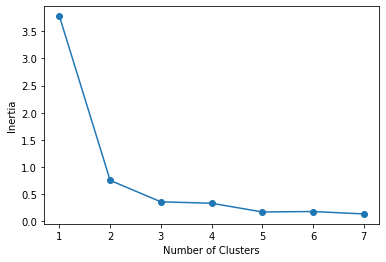

In [18]:
plt.scatter([i for i in range (1,8,1)],Distorsion)
plt.plot([i for i in range (1,8,1)],Distorsion)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')